In [1]:
from src.utils import heist
from src.utils import helpers
import torch.distributions
import torch

import gym
import random
import numpy as np
from helpers import generate_action, load_model
from procgen import ProcgenGym3Env
import imageio
import matplotlib.pyplot as plt
import typing
import math

from procgen import ProcgenGym3Env
import struct
import typing
from typing import Tuple, Dict, Callable, List, Optional
from dataclasses import dataclass
from src.policies_impala import ImpalaCNN
from procgen_tools.procgen_wrappers import VecExtractDictObs, TransposeFrame, ScaledFloatFrame

from gym3 import ToBaselinesVecEnv
import seaborn as sns


%load_ext autoreload
%autoreload 2

building procgen...

/Users/bensturgeon/mambaforge/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(
/Users/bensturgeon/mambaforge/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


done


In [3]:

env_name = "procgen:procgen-heist-v0"  

env = gym.make(env_name, start_level=100, num_levels=200, render_mode="rgb_array", distribution_mode="easy") #remove render mode argument to go faster but not produce images 

model = helpers.load_model(model_path="../model_3101.0.pt")

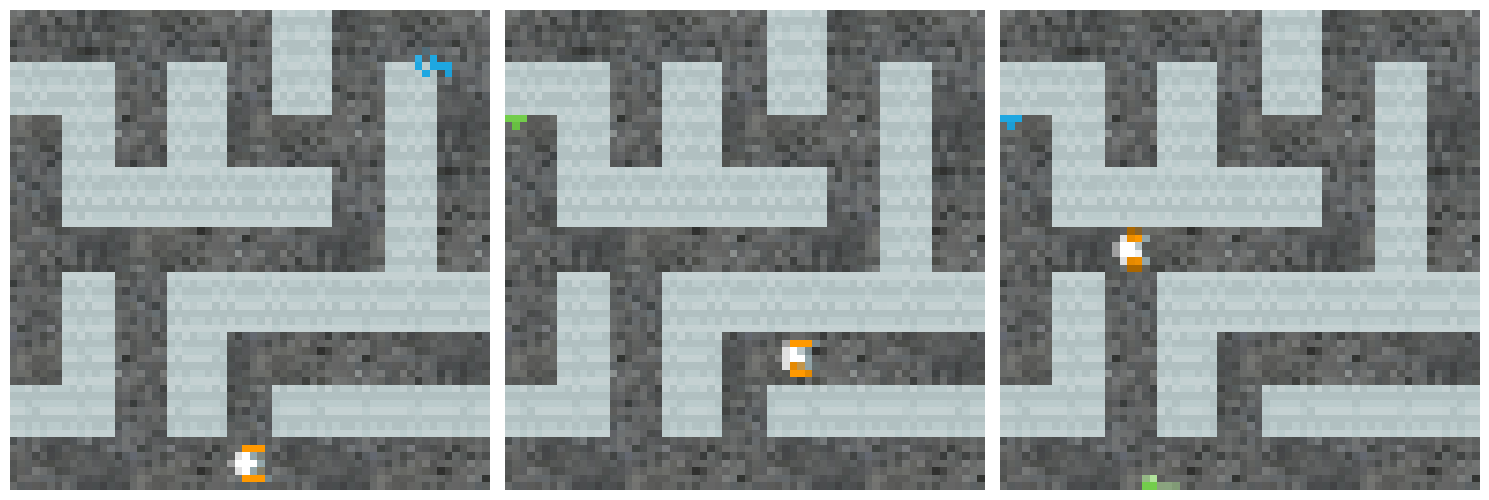

In [6]:
num_samples = 1
num_levels = 100
key_color_combinations = [['blue'], ['green'], ['blue', 'green']]
observations_list = heist.create_key_states(key_color_combinations, num_samples, num_levels)


import itertools
fig, axs = plt.subplots(1, 3, figsize=(15, 12))  # Adjusted to create a 5x3 grid
for ( j), obs in zip(itertools.product(range(3)), itertools.chain.from_iterable(observations_list)):
    axs[ j].imshow(obs.transpose(1, 2, 0))
    # axs[i, j].set_title(f"Sample {j+1}, Obs {i+1}")
    axs[j].axis('off')
plt.tight_layout()
plt.show()

In [8]:
layer_paths = [
    'conv_seqs.0.conv',
    'conv_seqs.0.res_block0.conv0',
    'conv_seqs.0.res_block0.conv1',
    'conv_seqs.0.res_block1.conv0',
    'conv_seqs.0.res_block1.conv1',
    'conv_seqs.1.conv',
    'conv_seqs.1.res_block0.conv0',
    'conv_seqs.1.res_block0.conv1',
    'conv_seqs.1.res_block1.conv0',
    'conv_seqs.1.res_block1.conv1',
    'conv_seqs.2.conv',
    'conv_seqs.2.res_block0.conv0',
    'conv_seqs.2.res_block0.conv1',
    'conv_seqs.2.res_block1.conv0',
    'conv_seqs.2.res_block1.conv1',
]

In [9]:

blue_key_only = observations_list[0][0]
green_key_only = observations_list[0][1]
blue_and_green_key = observations_list[0][2]

obs1 = torch.tensor(blue_key_only, dtype=torch.float32)
obs2 = torch.tensor(blue_and_green_key, dtype=torch.float32)



model_activations = helpers.ModelActivations(model)

output1, blue_key_only_activations = model_activations.run_with_cache(obs1, layer_paths)
model_activations.clear_hooks()
output2, blue_and_green_key_activations = model_activations.run_with_cache(obs2, layer_paths)



In [10]:
model = helpers.load_model(model_path="../model_9501.0.pt")

save_gif_option = True  
for episode in range(20):
    venv = heist.create_venv(1,0,1000000)
    total_reward, frames, observations = helpers.run_episode_and_save_as_gif(venv, model, filepath=f'episode_{episode}.gif', save_gif=save_gif_option, is_procgen_env=True)
    print(f"Episode {episode + 1} finished with total reward: {total_reward}")

Episode 1 finished with total reward: [10.]
Episode 2 finished with total reward: [10.]
Episode 3 finished with total reward: [10.]
Episode 4 finished with total reward: [10.]
Episode 5 finished with total reward: [10.]
Episode 6 finished with total reward: [10.]
Episode 7 finished with total reward: [10.]
Episode 8 finished with total reward: [10.]
Episode 9 finished with total reward: [10.]
Episode 10 finished with total reward: [10.]
Episode 11 finished with total reward: [10.]
Episode 12 finished with total reward: [10.]
Episode 13 finished with total reward: [10.]
Episode 14 finished with total reward: [10.]
Episode 15 finished with total reward: [10.]
Episode 16 finished with total reward: [10.]
Episode 17 finished with total reward: [10.]
Episode 18 finished with total reward: [10.]
Episode 19 finished with total reward: [10.]
Episode 20 finished with total reward: [10.]


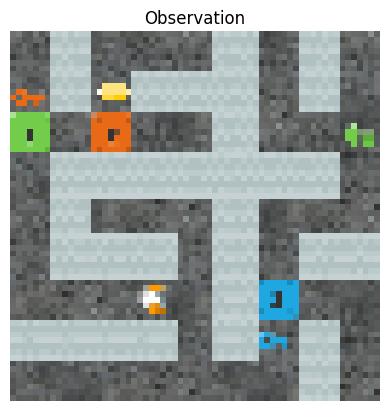

In [8]:
helpers.plot_single_observation(observations[0])

In [15]:
observation = torch.tensor(observations[0], dtype=torch.float32).unsqueeze(0)
output1, normal_activations = model_activations.run_with_cache(observation, layer_paths)

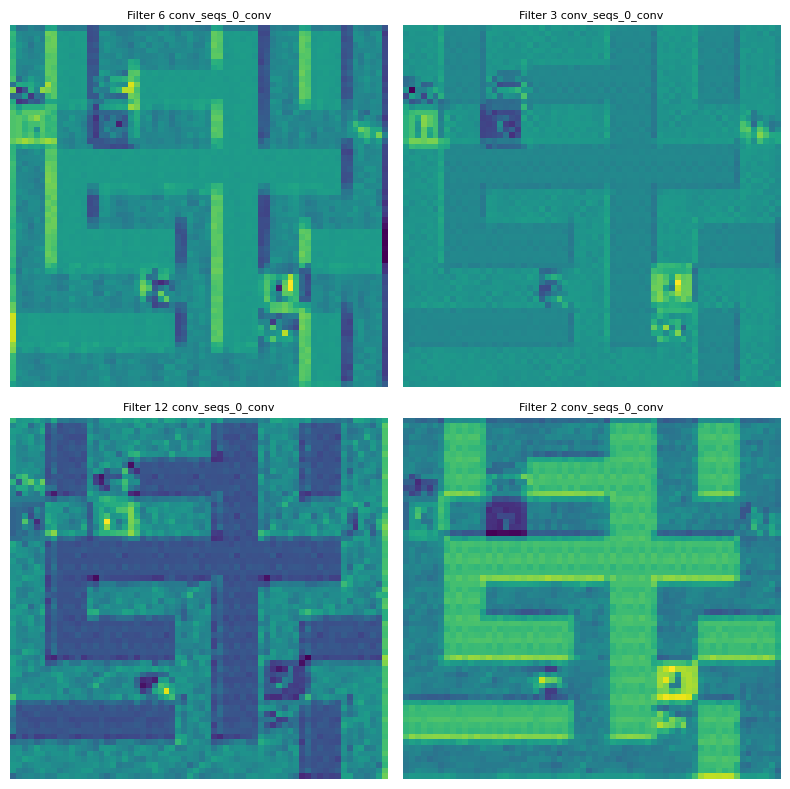

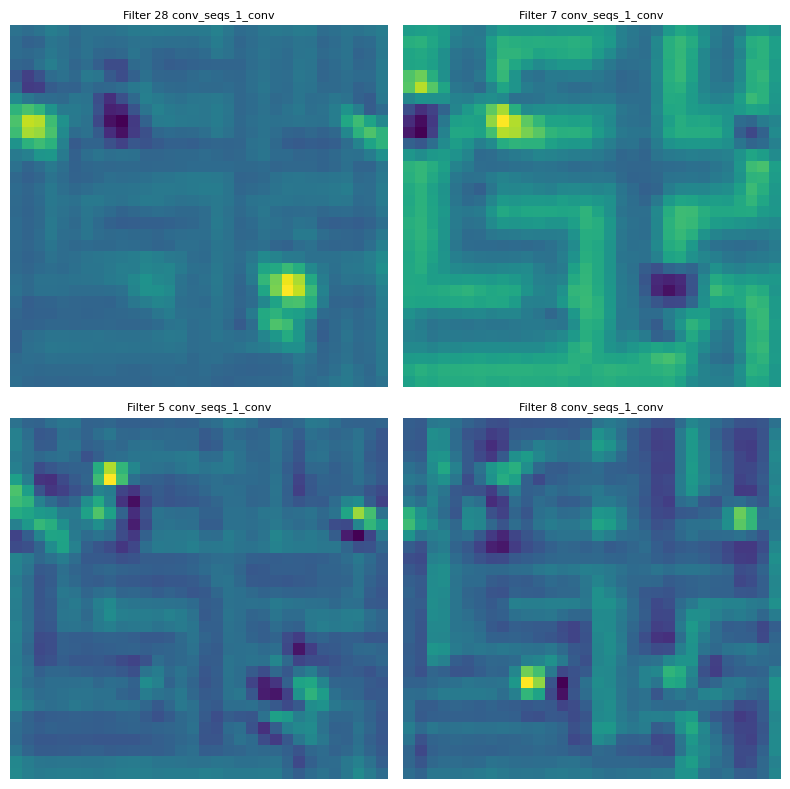

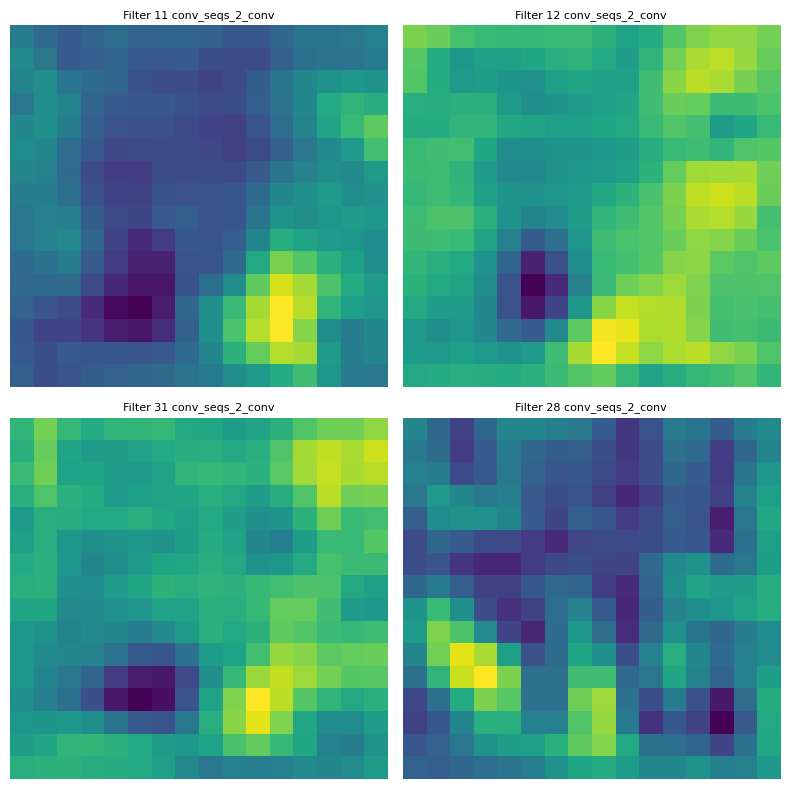

In [16]:
helpers.plot_four_activations_for_layers(normal_activations, ["conv_seqs_0_conv", "conv_seqs_1_conv",  "conv_seqs_2_conv"] )


In [17]:
helpers.plot_layer_activations_dynamic_grid(differences, "conv_seqs_0_res_block1_conv1")


NameError: name 'differences' is not defined

# Compare activations in intepretable vs default model

In [18]:
venv = heist.create_venv(num=1, start_level=random.randint(1000, 10000), num_levels=num_levels)
state = heist.state_from_venv(venv, 0)

full_grid = state.full_grid(with_mouse=False)
entities = state.state_vals["ents"]
legal_mouse_positions = heist.get_legal_mouse_positions(full_grid, entities)

unchanged_obs= venv.reset()


state.remove_all_entities()

x, y = heist.get_legal_mouse_positions(full_grid, entities)[random.randint(0, len(legal_mouse_positions) - 1)]
entities = state.state_vals["ents"]
# state.set_key_position(0,x,y) 
entities = state.state_vals["ents"]
x, y = heist.get_legal_mouse_positions(full_grid, entities)[random.randint(0, len(legal_mouse_positions) - 1)]
state.set_mouse_pos(x,y)
entities = state.state_vals["ents"]
x, y = heist.get_legal_mouse_positions(full_grid, entities)[random.randint(0, len(legal_mouse_positions) - 1)]
state.set_gem_position(x,y)
state_bytes = state.state_bytes
if state_bytes is not None:
    venv.env.callmethod("set_state", [state_bytes])
    obs = venv.reset()

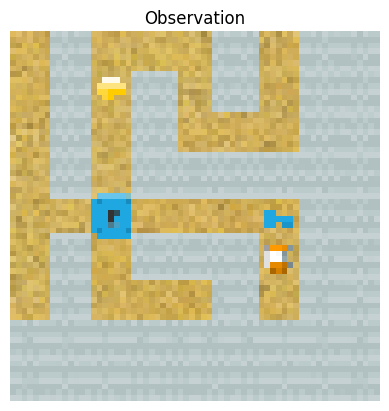

In [19]:
helpers.plot_single_observation(unchanged_obs.squeeze().transpose(1,2,0))

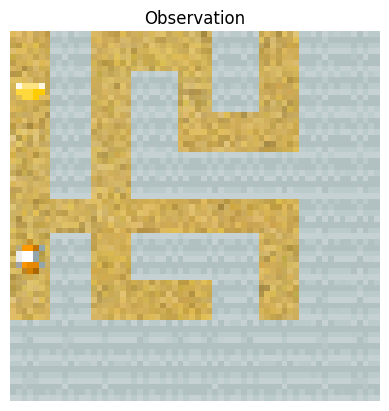

In [20]:
helpers.plot_single_observation(obs.squeeze().transpose(1,2,0))


In [22]:
from src.policies_impala import ImpalaCNN
less_interpretable_model = helpers.load_model(ImpalaCNN, "../model_vivid_feather_latest.pt", )
less_interpretable_model_layer_paths = helpers.get_model_layer_names(less_interpretable_model)
model_activations_less = helpers.ModelActivations(less_interpretable_model)
output2, gem_only_activations = model_activations_less.run_with_cache(helpers.observation_to_rgb(obs), less_interpretable_model_layer_paths)
output2, unmodified_activations = model_activations_less.run_with_cache(helpers.observation_to_rgb( unchanged_obs), less_interpretable_model_layer_paths)


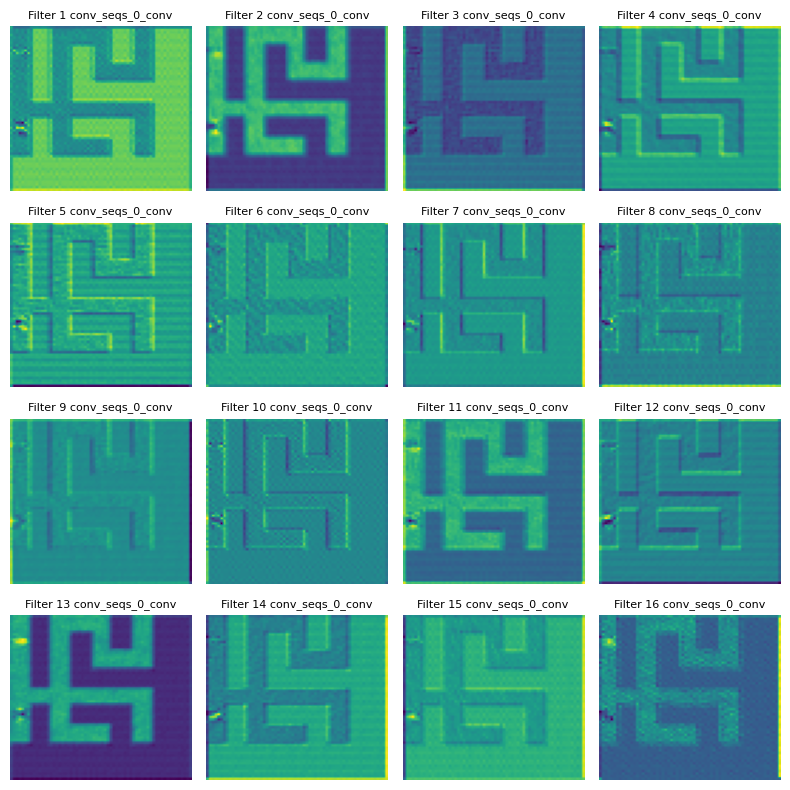

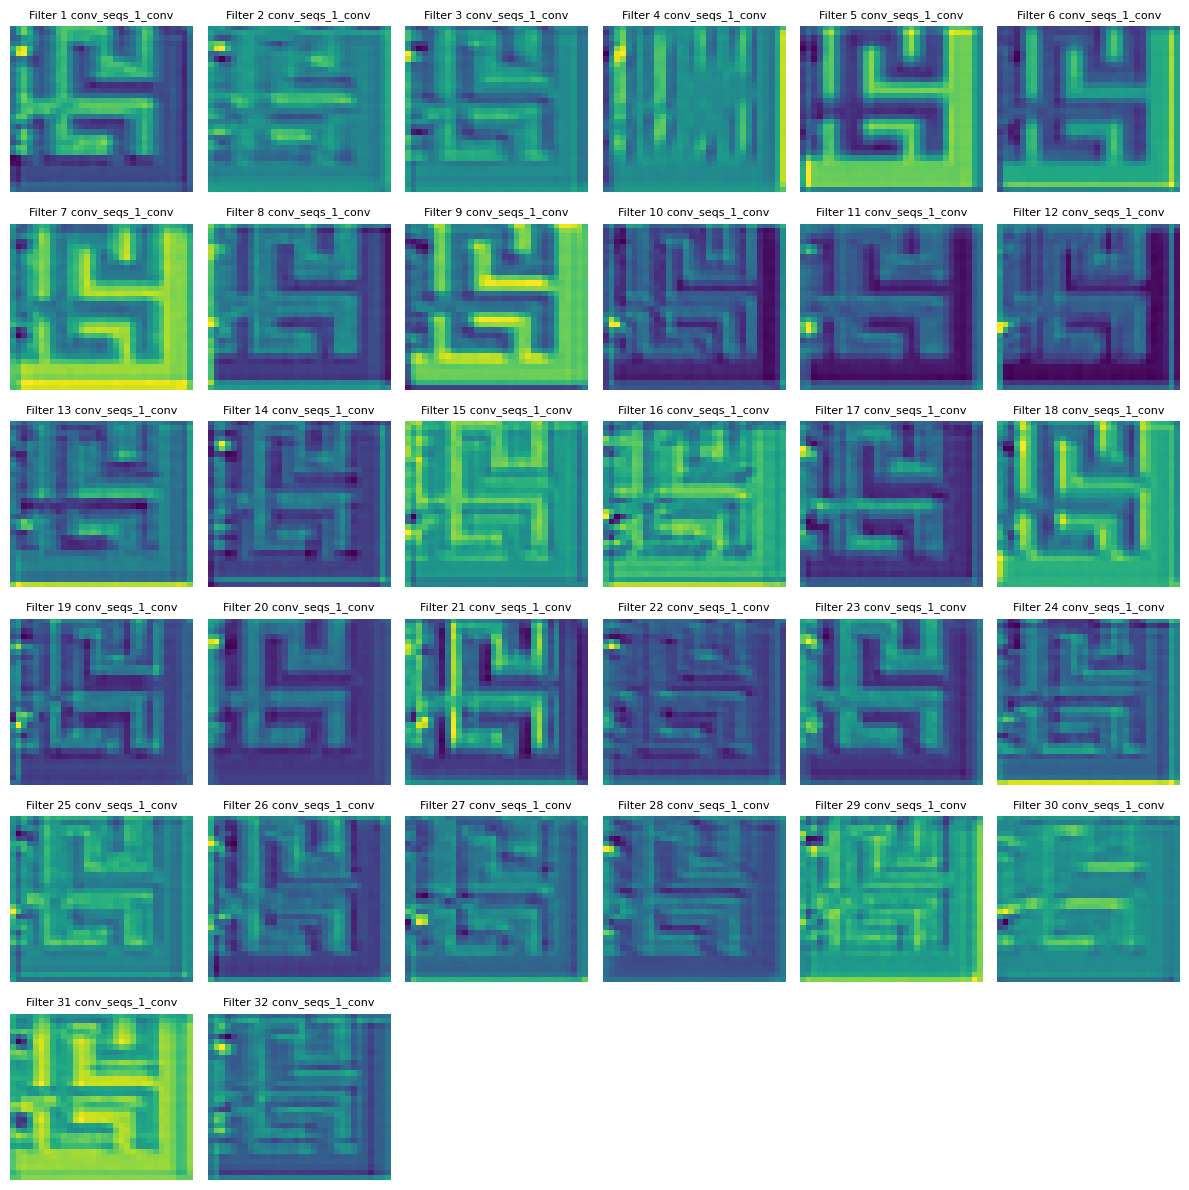

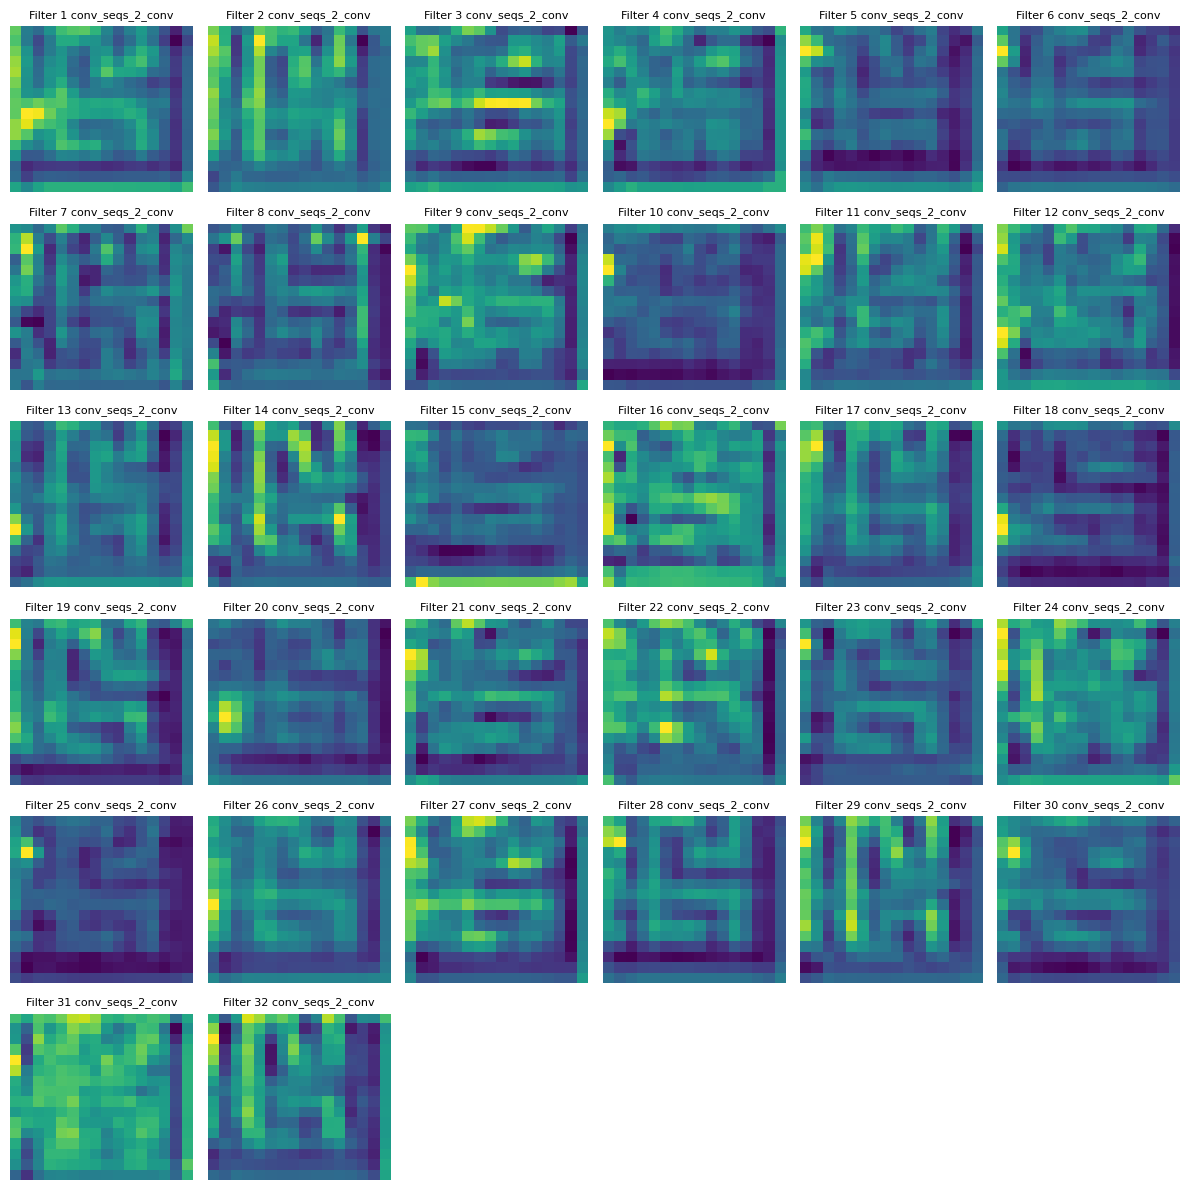

In [23]:
helpers.plot_activations_for_layers(gem_only_activations, ["conv_seqs_0_conv", "conv_seqs_1_conv", "conv_seqs_2_conv"] )

# Interpretable model activations

In [24]:
from src.policies_impala import ImpalaCNN
# model = helpers.load_model(ImpalaCNN,"../model_1501.0_interpretable.pt")
model = helpers.load_model(ImpalaCNN, "../model_9501.0.pt" )
interp_model_activations =  helpers.ModelActivations(model)
interpretable_model_layer_paths = helpers.get_model_layer_names(model)
output2, player_gem_activations_interp = interp_model_activations.run_with_cache(helpers.observation_to_rgb(obs), interpretable_model_layer_paths)
output2, unmodified_activations_interp = interp_model_activations.run_with_cache(helpers.observation_to_rgb( unchanged_obs), interpretable_model_layer_paths)

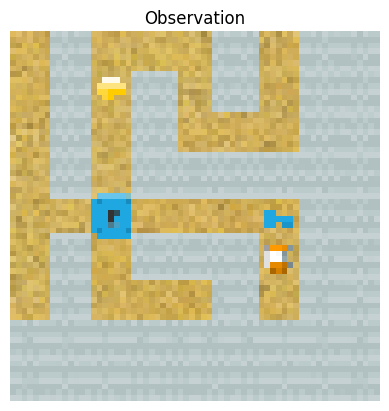

In [27]:
helpers.plot_single_observation(helpers.tensor_to_image(unchanged_obs))

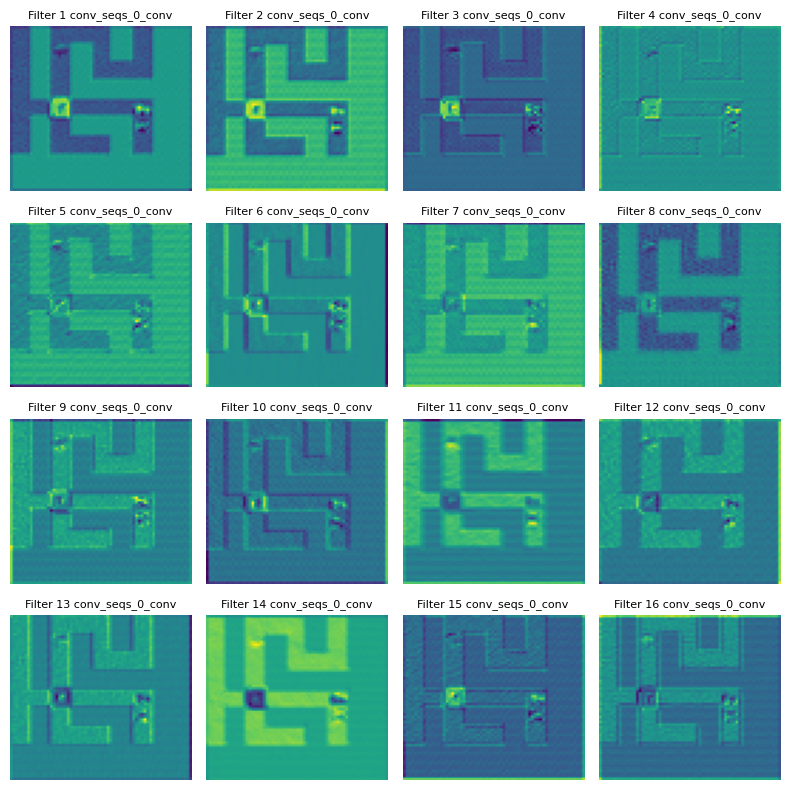

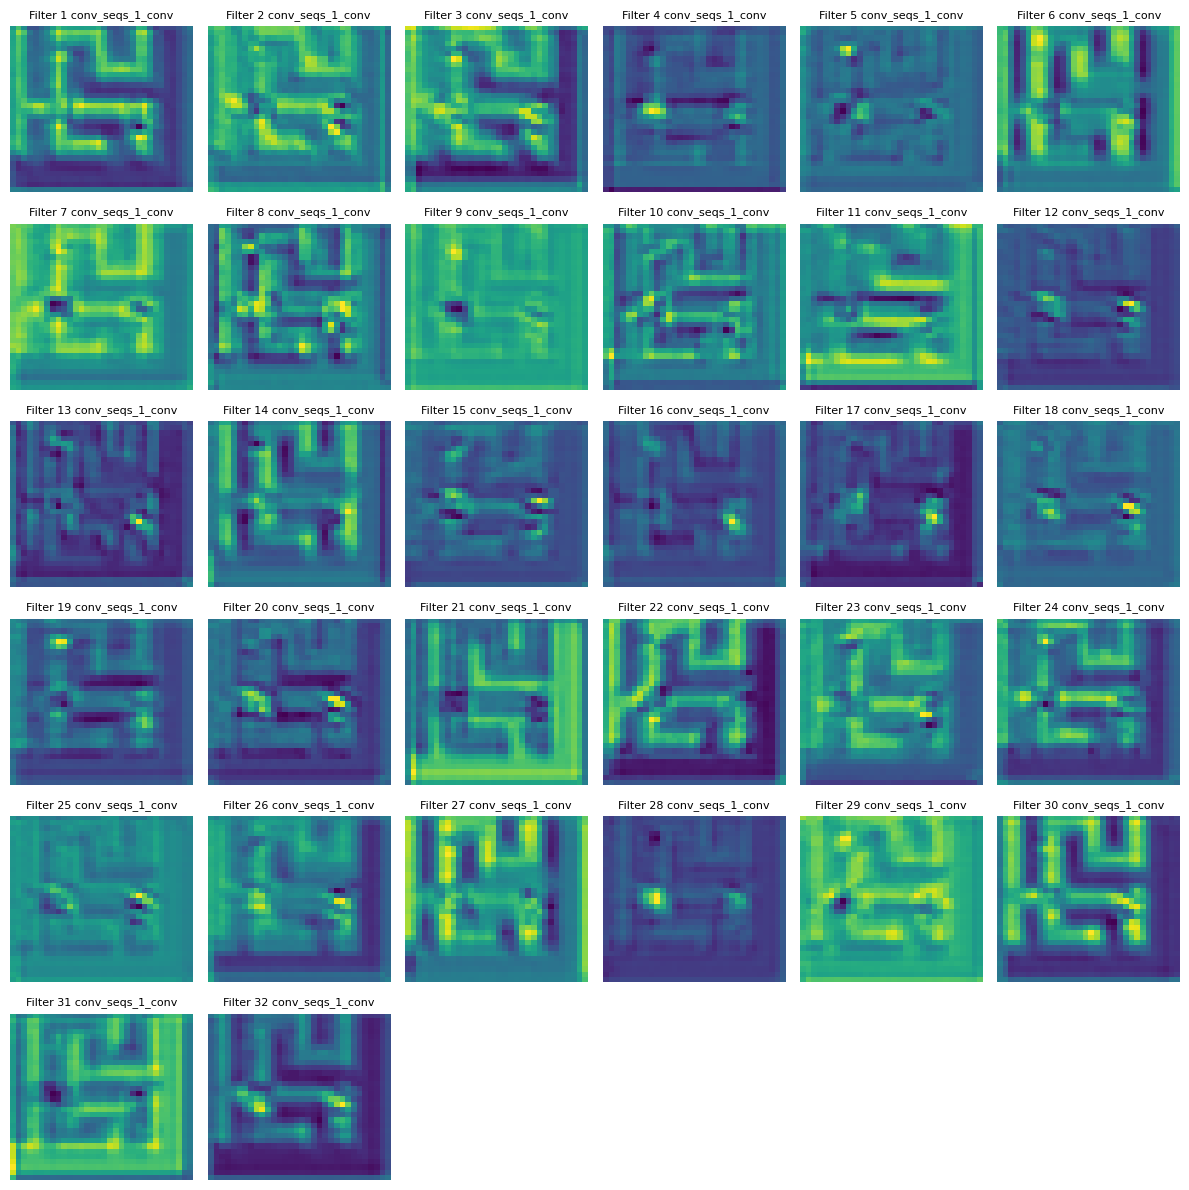

In [25]:
helpers.plot_activations_for_layers(unmodified_activations_interp, ["conv_seqs_0_conv", "conv_seqs_1_conv"] )

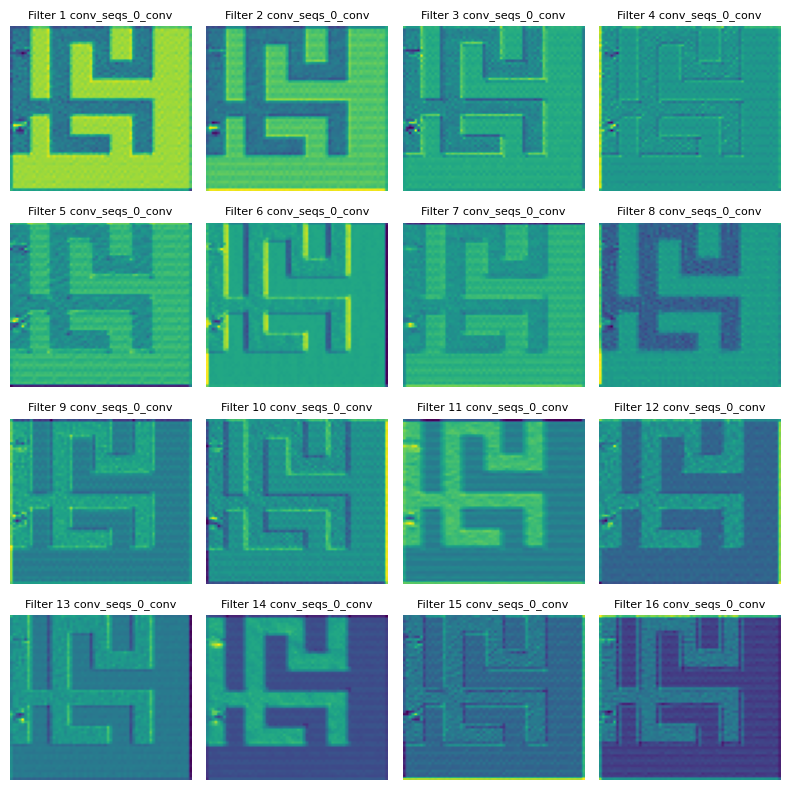

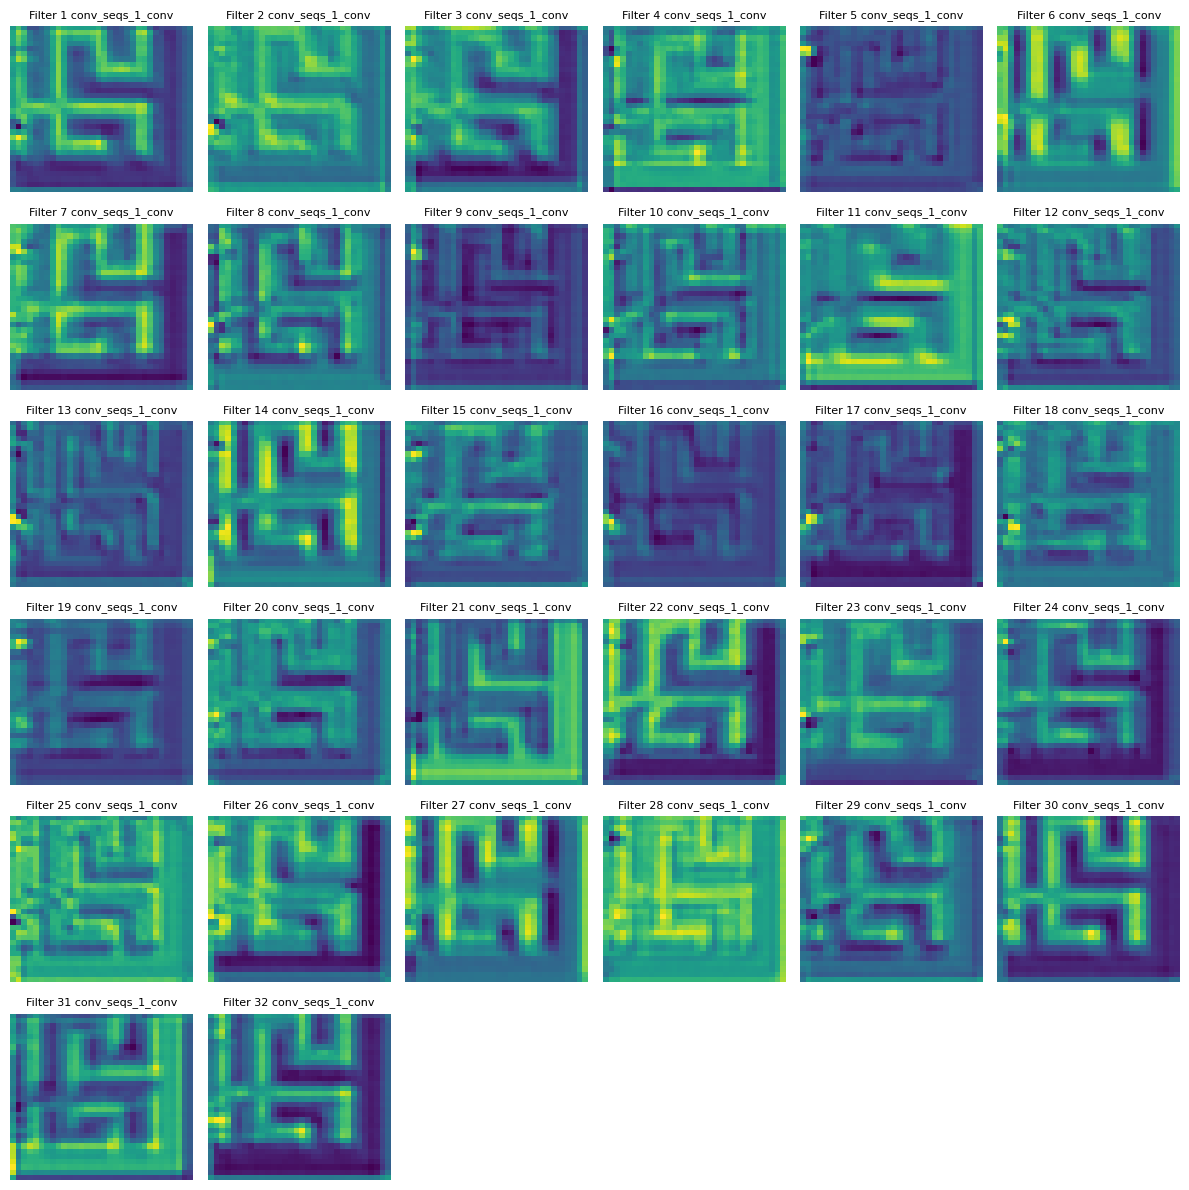

In [28]:
helpers.plot_activations_for_layers(player_gem_activations_interp, ["conv_seqs_0_conv", "conv_seqs_1_conv"] )


In [29]:
venv = heist.create_venv(num=1, start_level=random.randint(1000, 10000), num_levels=num_levels)
state = heist.state_from_venv(venv, 0)

full_grid = state.full_grid(with_mouse=False)
entities = state.state_vals["ents"]
legal_mouse_positions = heist.get_legal_mouse_positions(full_grid, entities)

unchanged_obs= venv.reset()

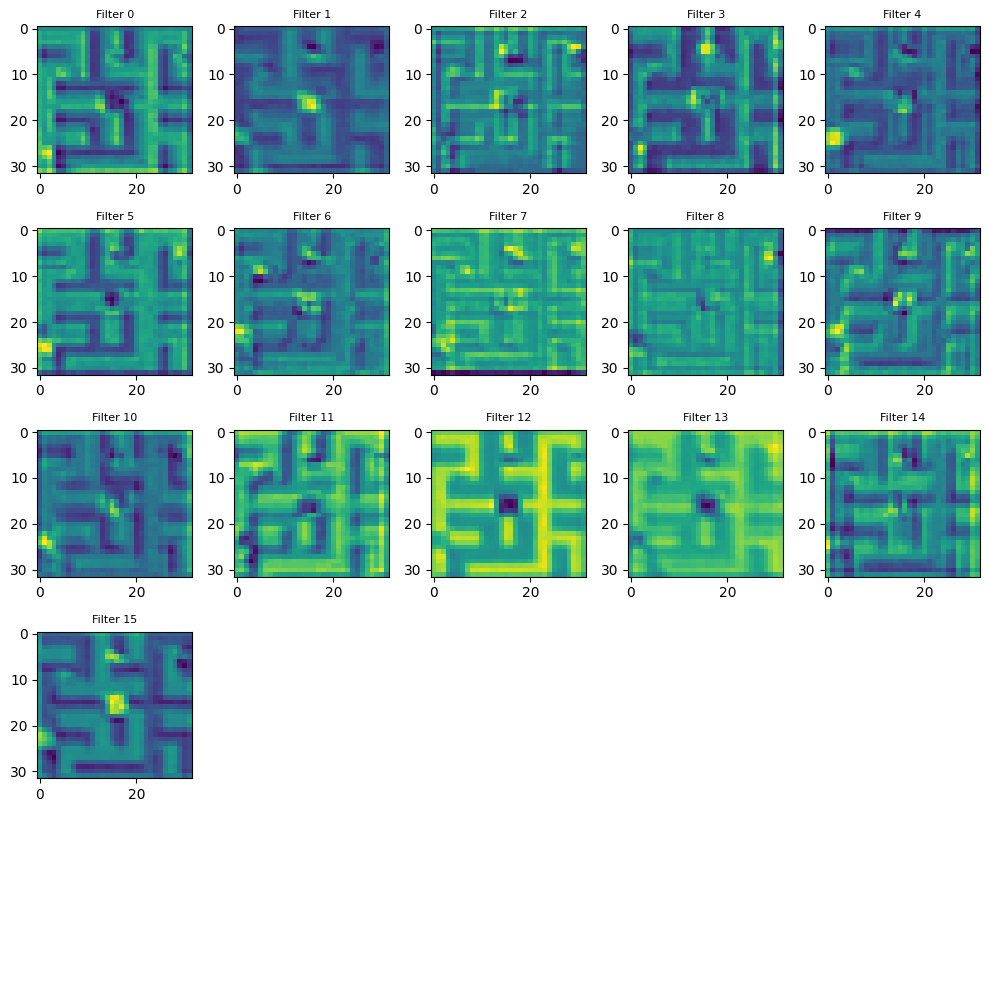

In [31]:
venv = heist.create_venv(num=1, start_level=random.randint(1000, 10000), num_levels=num_levels)
state = heist.state_from_venv(venv, 0)
normal_obs = venv.reset()
output2, normal_activations = model_activations.run_with_cache(helpers.observation_to_rgb(normal_obs), layer_paths)
helpers.plot_layer_activations_dynamic_grid(normal_activations, "conv_seqs_0_res_block0_conv0")

In [ ]:
activations = {}

def get_activation(name):
    def hook(model, input, output):
        # Initialize a placeholder for processed output
        processed_output = []
        
        for item in output:
            # Check if the item is a tensor and detach it
            if isinstance(item, torch.Tensor):
                processed_output.append(item.detach())
            # If the item is a Categorical, you might want to extract its logits or probs
            elif isinstance(item, torch.distributions.Categorical):
                processed_output.append(item.logits.detach())
            else:
                # Handle other types as necessary
                processed_output.append(item)
        
        # Save the processed output in the activations dictionary
        activations[name] = tuple(processed_output)
    return hook



# Define a function to recursively register hooks based on a path
def register_hook_by_path(model, path, name):
    elements = path.split('.')
    for i, element in enumerate(elements):
        if '[' in element:
            # Splitting at '[' and removing the closing ']' to get the index
            base, index = element.replace(']', '').split('[')
            index = int(index)  # Convert index to integer
            model = getattr(model, base)[index]
        else:
            model = getattr(model, element)
        # If we are at the last element, register the hook
        if i == len(elements) - 1:
            model.register_forward_hook(get_activation(name))

# List of layer paths to hook, based on your initial list
layer_paths = [
    'conv_seqs.0.conv',
    'conv_seqs.0.res_block0.conv0',
    'conv_seqs.0.res_block0.conv1',
    'conv_seqs.0.res_block1.conv0',
    'conv_seqs.0.res_block1.conv1',
    'conv_seqs.1.conv',
    'conv_seqs.1.res_block0.conv0',
    'conv_seqs.1.res_block0.conv1',
    'conv_seqs.1.res_block1.conv0',
    'conv_seqs.1.res_block1.conv1',
    'conv_seqs.2.conv',
    'conv_seqs.2.res_block0.conv0',
    'conv_seqs.2.res_block0.conv1',
    'conv_seqs.2.res_block1.conv0',
    'conv_seqs.2.res_block1.conv1',
    # Add other layers as needed
]


# Register hooks for each path
for path in layer_paths:
    register_hook_by_path(model, path, path.replace('.', '_'))


observation = torch.tensor(normal_obs, dtype=torch.float32)


# if observation.shape == torch.Size([3, 64, 64]):
observation = observation.permute(0,3, 2, 1)  # Switch dimensions to (64, 64, 3)

output = model(observation)


In [ ]:
observation_test = torch.tensor(observations[0], dtype=torch.float32).unsqueeze(0)
observation_test.shape

torch.Size([1, 64, 64, 3])

In [ ]:

def run_episode_and_save_as_gif(env, model, filepath='../gifs/run.gif', save_gif=False, episode_timeout=400, is_procgen_env=False):

    observations = []
    observation = env.reset()
    done = False
    total_reward = 0
    frames=[]
    
    
    activations = {}
    # observation = colour_swap(observation)
    count = 0
    while not done:
        if save_gif:
            frames.append(env.render(mode='rgb_array'))  
        observation= np.squeeze(observation)
        observation =np.transpose(observation, (1,2,0))
        converted_obs = helpers.observation_to_rgb(observation)
        action = helpers.generate_action(model, converted_obs, is_procgen_env) 
        observation, reward, done, info = env.step(action)
        # observation = colour_swap(observation)
        total_reward += reward
        observations.append(converted_obs)
        count +=1
        if count >= episode_timeout:
            break

    if save_gif:
        imageio.mimsave(filepath, frames, fps=30) 

    return total_reward, frames, observations

env_name = "procgen:procgen-heist-v0"  

env = gym.make(env_name, start_level=100, num_levels=200, render_mode="rgb_array", distribution_mode="easy") #remove render mode argument to go faster but not produce images 

model = helpers.load_model()

save_gif_option = False  
for episode in range(10):
    venv = heist.create_venv(num=1, start_level=random.randint(1000, 10000), num_levels=4)
    # env = gym.make(env_name, start_level=100, num_levels=200, render_mode="rgb_array", distribution_mode="easy") #remove render mode argument to go faster but not produce images 
    env = heist.create_venv(1,0,5)

    total_reward, frames, observations = run_episode_and_save_as_gif(env, model, filepath=f'episode_mod_2_{episode+1}_procgen2.gif', save_gif=save_gif_option, is_procgen_env=True)


[8]
[2]
[2]
[1]
[1]
[2]
[2]
[2]
[1]
[2]
[2]
[2]
[5]
[8]
Episode 1 finished with total reward: [10.]
[0]
[3]
[0]
[0]
[5]
[6]
[0]
[6]
[6]
[6]
[6]
[6]
[6]
[6]
[6]
[6]
[6]
[0]
[0]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[0]
[2]
[2]
Episode 2 finished with total reward: [10.]
[0]
[0]
[0]
[8]
[0]
[8]
[0]
[8]
[0]
[6]
[8]
[0]
[6]
[6]
[6]
[6]
[6]
[6]
[6]
[6]
[6]
[0]
[0]
[6]
[2]
[8]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[0]
[2]
[2]
Episode 3 finished with total reward: [10.]
[8]
[2]
[2]
[2]
[1]
[2]
[2]
[2]
[1]
[2]
[2]
[2]
[2]
[8]
Episode 4 finished with total reward: [10.]
[7]
[6]
[6]
[6]
[6]
[7]
[7]
[7]
[8]
[6]
[6]
[6]
[6]
[0]
[0]
[0]
[8]
[8]
[8]
[8]
[2]
[2]
[2]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[2]
[14]
[2]
[2]
[2]
[2]
[8]
[8]
Episode 5 finished with total reward: [10.]
[6]
[6]
[6]
[7]
[7]
[6]
[7]
[0]
[7]
[6]
[6]
[6]
[7]
[6]
[0]
[6]
[0]
[0]
[0]
[12]
[8]
[8]
[8]
[8]
[1]
[2]
[1]
[2]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[2]
[2]
[8]
[8]
[8]
Episode 6 finished wit

KeyboardInterrupt: 

## Procgen env notes
The above experiments confirm that the model is now working on the procgen venv once we convert the values to the right scale and below demonstrate that the activations are looking as we expect. 



In [ ]:
normal_activations.keys()

dict_keys(['conv_seqs_0_conv', 'conv_seqs_0_res_block0_conv0', 'conv_seqs_0_res_block0_conv1', 'conv_seqs_0_res_block1_conv0', 'conv_seqs_0_res_block1_conv1', 'conv_seqs_1_conv', 'conv_seqs_1_res_block0_conv0', 'conv_seqs_1_res_block0_conv1', 'conv_seqs_1_res_block1_conv0', 'conv_seqs_1_res_block1_conv1', 'conv_seqs_2_conv', 'conv_seqs_2_res_block0_conv0', 'conv_seqs_2_res_block0_conv1', 'conv_seqs_2_res_block1_conv0', 'conv_seqs_2_res_block1_conv1'])

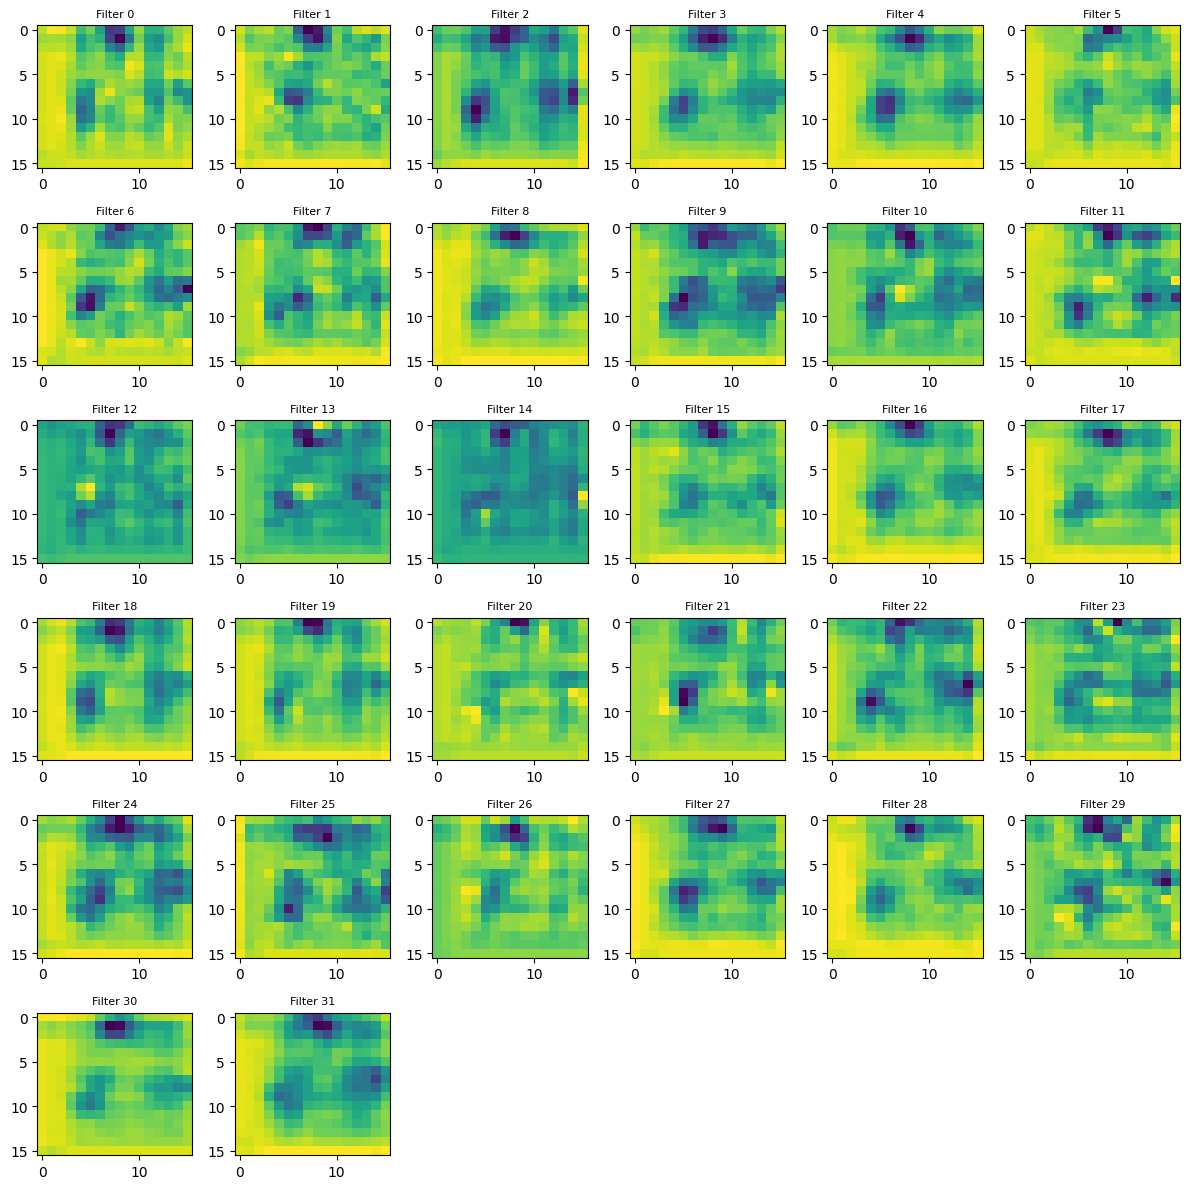

In [ ]:
helpers.plot_layer_activations_dynamic_grid(normal_activations, "conv_seqs_1_res_block0_conv0")

## Exploring key interactions without goals
To discover how the agent operates without a final goal we set up an environment with no final goal present. We can then have it run through the episode as normal and look at the gif of its performance as well as the initial activations.


In [ ]:
# num_levels = 5
# venv = heist.create_venv(num=1, start_level=random.randint(1000, 10000), num_levels=num_levels)
# state = heist.state_from_venv(venv, 0)

# full_grid = state.full_grid(with_mouse=False)
# entities = state.state_vals["ents"]
# legal_mouse_positions = heist.get_legal_mouse_positions(full_grid, entities)

unchanged_obs= venv.reset()


state.remove_all_entities()

x, y = heist.get_legal_mouse_positions(full_grid, entities)[random.randint(0, len(legal_mouse_positions) - 1)]
entities = state.state_vals["ents"]
state.set_key_position(0,x,y) 
entities = state.state_vals["ents"]
x, y = heist.get_legal_mouse_positions(full_grid, entities)[random.randint(0, len(legal_mouse_positions) - 1)]
state.set_mouse_pos(x,y)
state_bytes = state.state_bytes
if state_bytes is not None:
    venv.env.callmethod("set_state", [state_bytes])
    obs = venv.reset()

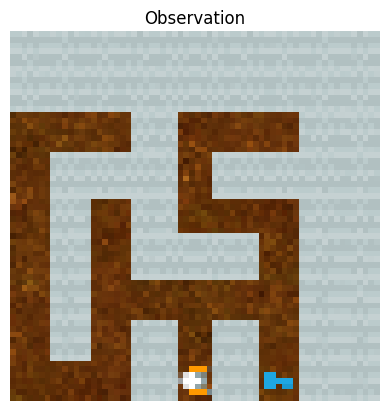

In [ ]:
helpers.plot_single_observation(obs.squeeze().transpose(1,2,0))

In [ ]:
entities = state.state_vals["ents"]
x, y = heist.get_legal_mouse_positions(full_grid, entities)[random.randint(0, len(legal_mouse_positions) - 1)]
state.set_gem_position(x,y)

state_bytes = state.state_bytes
if state_bytes is not None:
    venv.env.callmethod("set_state", [state_bytes])
    obs = venv.reset()

In [ ]:
venv[0]

TypeError: 'ScaledFloatFrame' object is not subscriptable

In [ ]:
save_gif_option = True  

model = helpers.load_model()

total_reward, frames, observations = run_episode_and_save_as_gif(venv, model, filepath=f'episode_0_key.gif', save_gif=save_gif_option, episode_timeout=150)

In [ ]:
layer_paths = [
    'conv_seqs.0.conv',
    'conv_seqs.0.res_block0.conv0',
    'conv_seqs.0.res_block0.conv1',
    'conv_seqs.0.res_block1.conv0',
    'conv_seqs.0.res_block1.conv1',
    'conv_seqs.1.conv',
    'conv_seqs.1.res_block0.conv0',
    'conv_seqs.1.res_block0.conv1',
    'conv_seqs.1.res_block1.conv0',
    'conv_seqs.1.res_block1.conv1',
    'conv_seqs.2.conv',
    'conv_seqs.2.res_block0.conv0',
    'conv_seqs.2.res_block0.conv1',
    'conv_seqs.2.res_block1.conv0',
    'conv_seqs.2.res_block1.conv1',
    # Add other layers as needed
]


model_activations = ModelActivations(model)

output2, normal_activations = model_activations.run_with_cache(observations[0], layer_paths)


torch.Size([64, 64, 3])


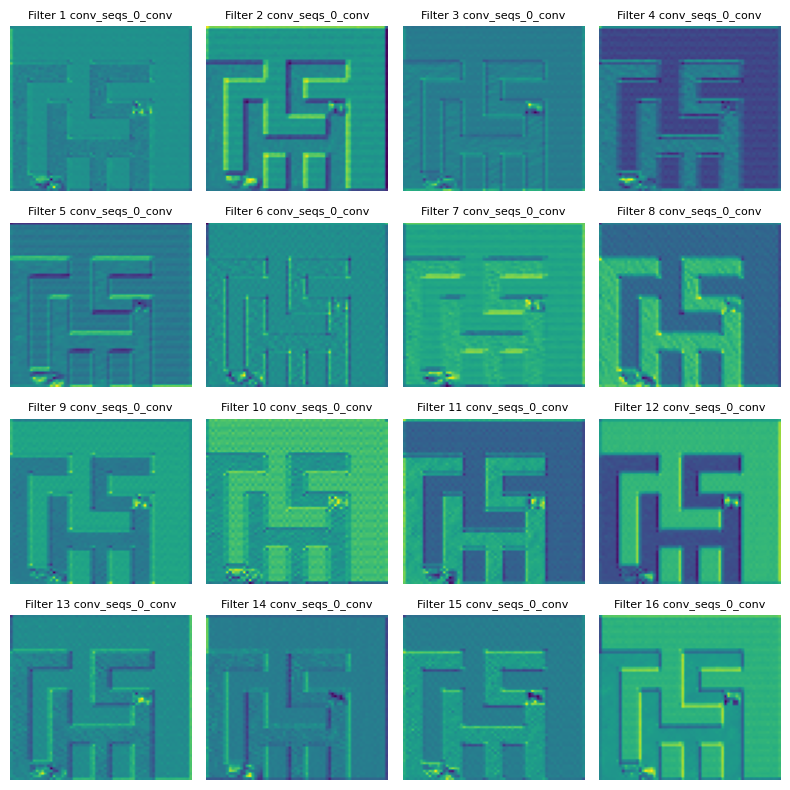

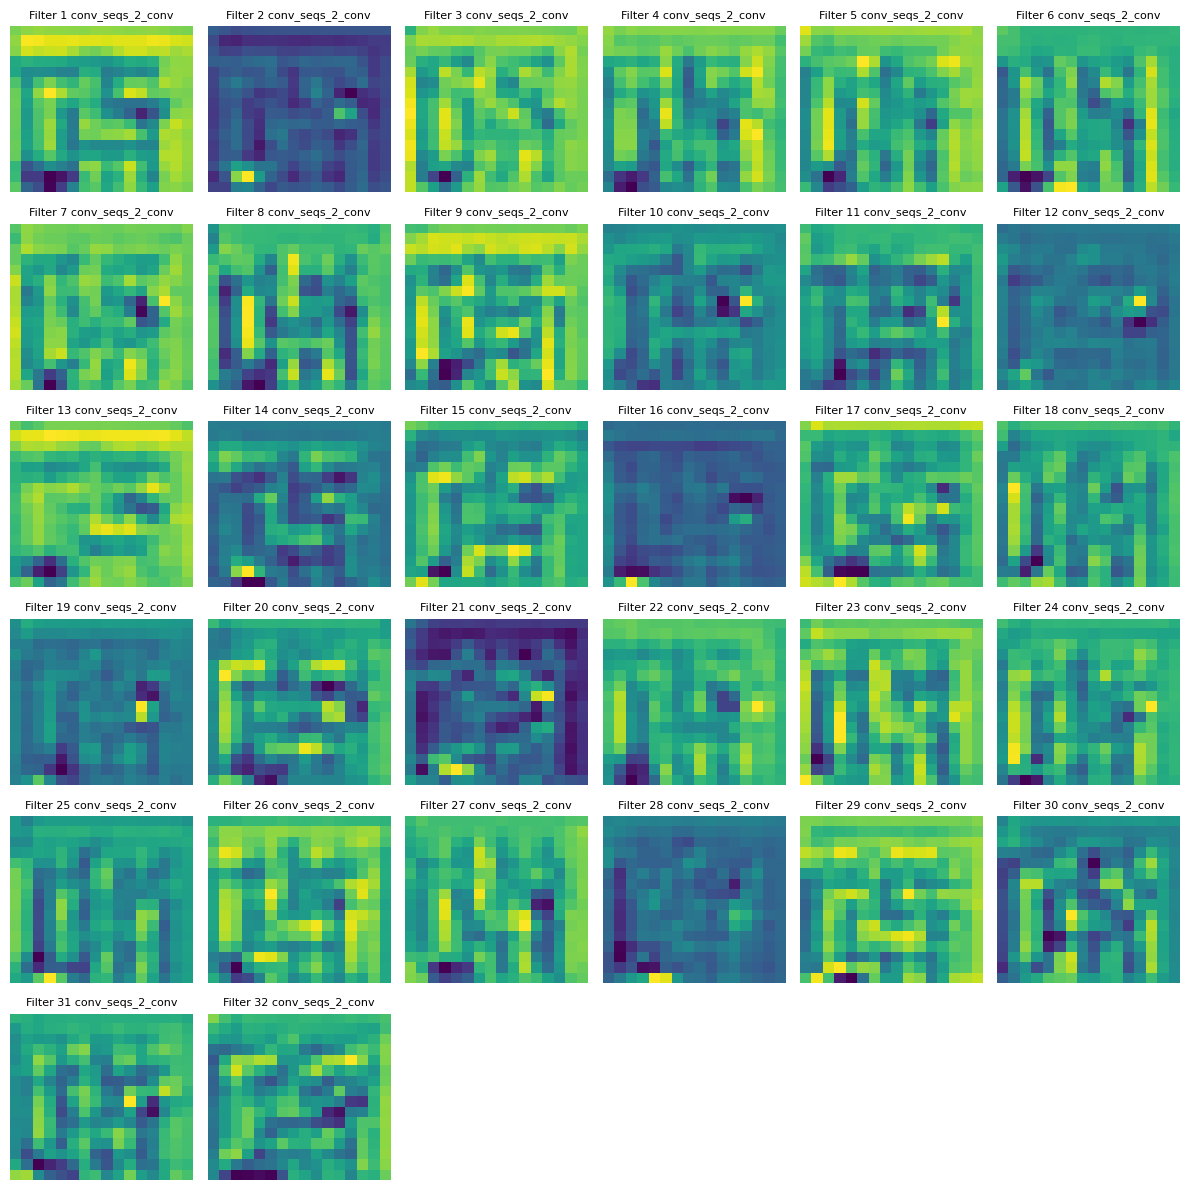

In [ ]:
helpers.plot_activations_for_layers(normal_activations, ['conv_seqs_0_conv', 'conv_seqs_2_conv'])

## Comparing activation differences between gem and blue key


In [ ]:
num_levels = 5
venv = heist.create_venv(num=1, start_level=random.randint(1000, 10000), num_levels=num_levels)
state = heist.state_from_venv(venv, 0)

full_grid = state.full_grid(with_mouse=False)
entities = state.state_vals["ents"]
legal_mouse_positions = heist.get_legal_mouse_positions(full_grid, entities)

unchanged_obs= venv.reset()


state.remove_all_entities()

entities = state.state_vals["ents"]
target_x, target_y = heist.get_legal_mouse_positions(full_grid, entities)[random.randint(0, len(legal_mouse_positions) - 1)]
state.set_key_position(0,target_x,target_y) 
entities = state.state_vals["ents"]
x, y = heist.get_legal_mouse_positions(full_grid, entities)[random.randint(0, len(legal_mouse_positions) - 1)]
state.set_mouse_pos(x,y)
state_bytes = state.state_bytes
if state_bytes is not None:
    venv.env.callmethod("set_state", [state_bytes])
    obs = venv.reset()

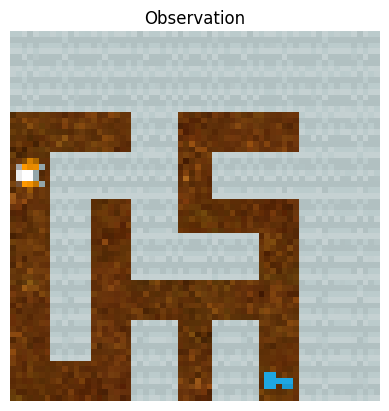

In [ ]:
# obs = venv.reset()
helpers.plot_single_observation(obs.squeeze().transpose(1,2,0))


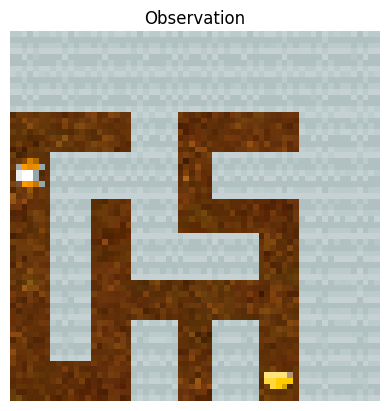

In [ ]:
state.remove_all_entities()
state.set_mouse_pos(x,y)
state.set_gem_position(target_x,target_y)
state_bytes = state.state_bytes
if state_bytes is not None:
    venv2 = venv
    venv2.env.callmethod("set_state", [state_bytes])
    obs2 = venv2.reset()

helpers.plot_single_observation(obs2.squeeze().transpose(1,2,0))

In [ ]:

output, key_activations = model_activations.run_with_cache(helpers.observation_to_rgb(obs.squeeze().transpose(1,2,0)), layer_paths)
output, gem_activations = model_activations.run_with_cache(helpers.observation_to_rgb(obs2.squeeze().transpose(1,2,0)), layer_paths)


torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


In [ ]:
obs.squeeze().transpose(1,2,0).shape

(64, 64, 3)

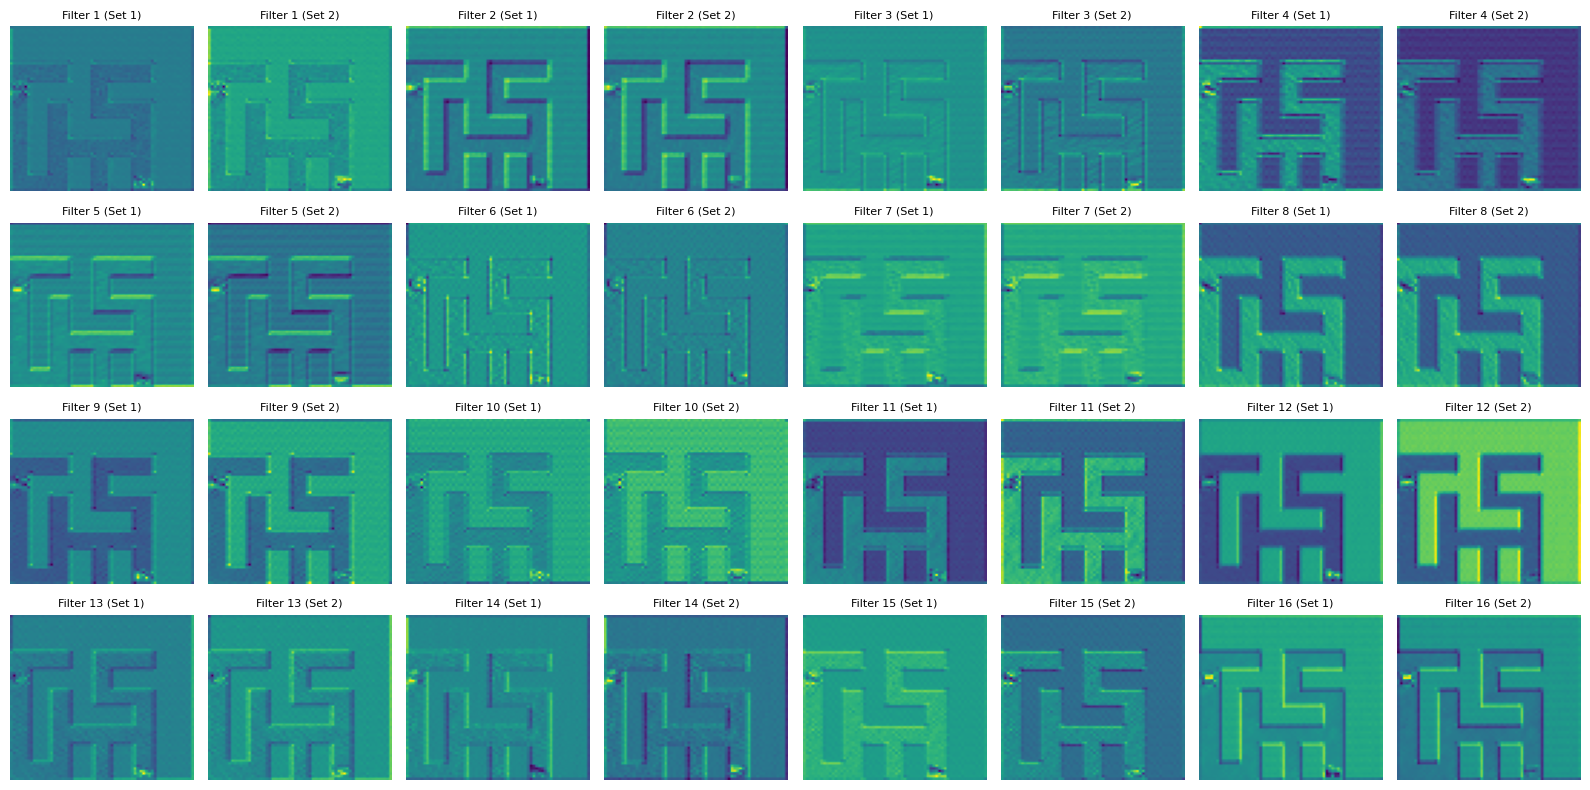

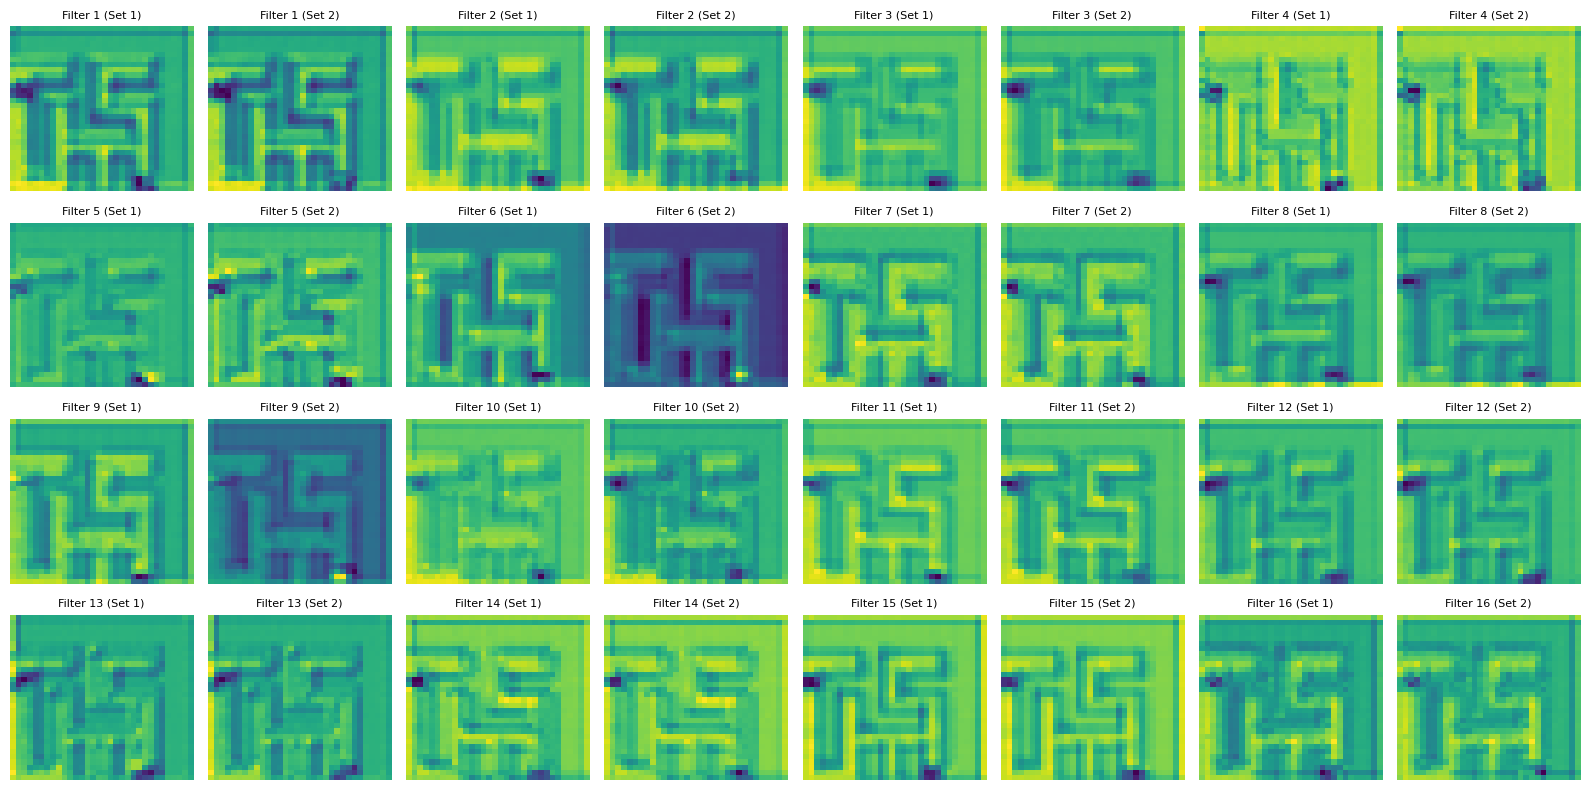

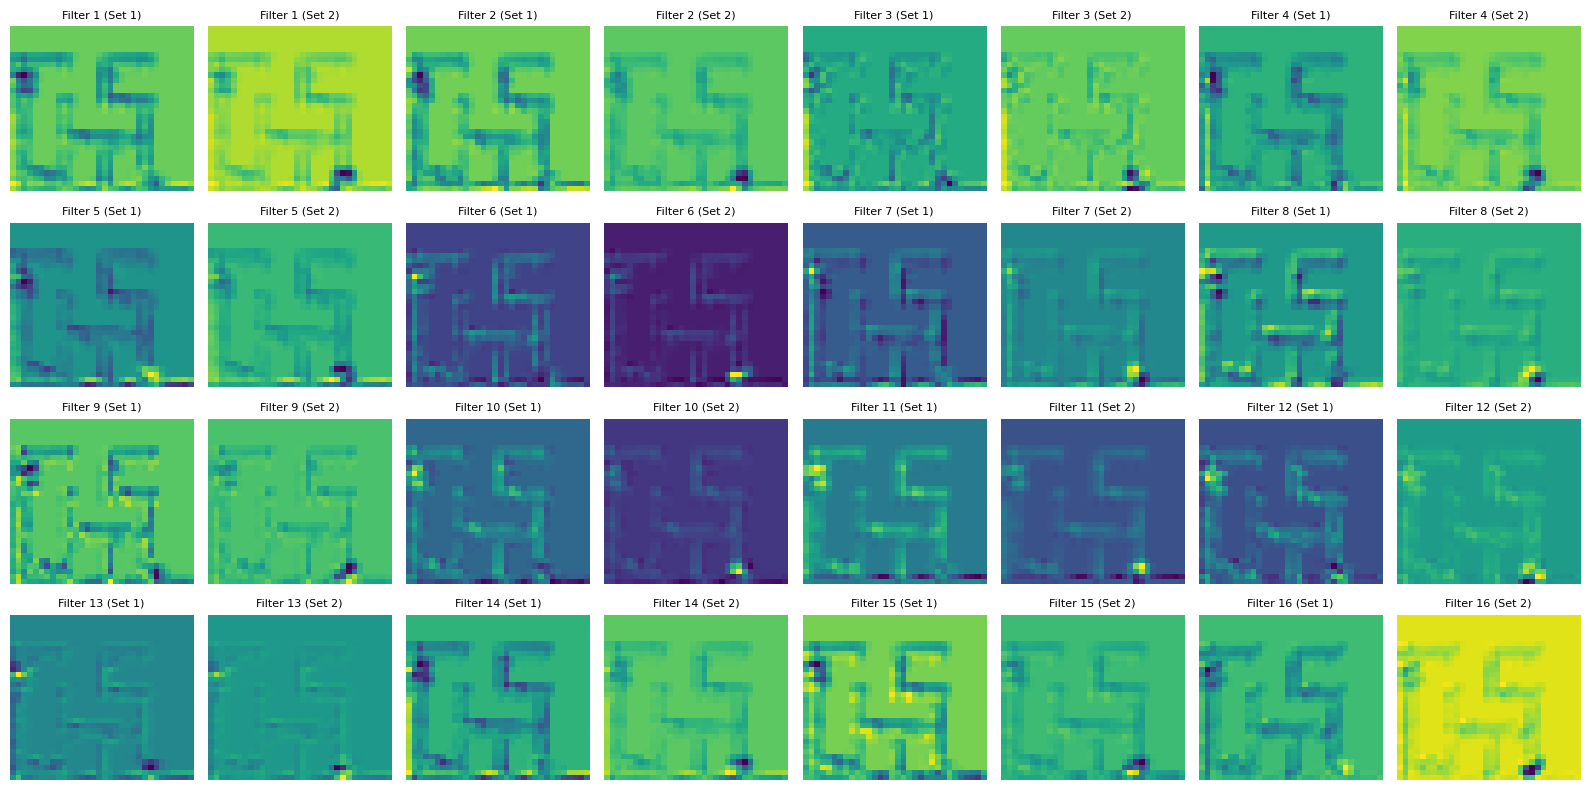

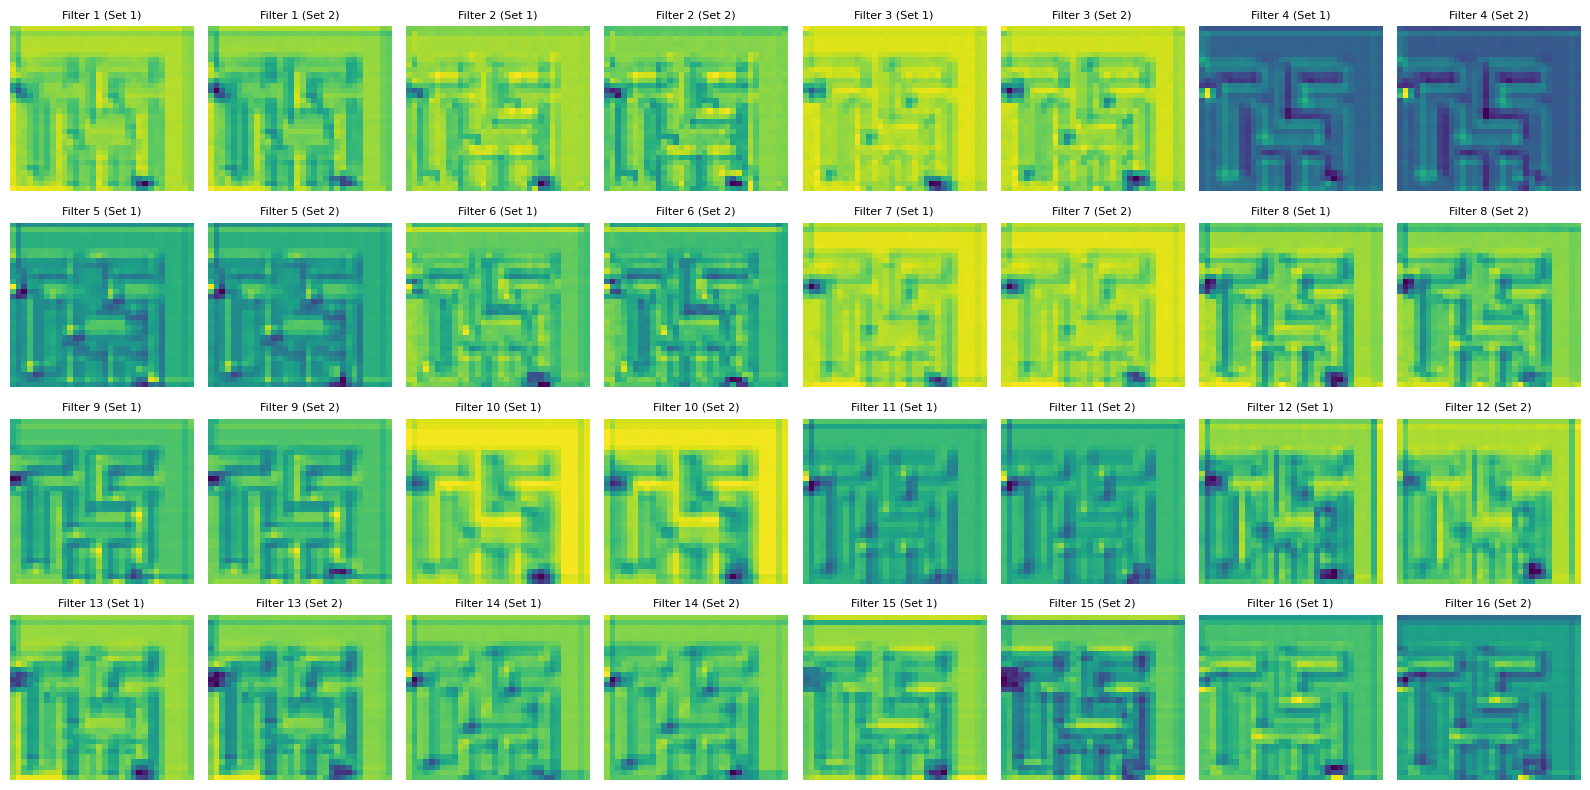

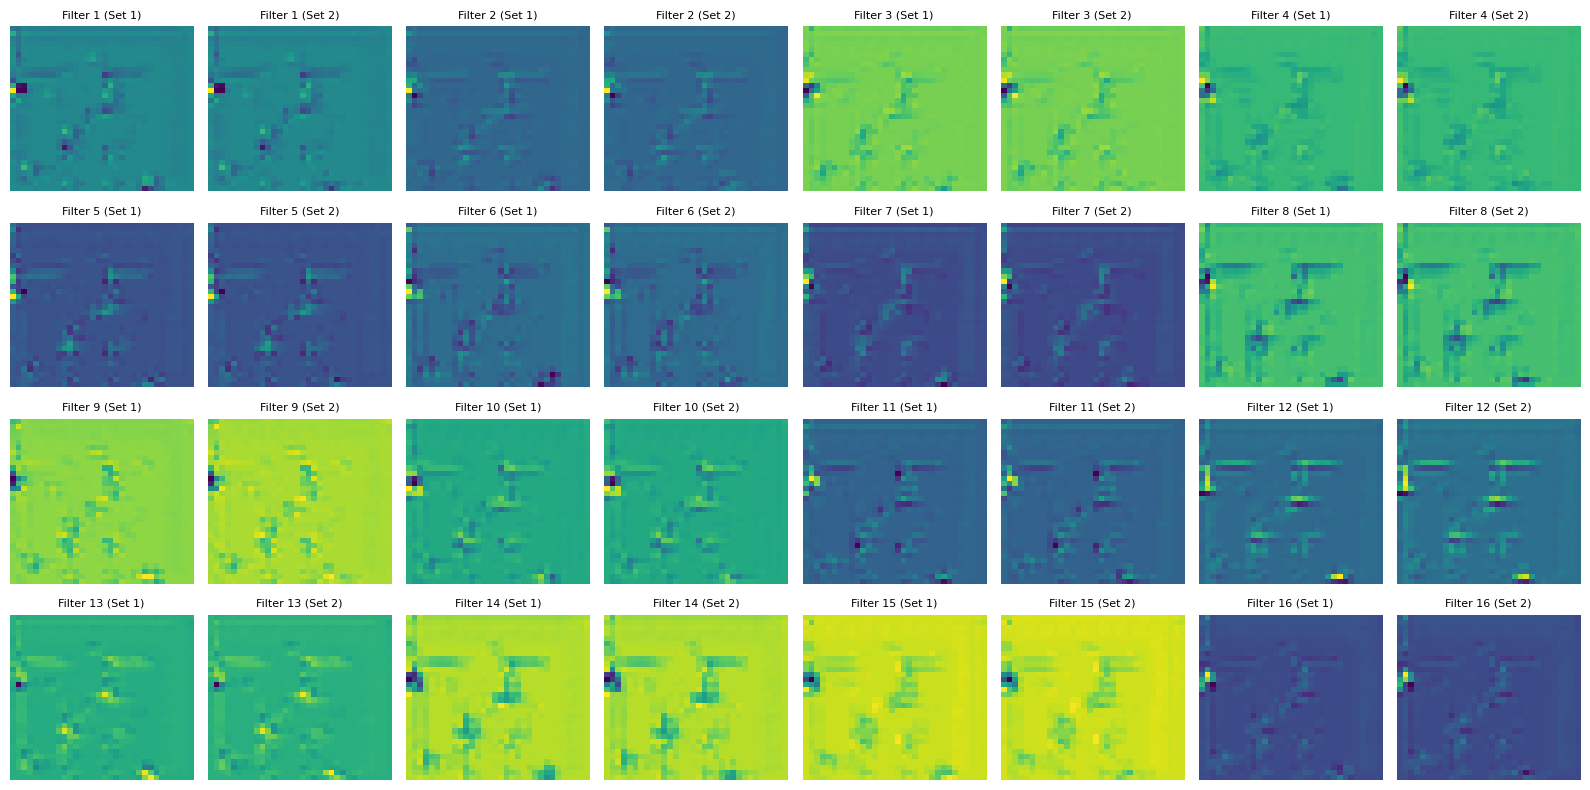

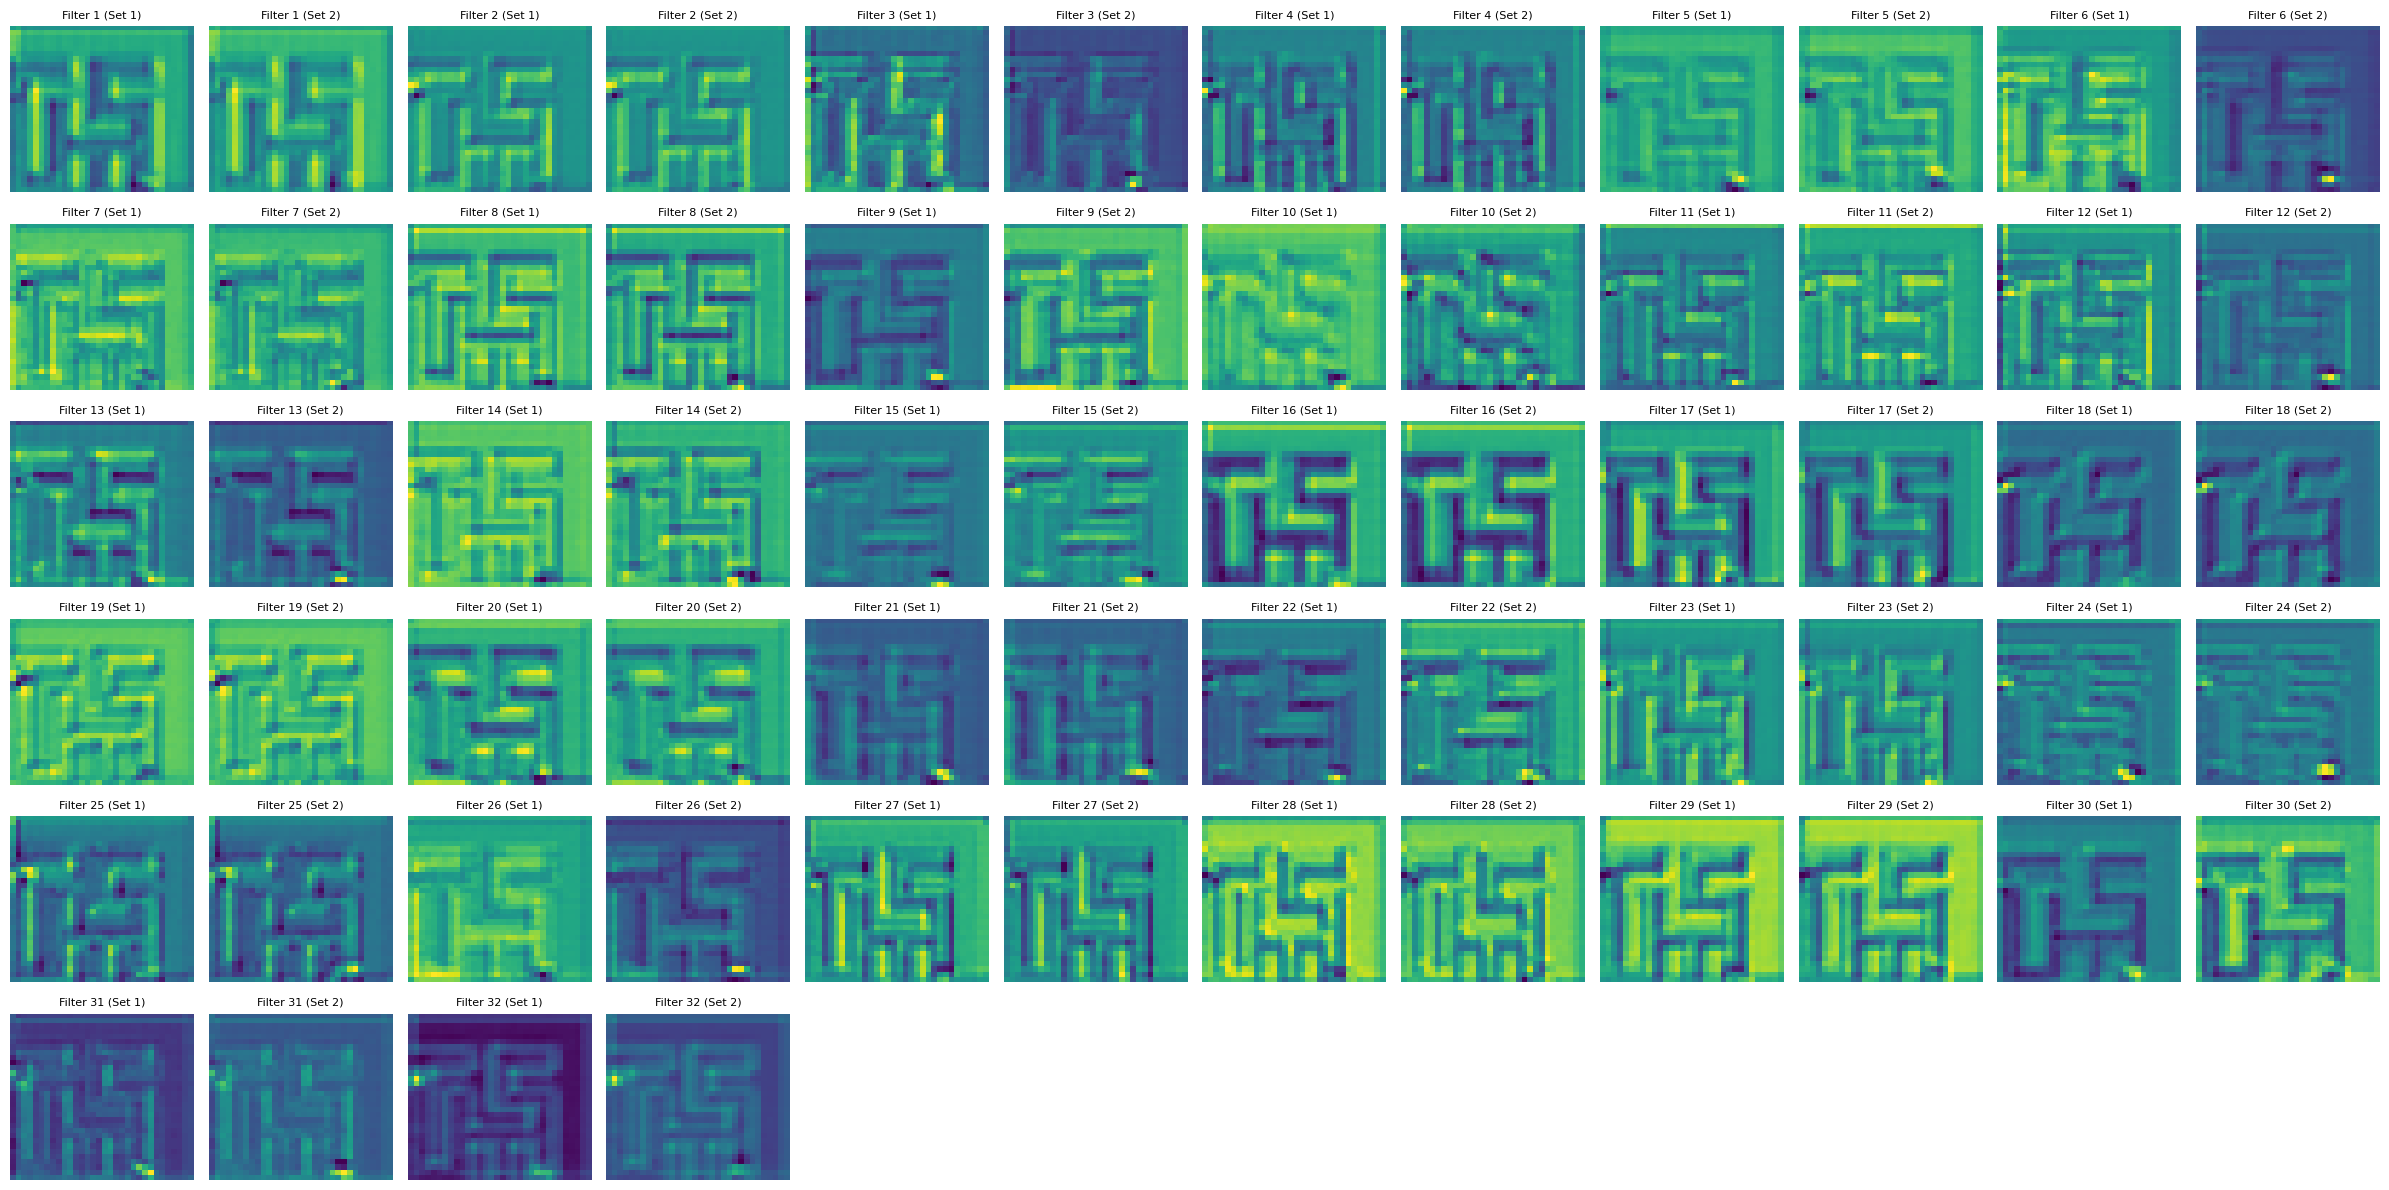

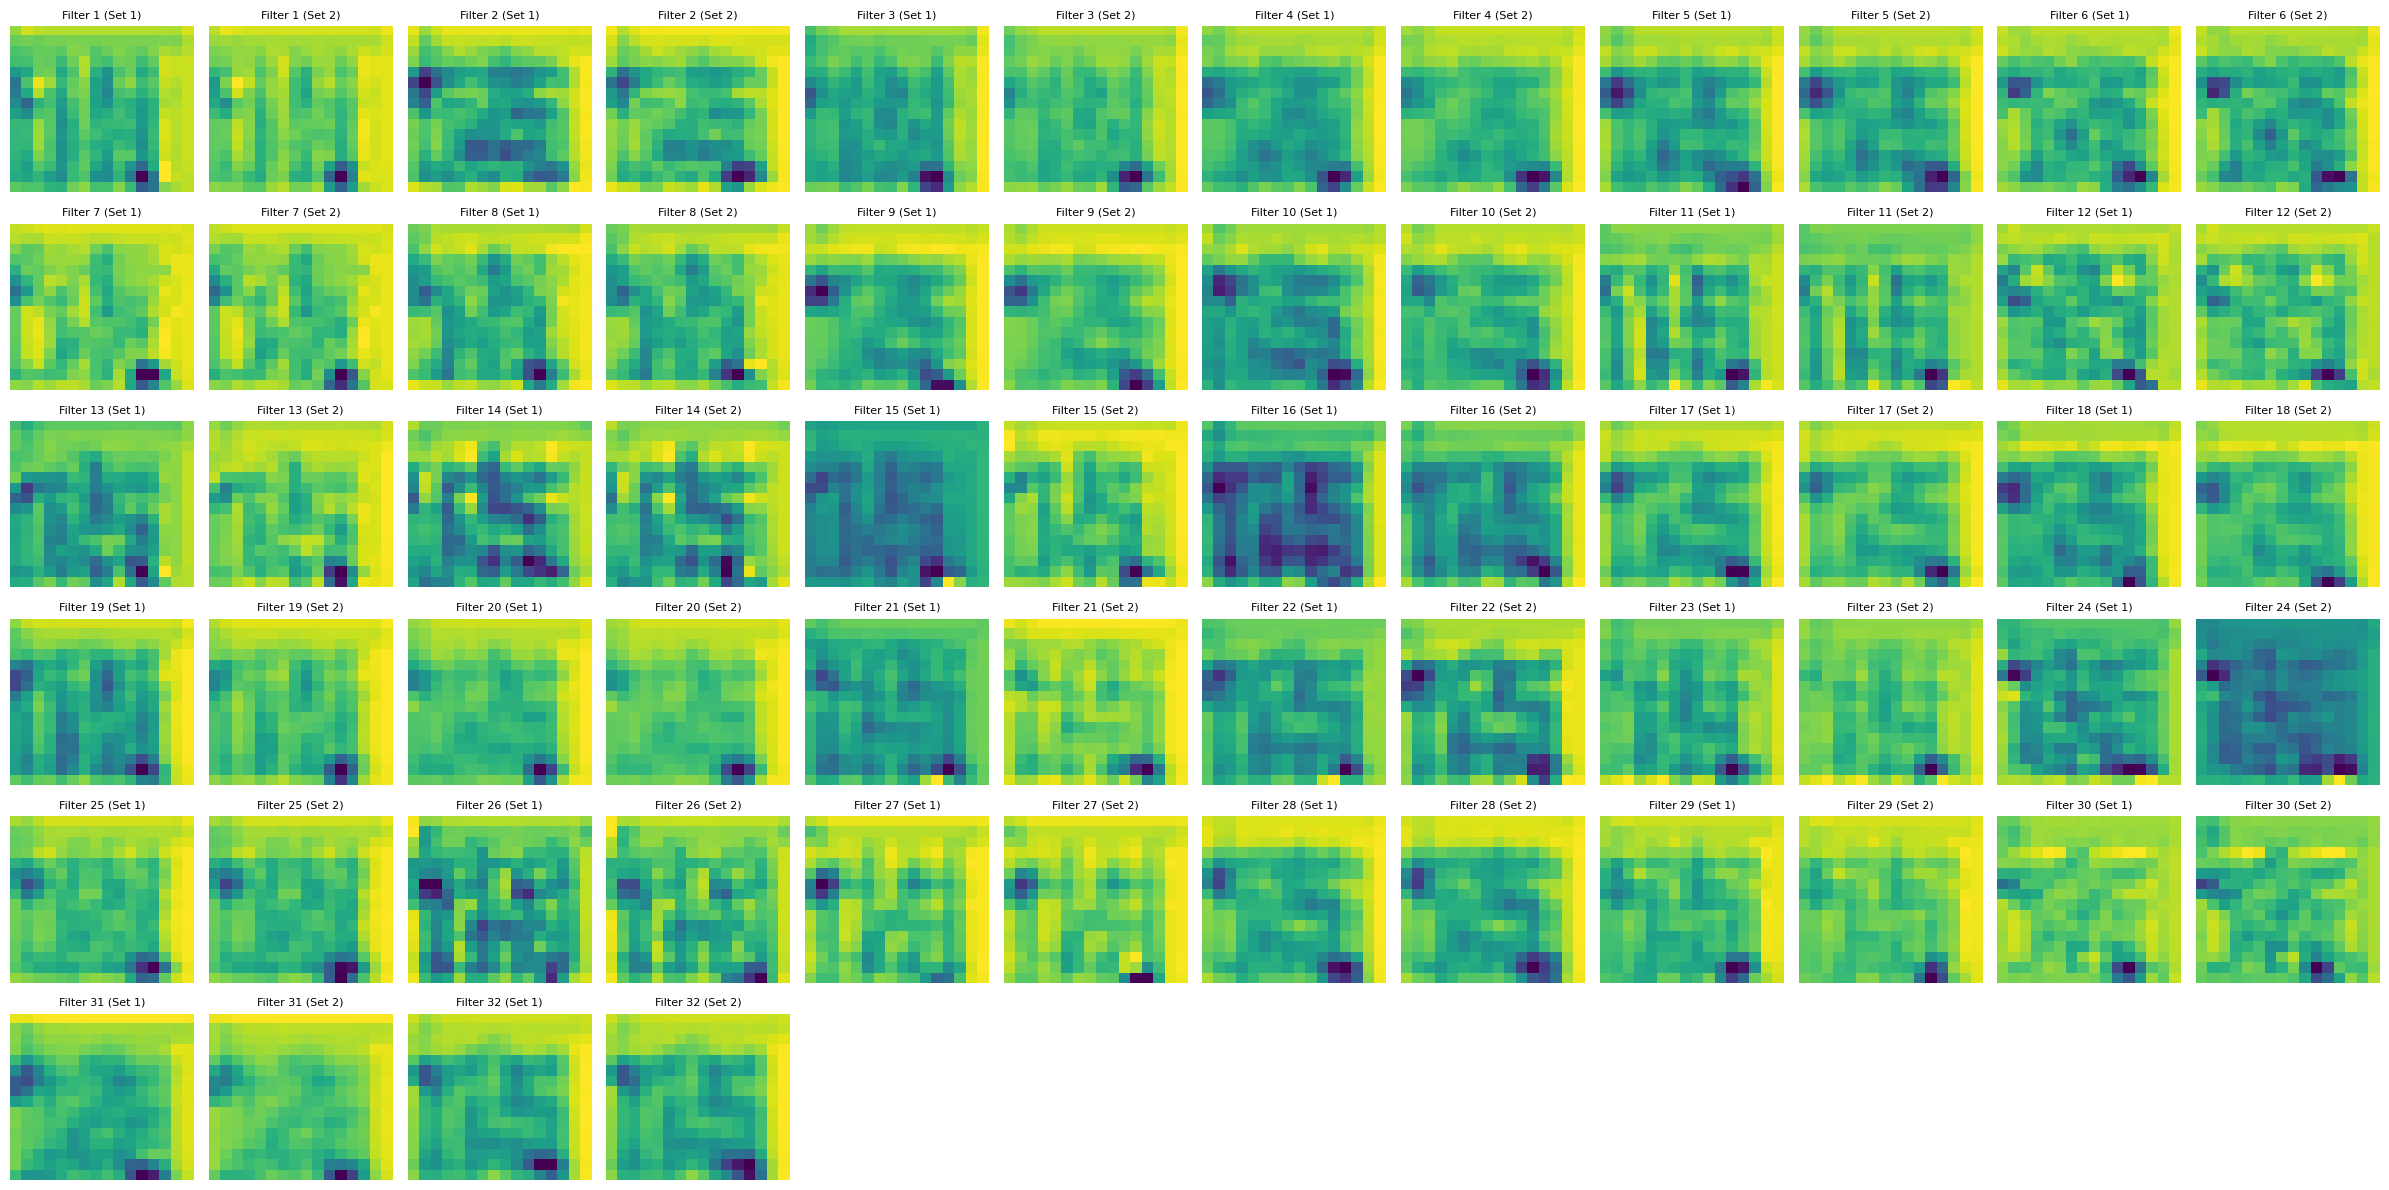

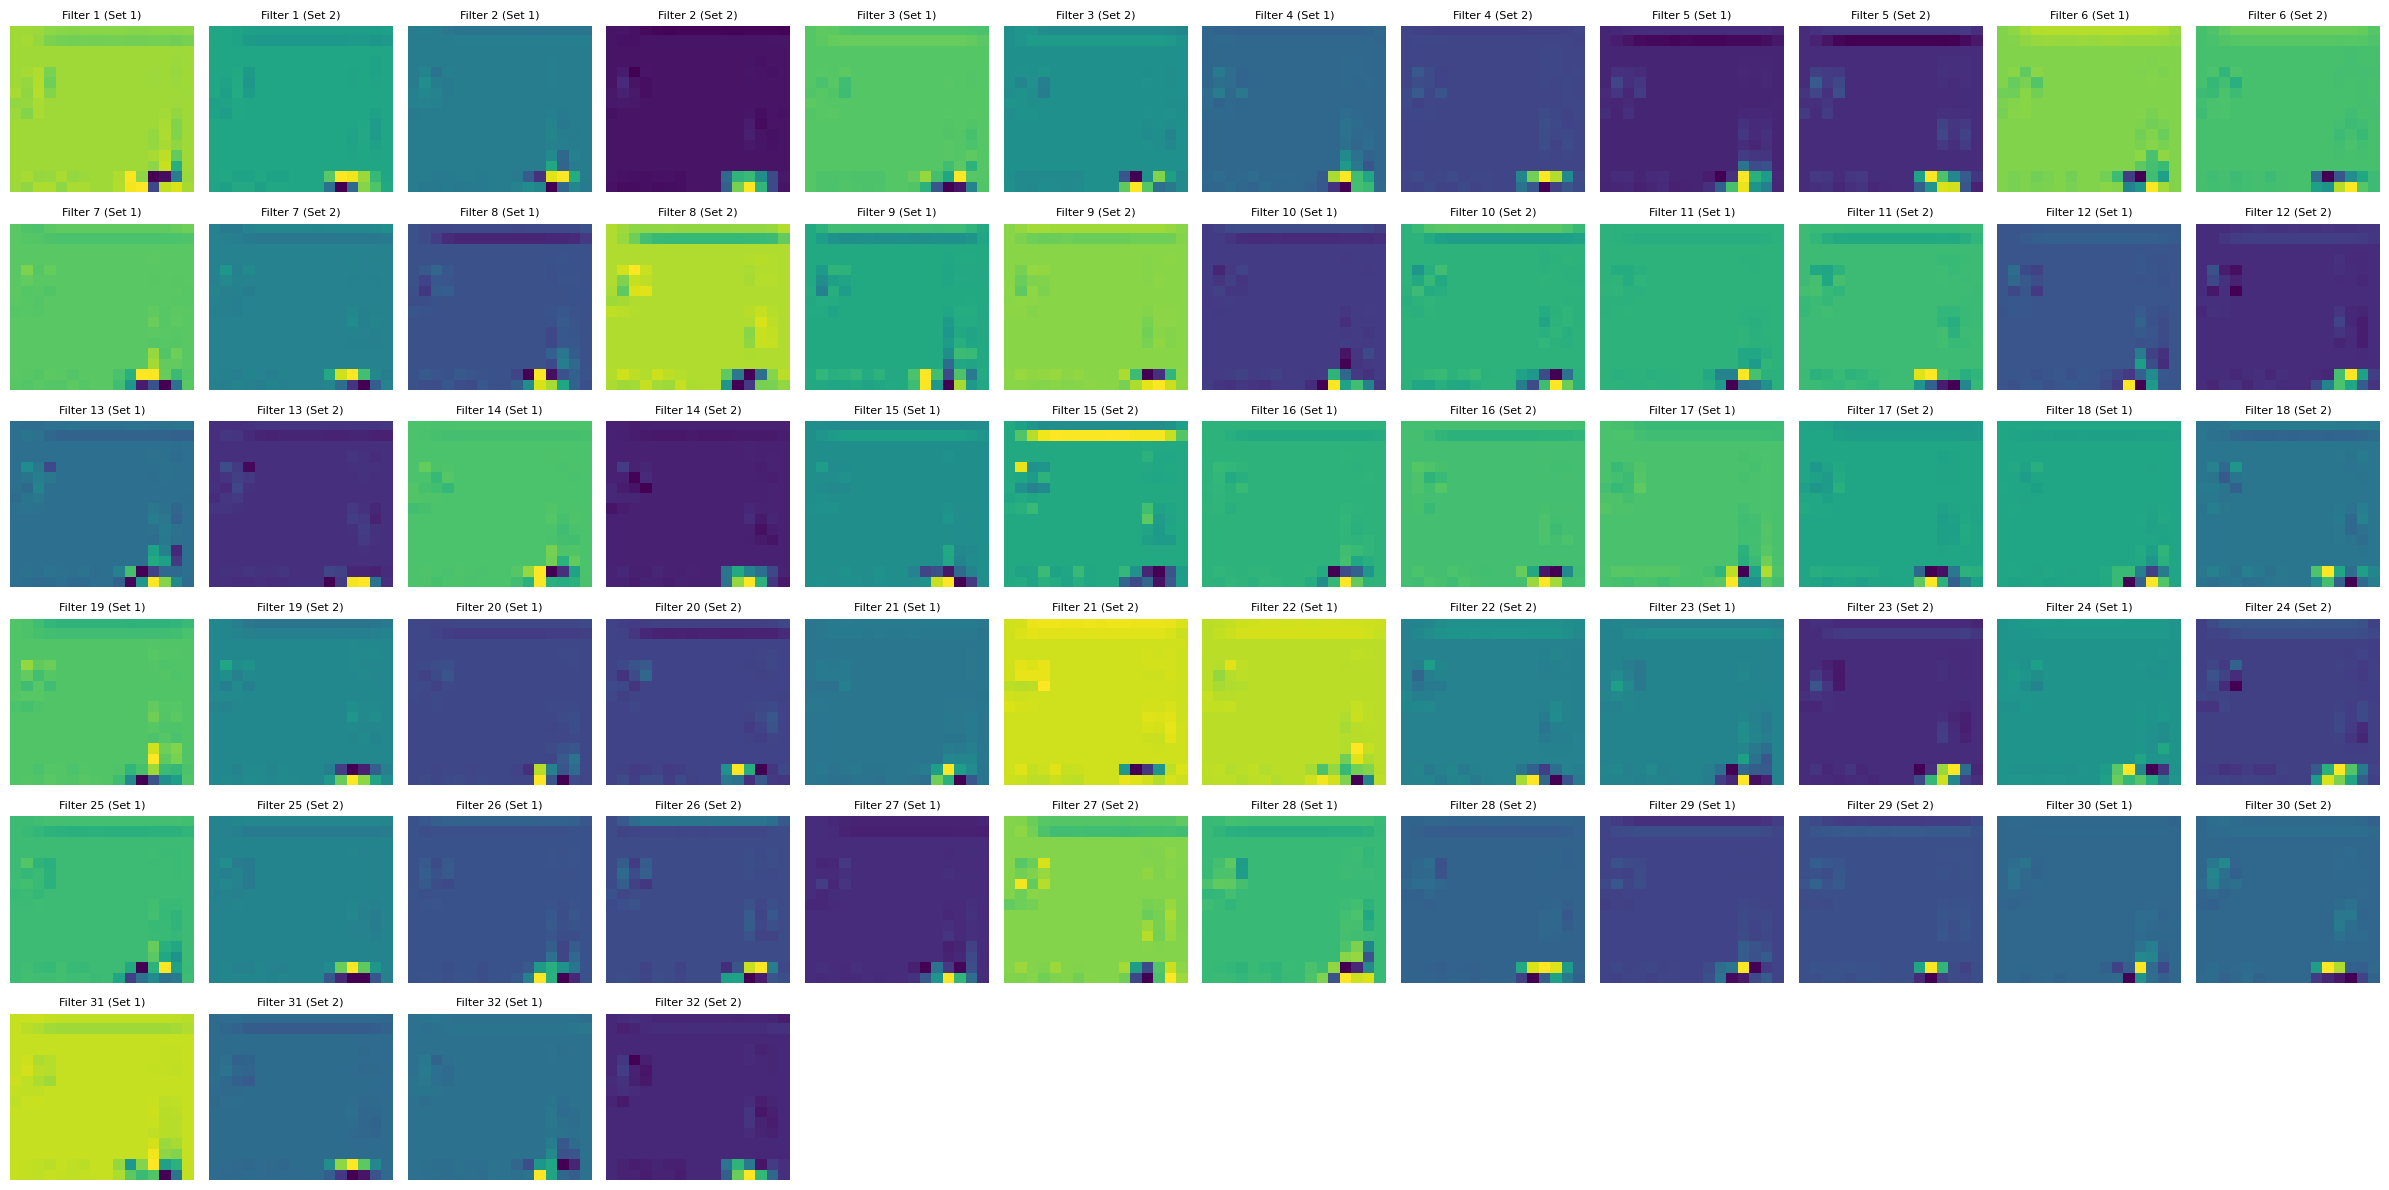

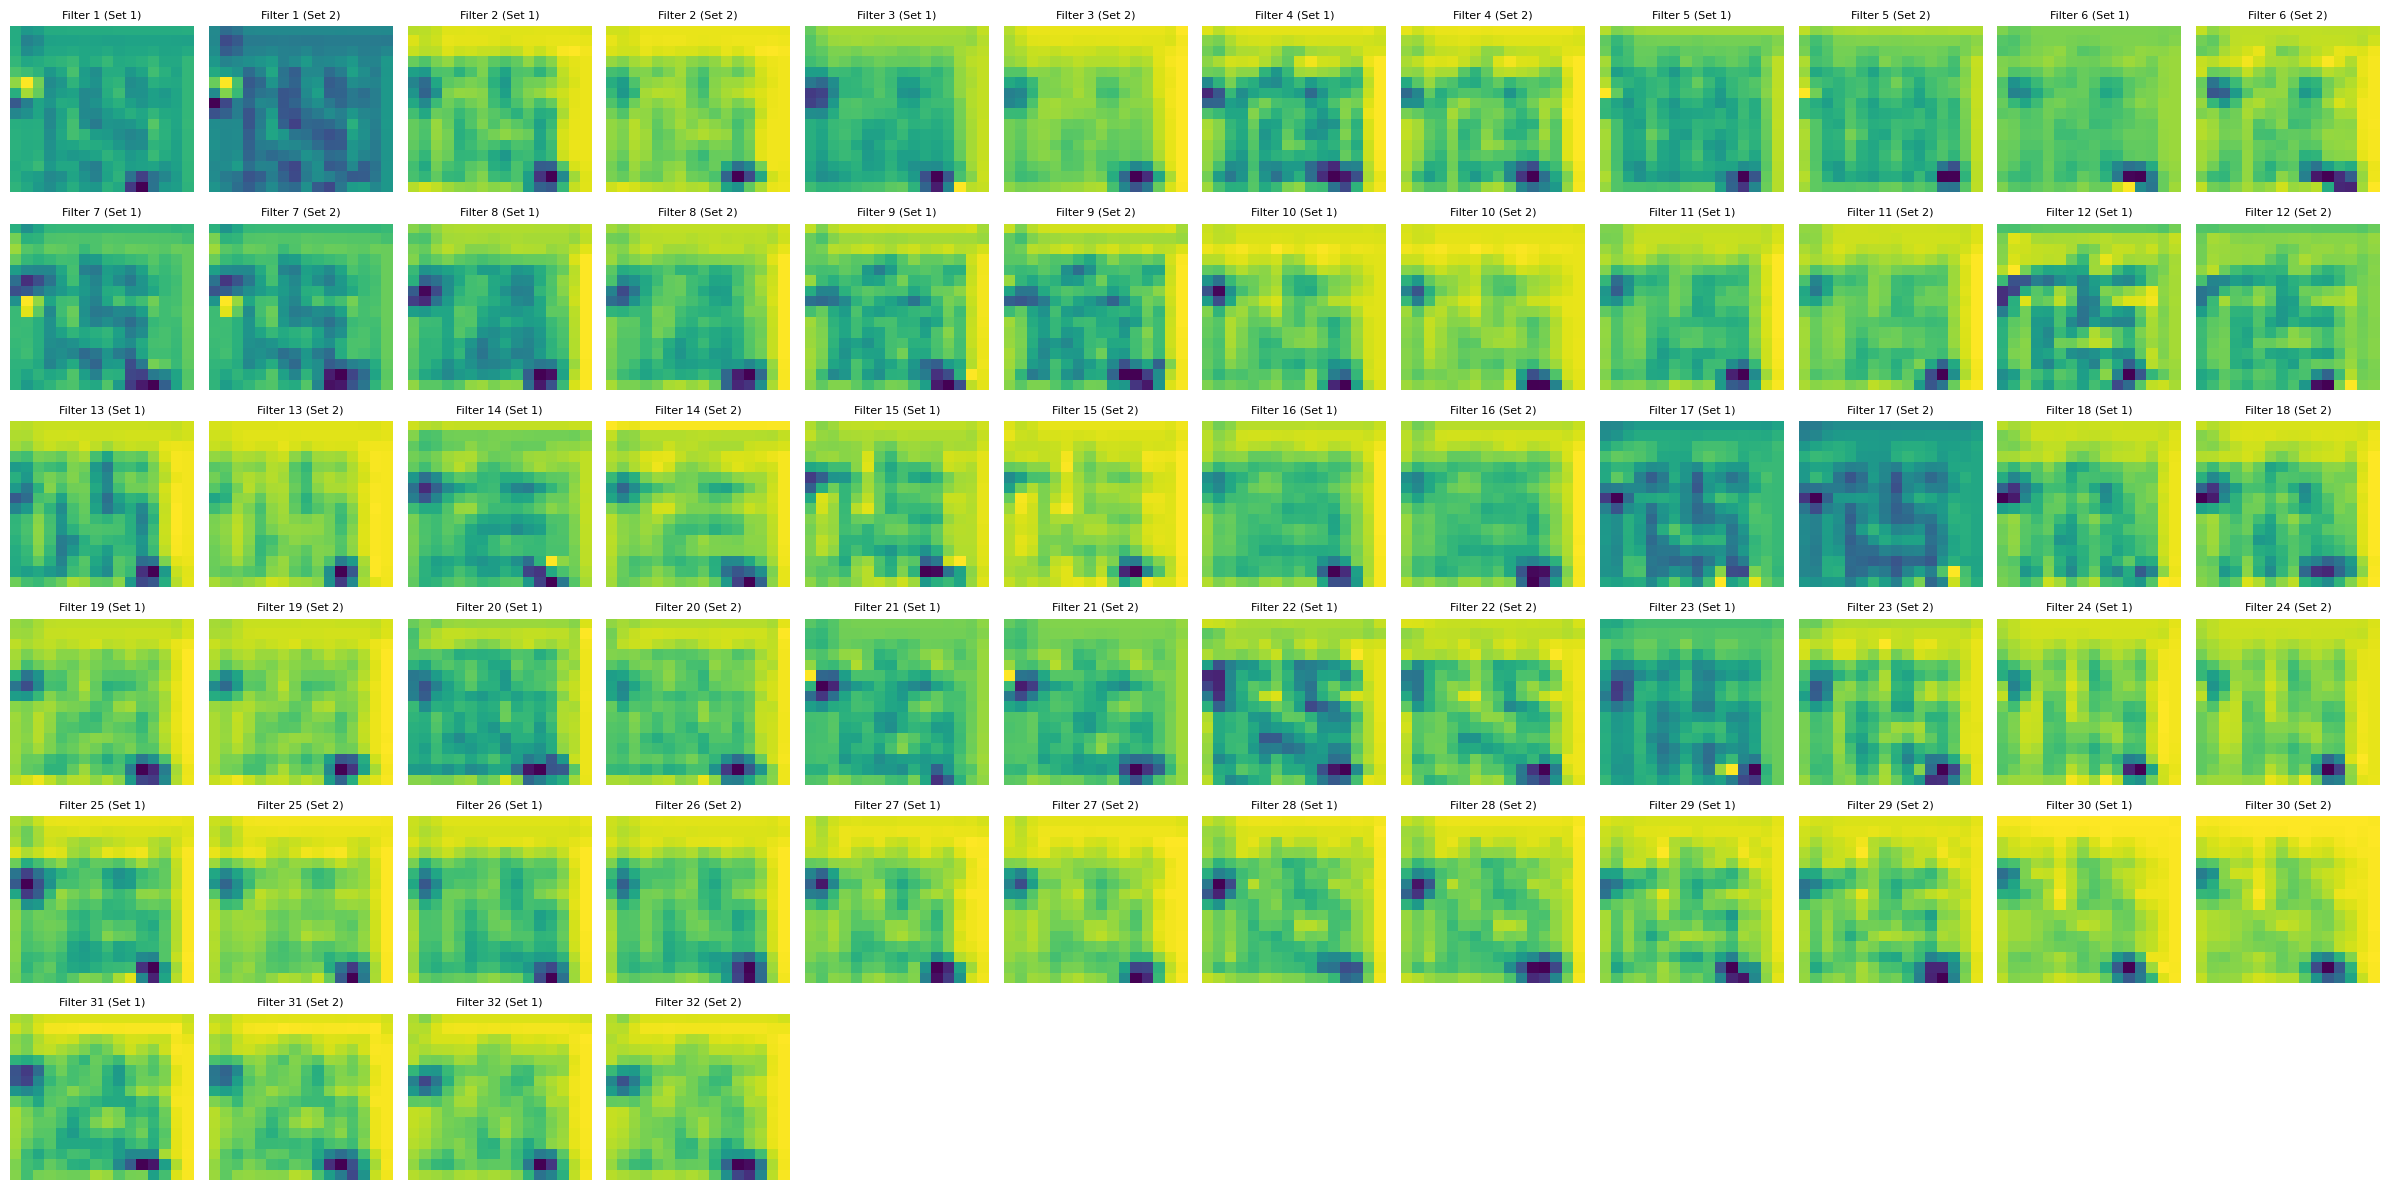

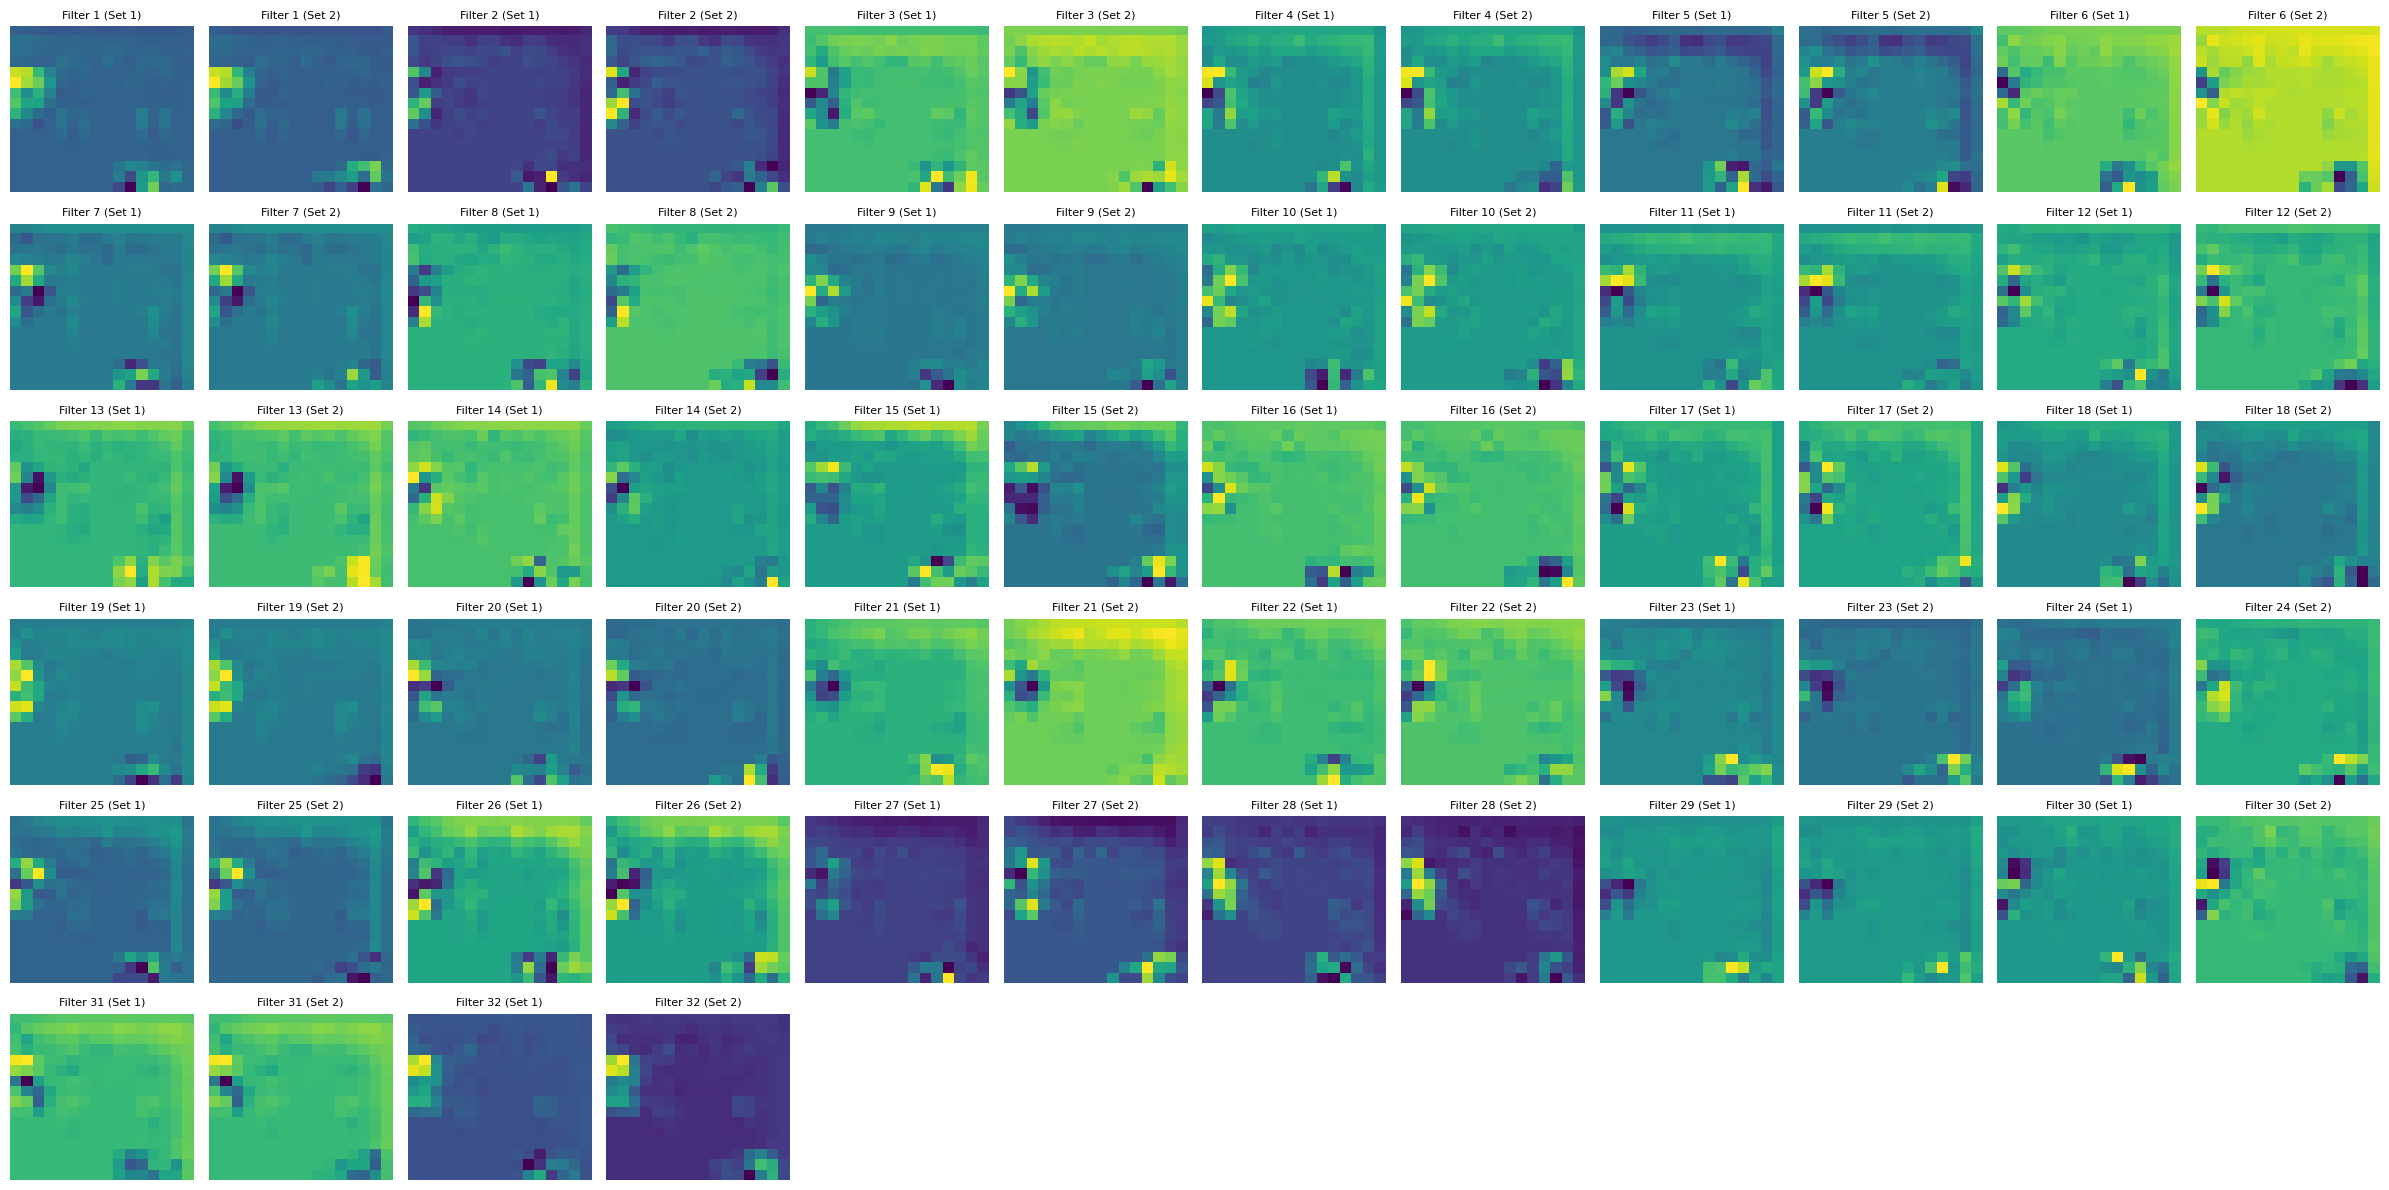

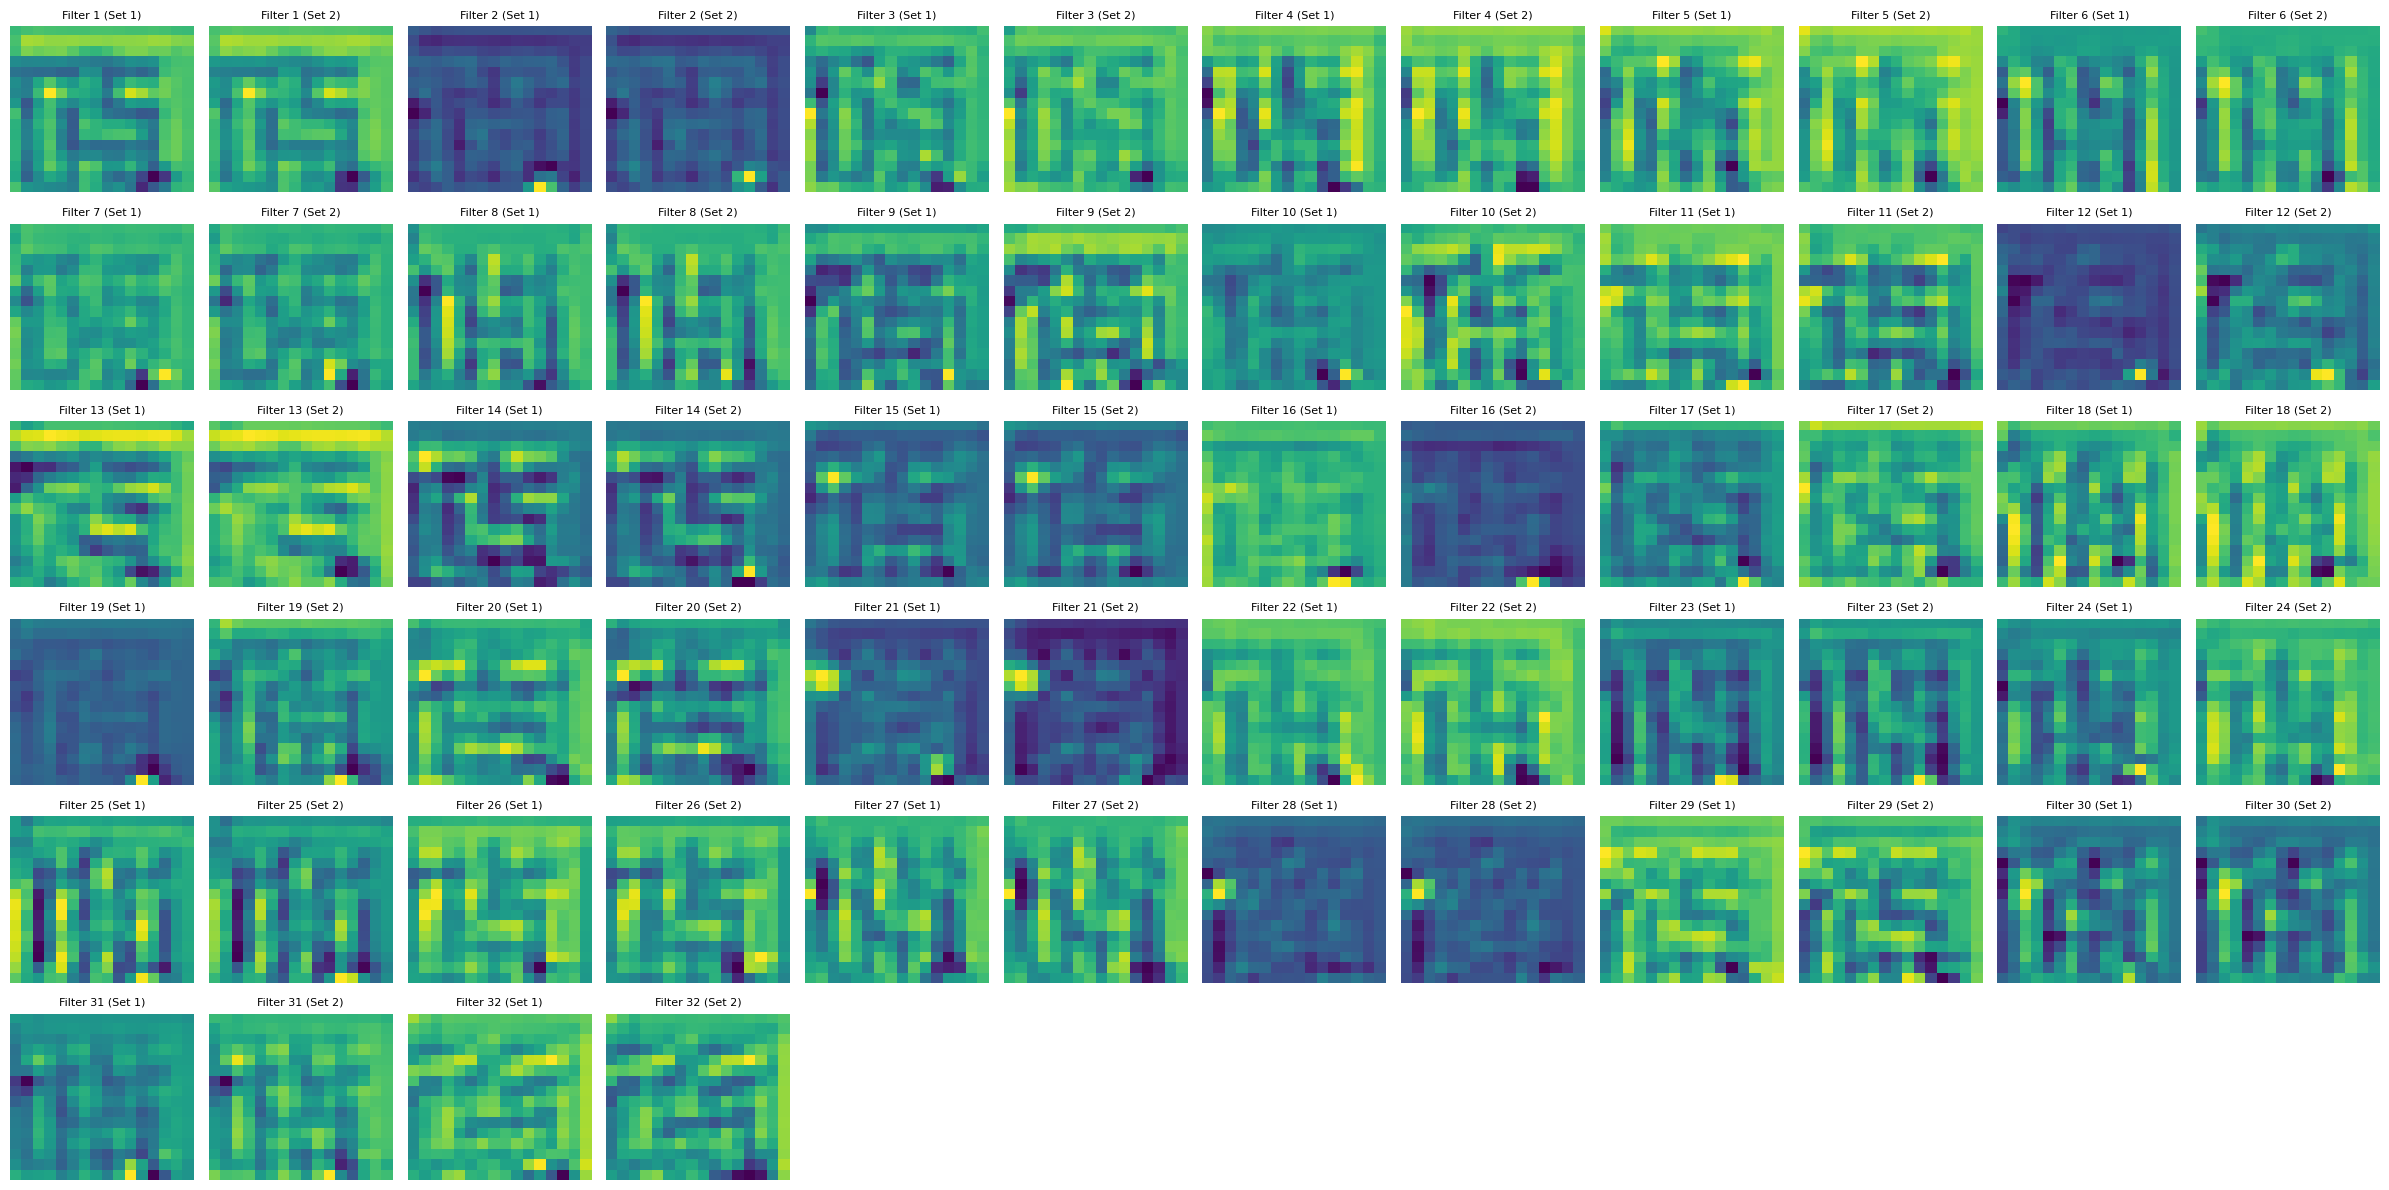

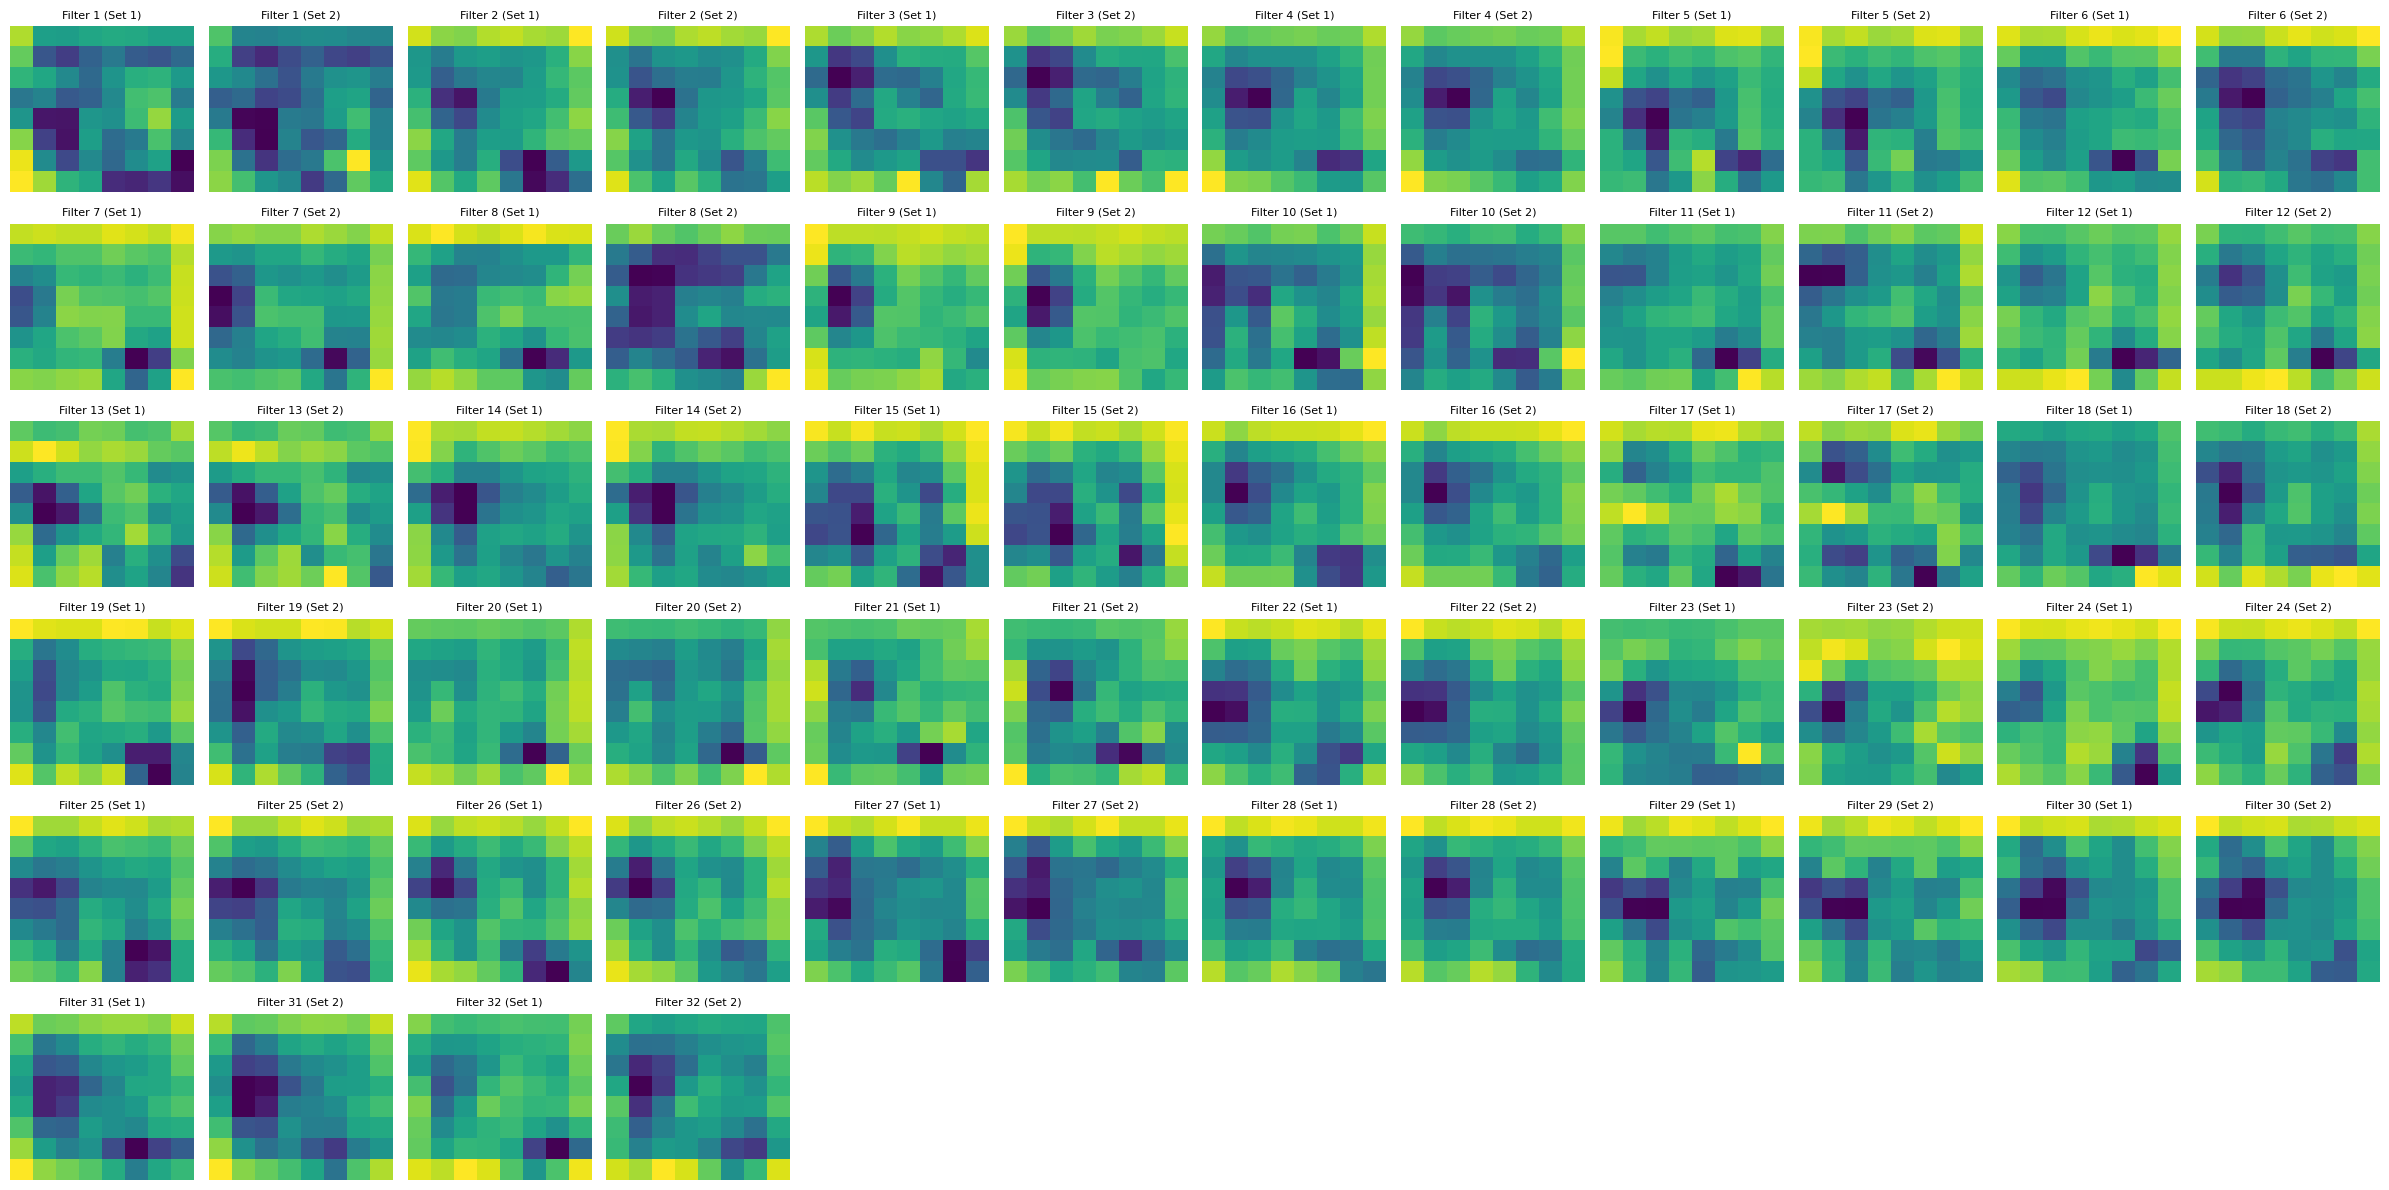

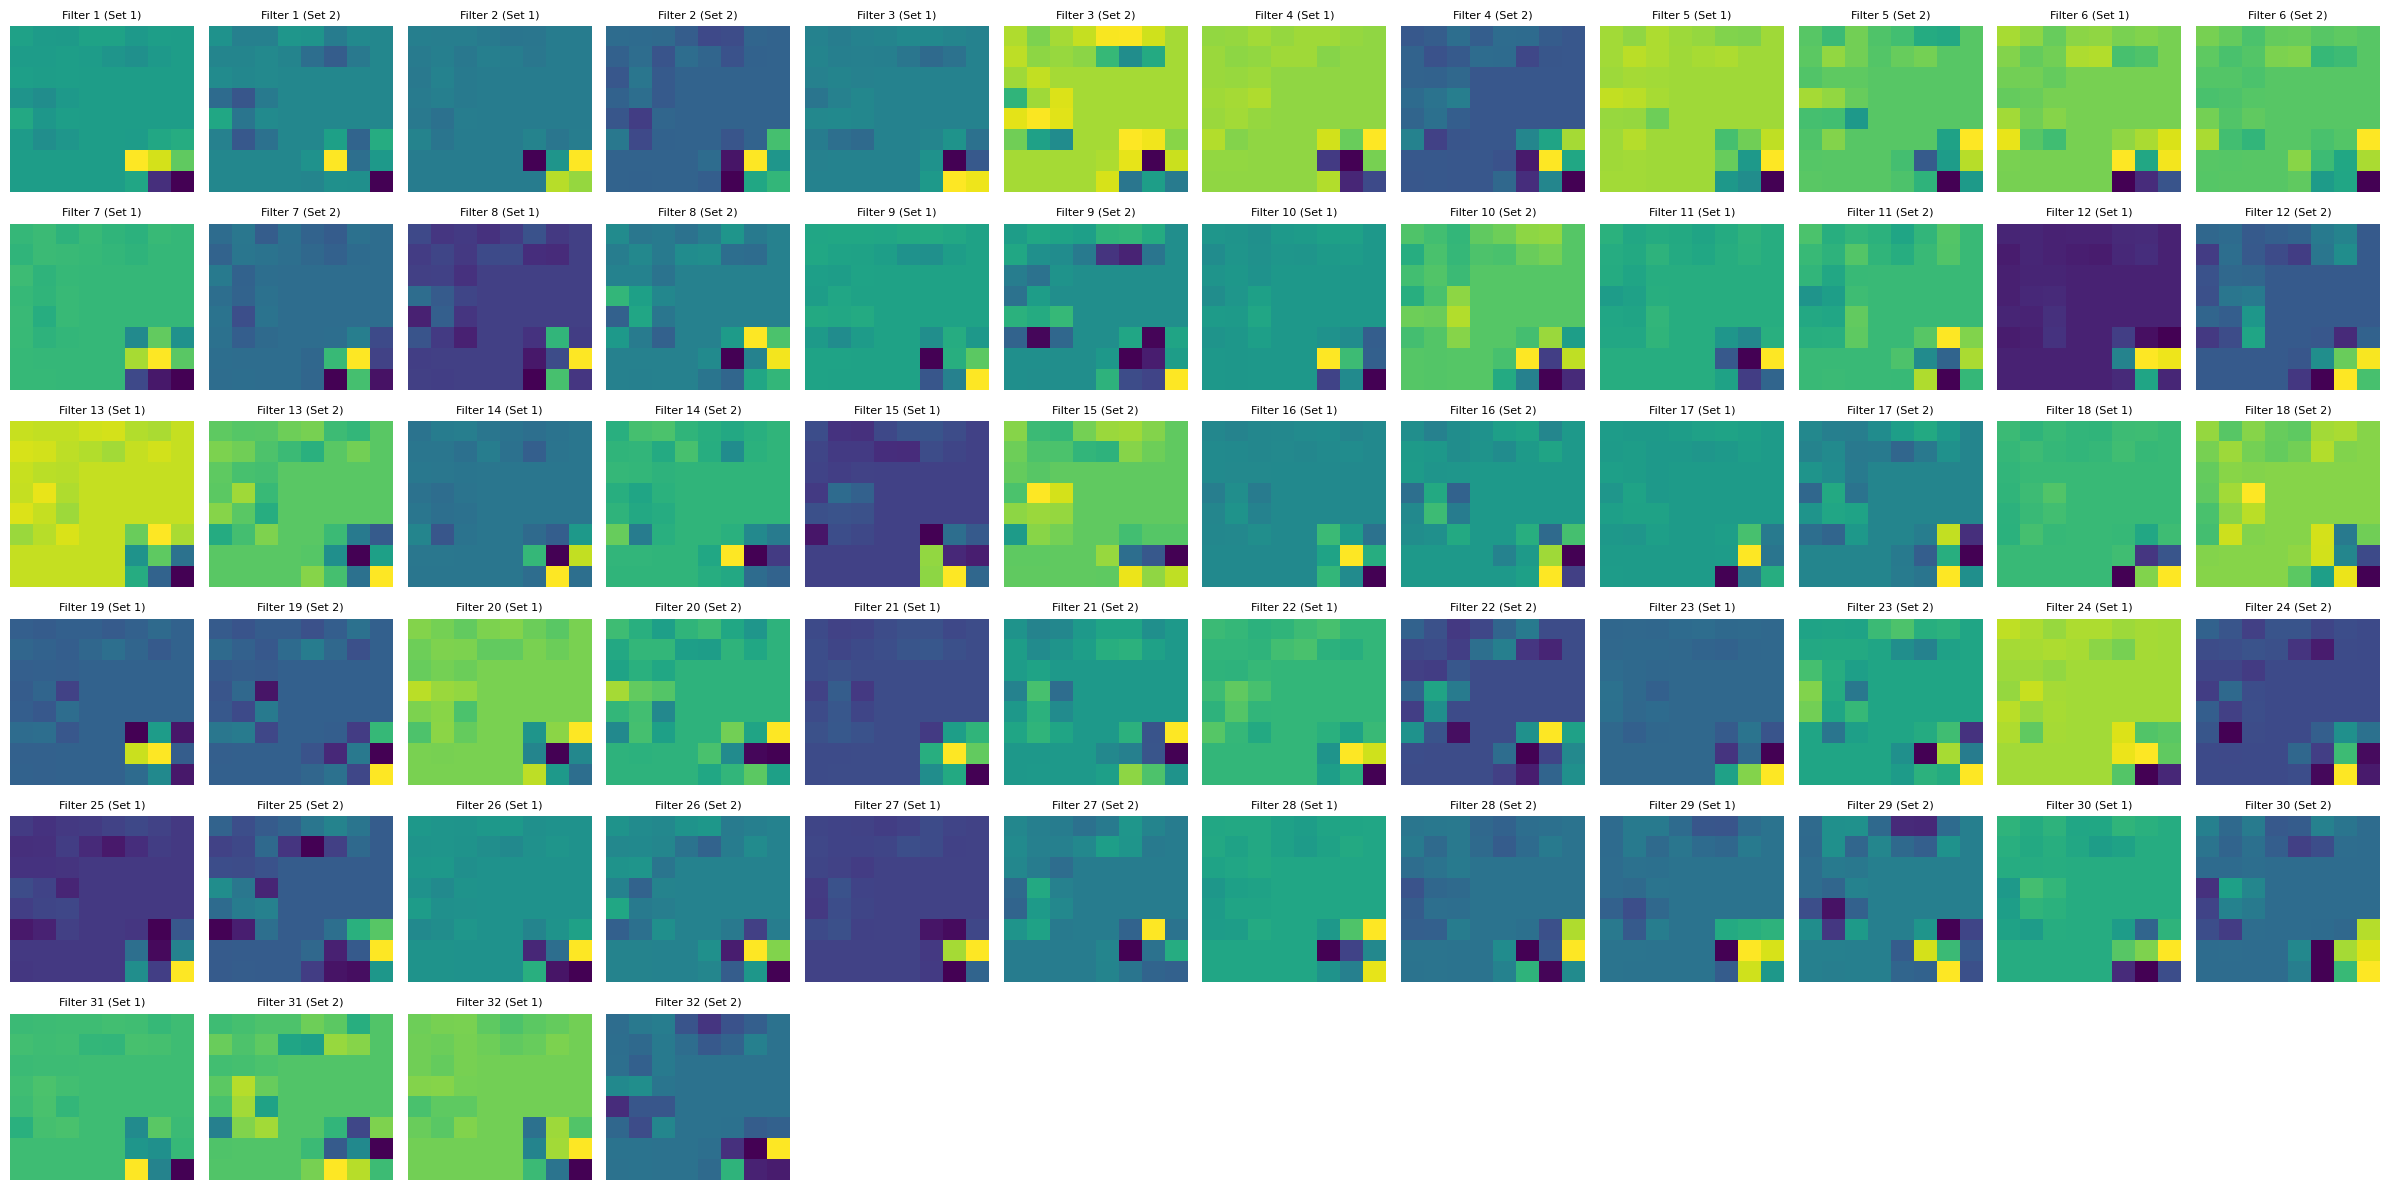

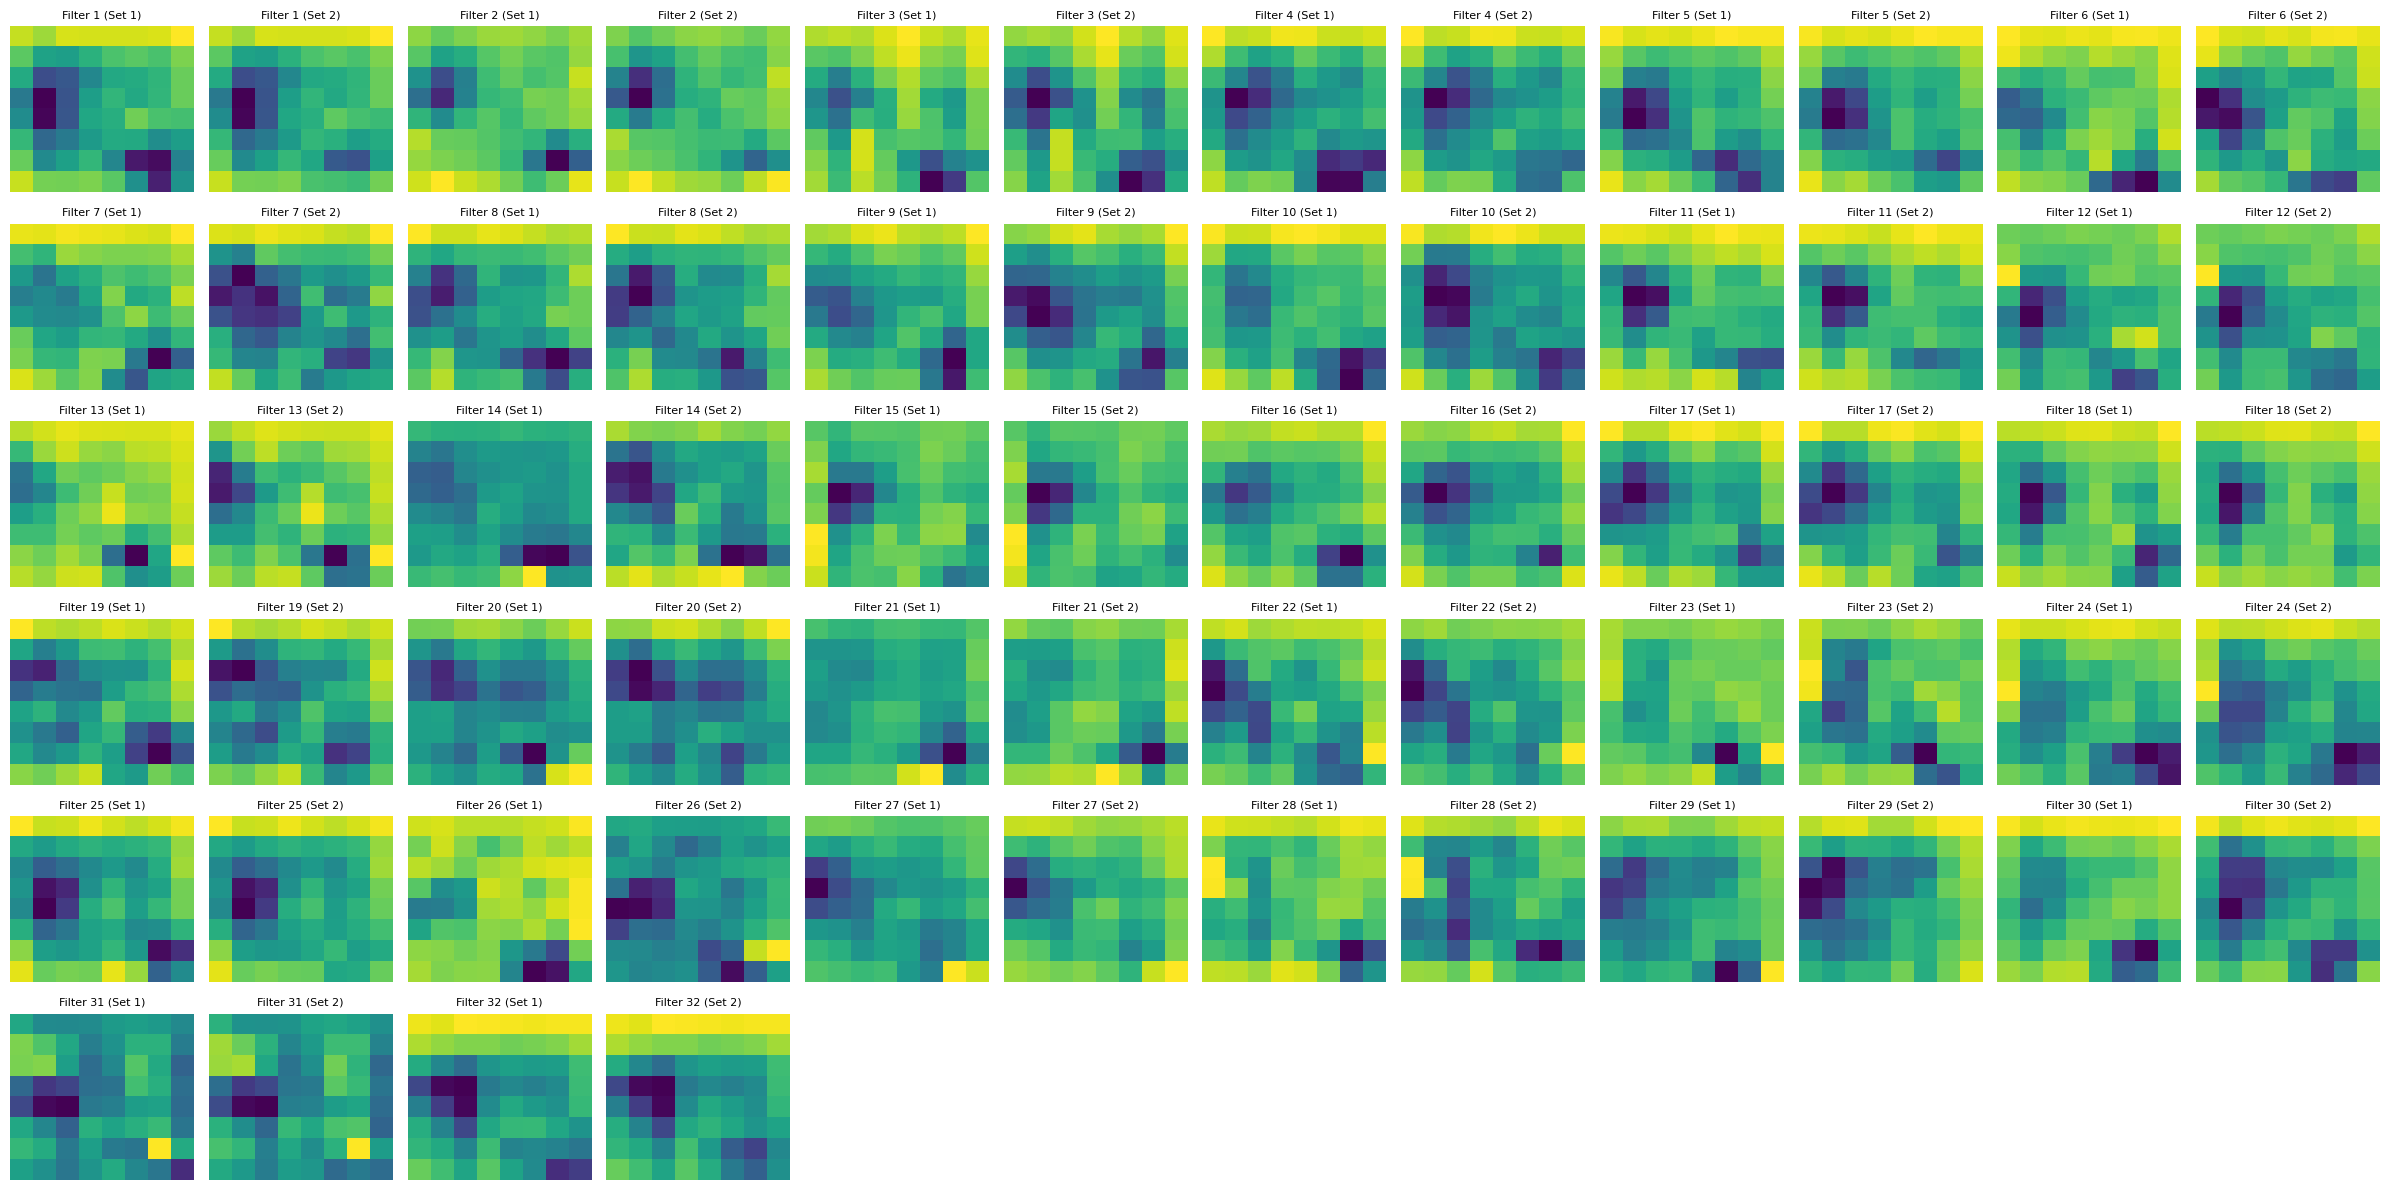

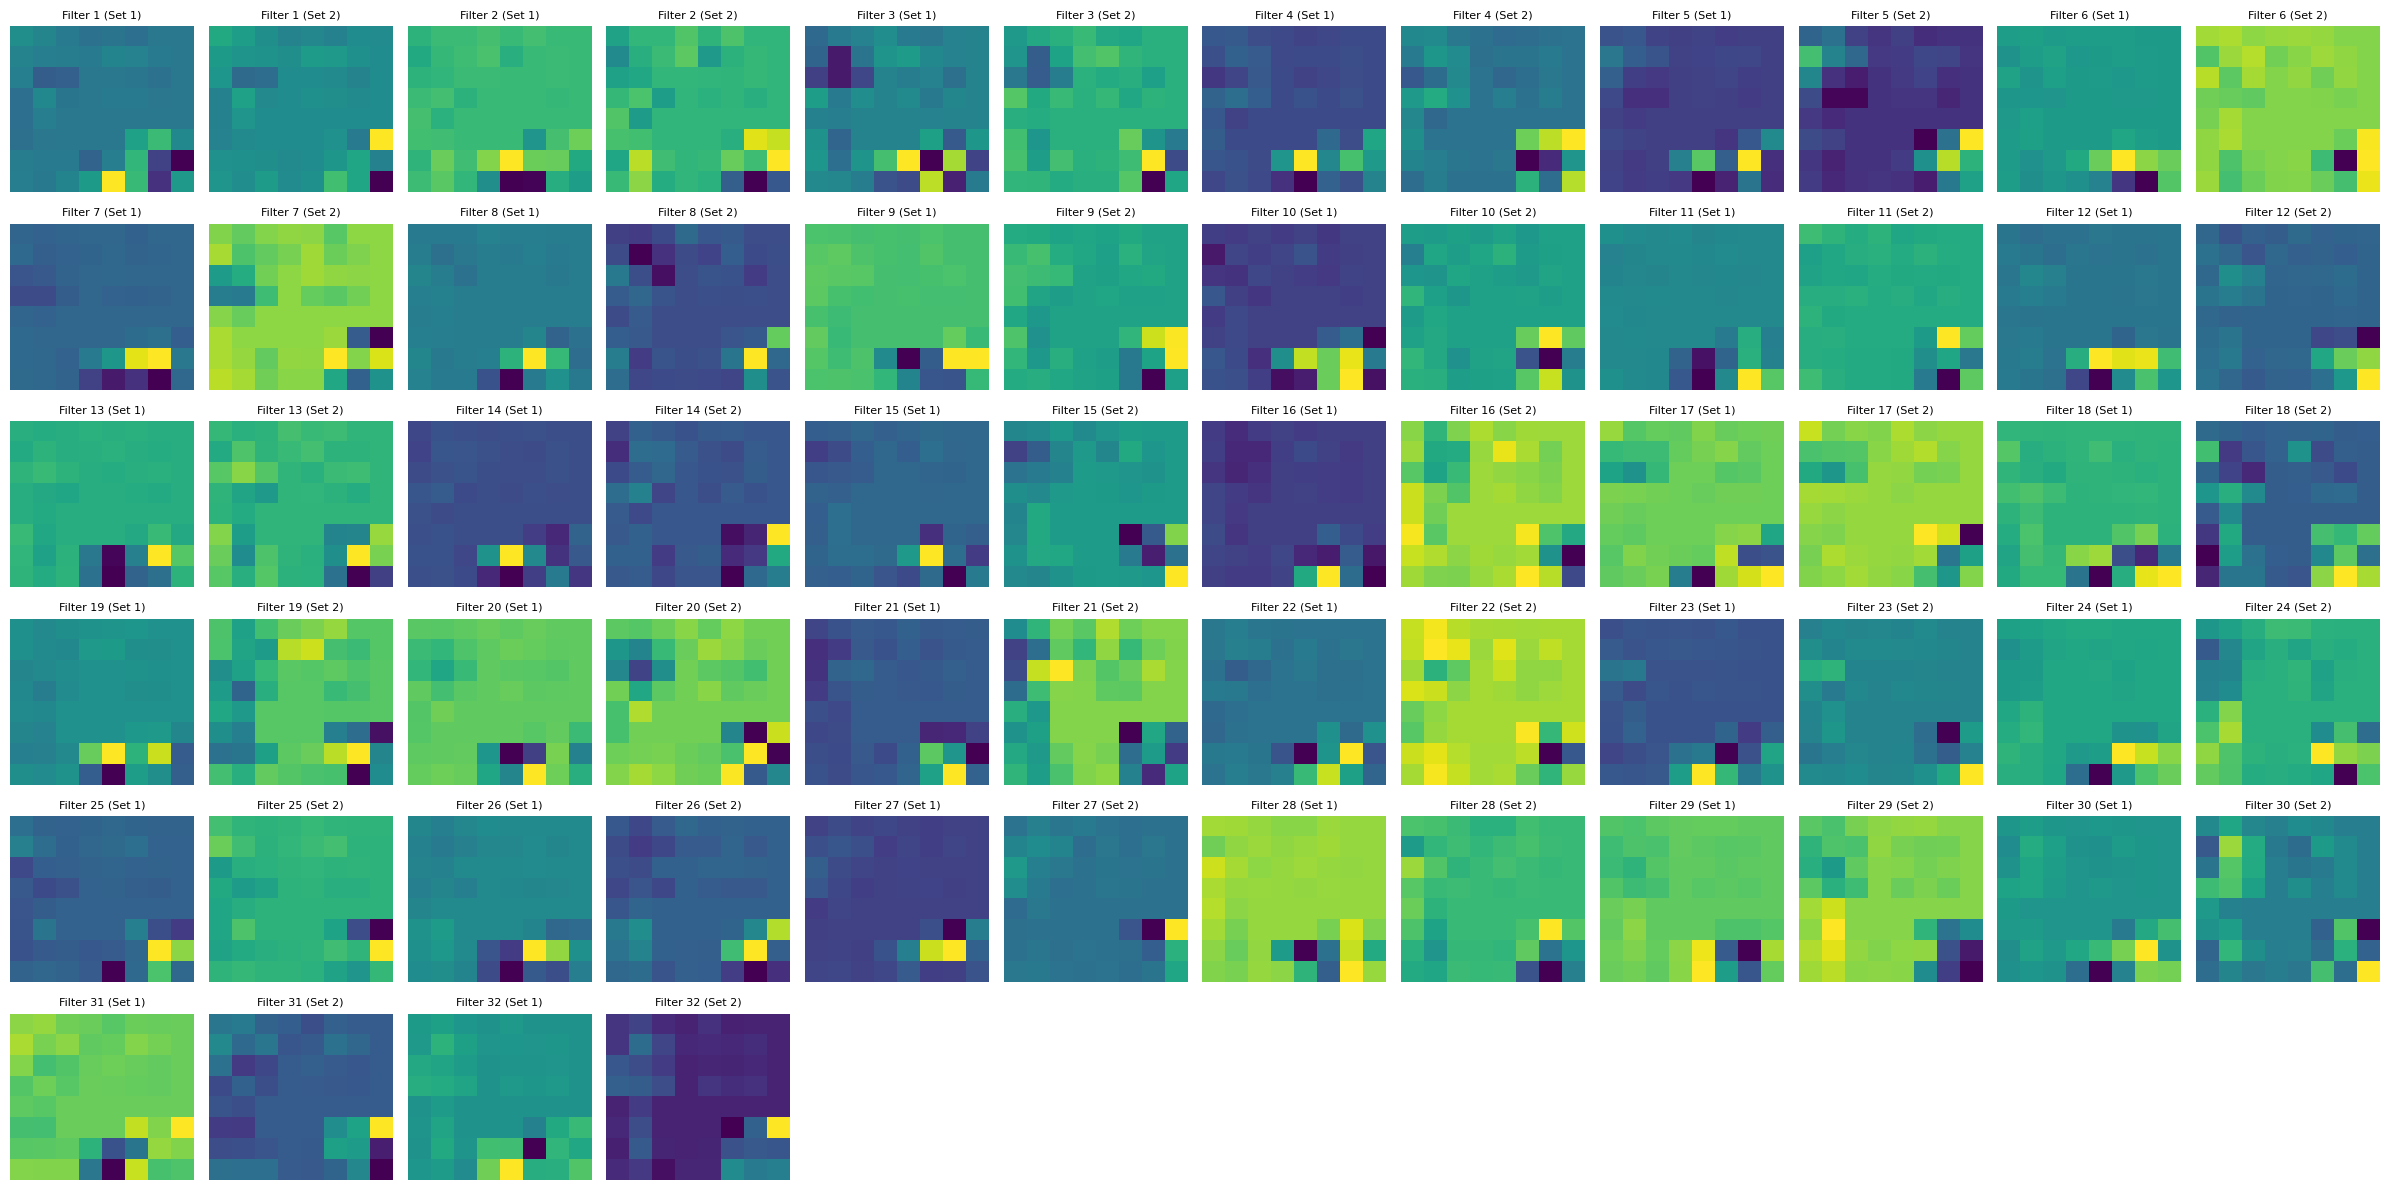

In [ ]:
all_layers = ['conv_seqs_0_conv', 'conv_seqs_0_res_block0_conv0', 'conv_seqs_0_res_block0_conv1', 'conv_seqs_0_res_block1_conv0', 'conv_seqs_0_res_block1_conv1', 'conv_seqs_1_conv', 'conv_seqs_1_res_block0_conv0', 'conv_seqs_1_res_block0_conv1', 'conv_seqs_1_res_block1_conv0', 'conv_seqs_1_res_block1_conv1', 'conv_seqs_2_conv', 'conv_seqs_2_res_block0_conv0', 'conv_seqs_2_res_block0_conv1', 'conv_seqs_2_res_block1_conv0', 'conv_seqs_2_res_block1_conv1']

helpers.plot_activations_for_layers_side_by_side(key_activations, gem_activations,helpers.rename_paths(layer_paths))

torch.Size([16, 64, 64])
Key: conv_seqs_0_conv has non-zero differences.
torch.Size([16, 32, 32])
Key: conv_seqs_0_res_block0_conv0 has non-zero differences.
torch.Size([16, 32, 32])
Key: conv_seqs_0_res_block0_conv1 has non-zero differences.
torch.Size([16, 32, 32])
Key: conv_seqs_0_res_block1_conv0 has non-zero differences.
torch.Size([16, 32, 32])
Key: conv_seqs_0_res_block1_conv1 has non-zero differences.
torch.Size([32, 32, 32])
Key: conv_seqs_1_conv has non-zero differences.
torch.Size([32, 16, 16])
Key: conv_seqs_1_res_block0_conv0 has non-zero differences.
torch.Size([32, 16, 16])
Key: conv_seqs_1_res_block0_conv1 has non-zero differences.
torch.Size([32, 16, 16])
Key: conv_seqs_1_res_block1_conv0 has non-zero differences.
torch.Size([32, 16, 16])
Key: conv_seqs_1_res_block1_conv1 has non-zero differences.
torch.Size([32, 16, 16])
Key: conv_seqs_2_conv has non-zero differences.
torch.Size([32, 8, 8])
Key: conv_seqs_2_res_block0_conv0 has non-zero differences.
torch.Size([32, 8,

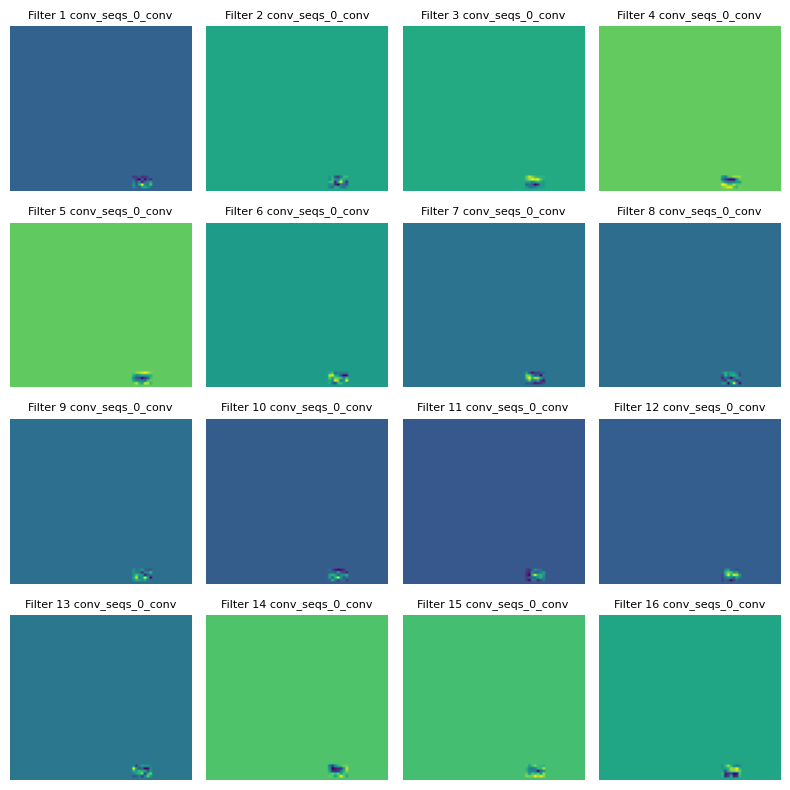

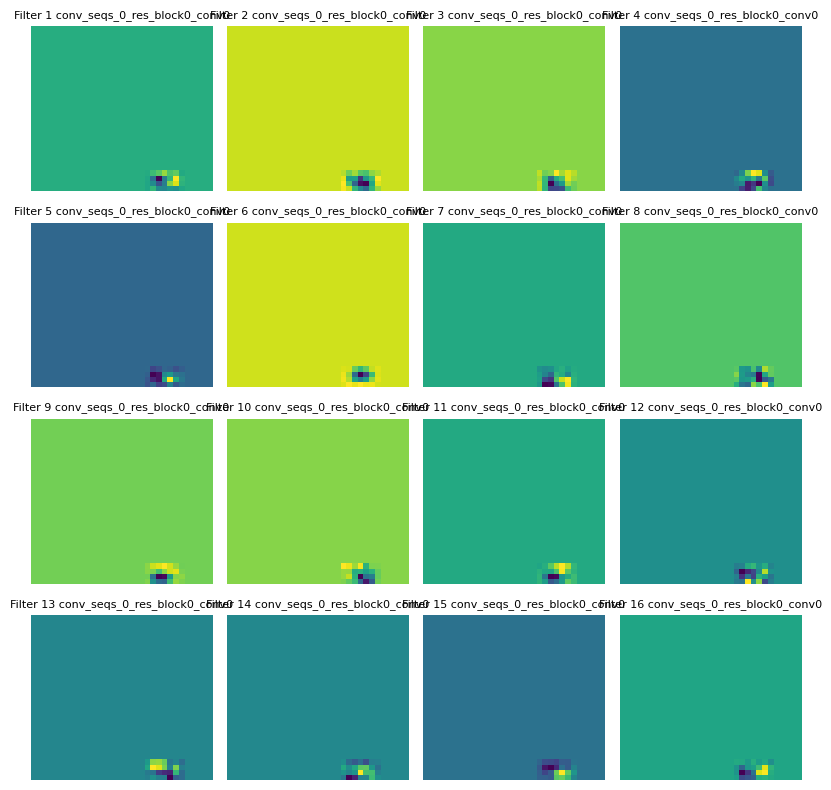

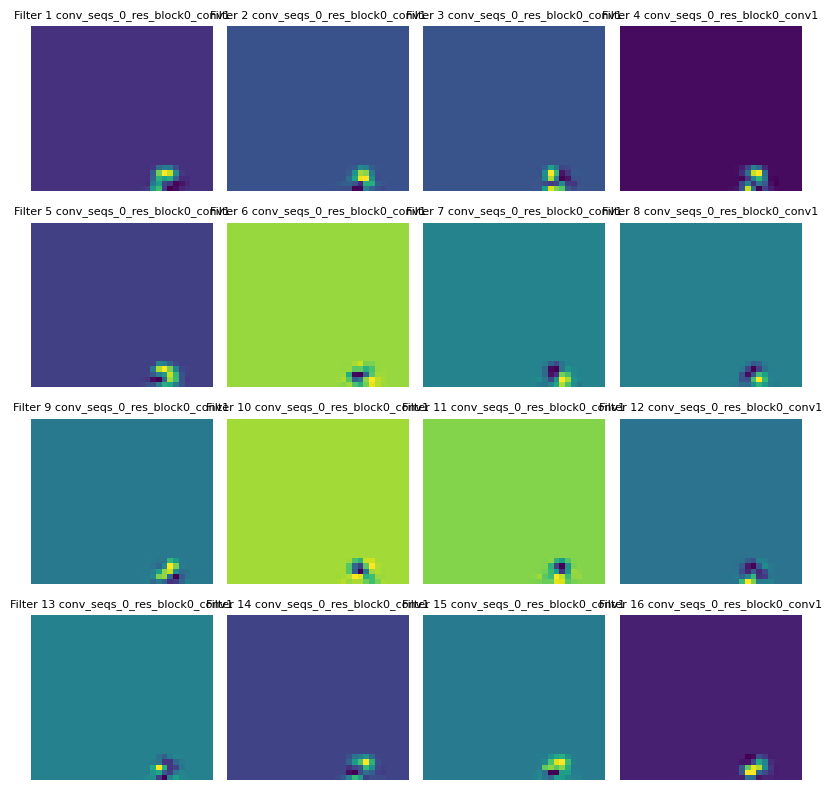

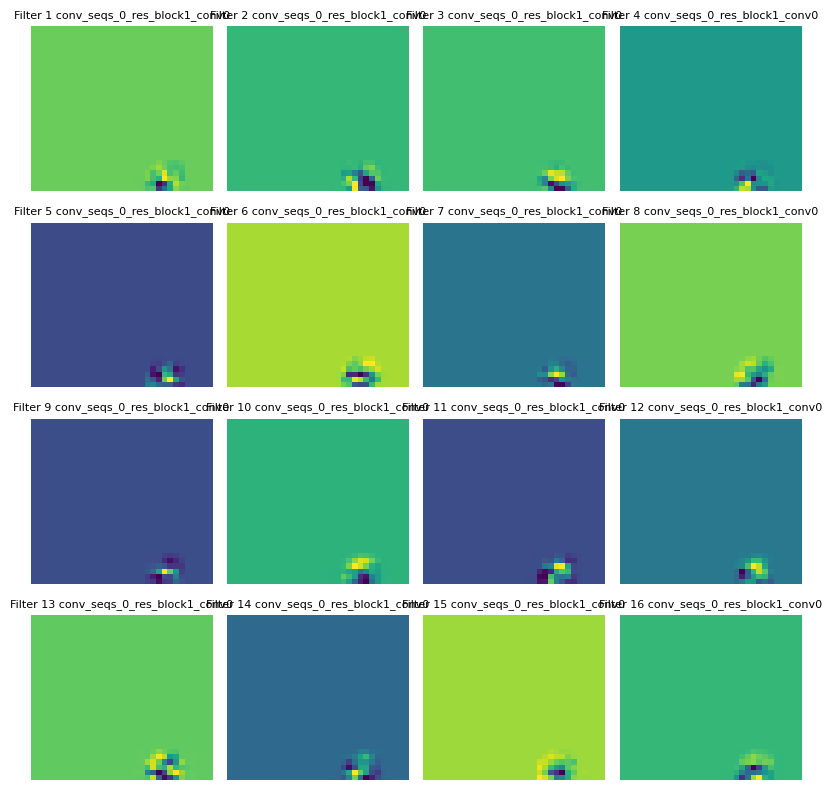

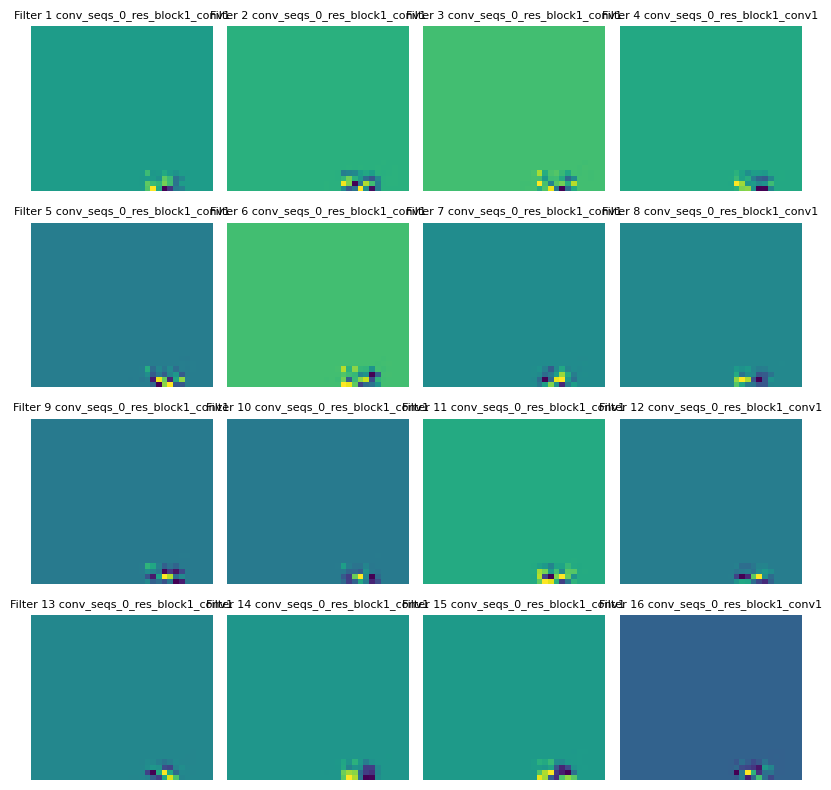

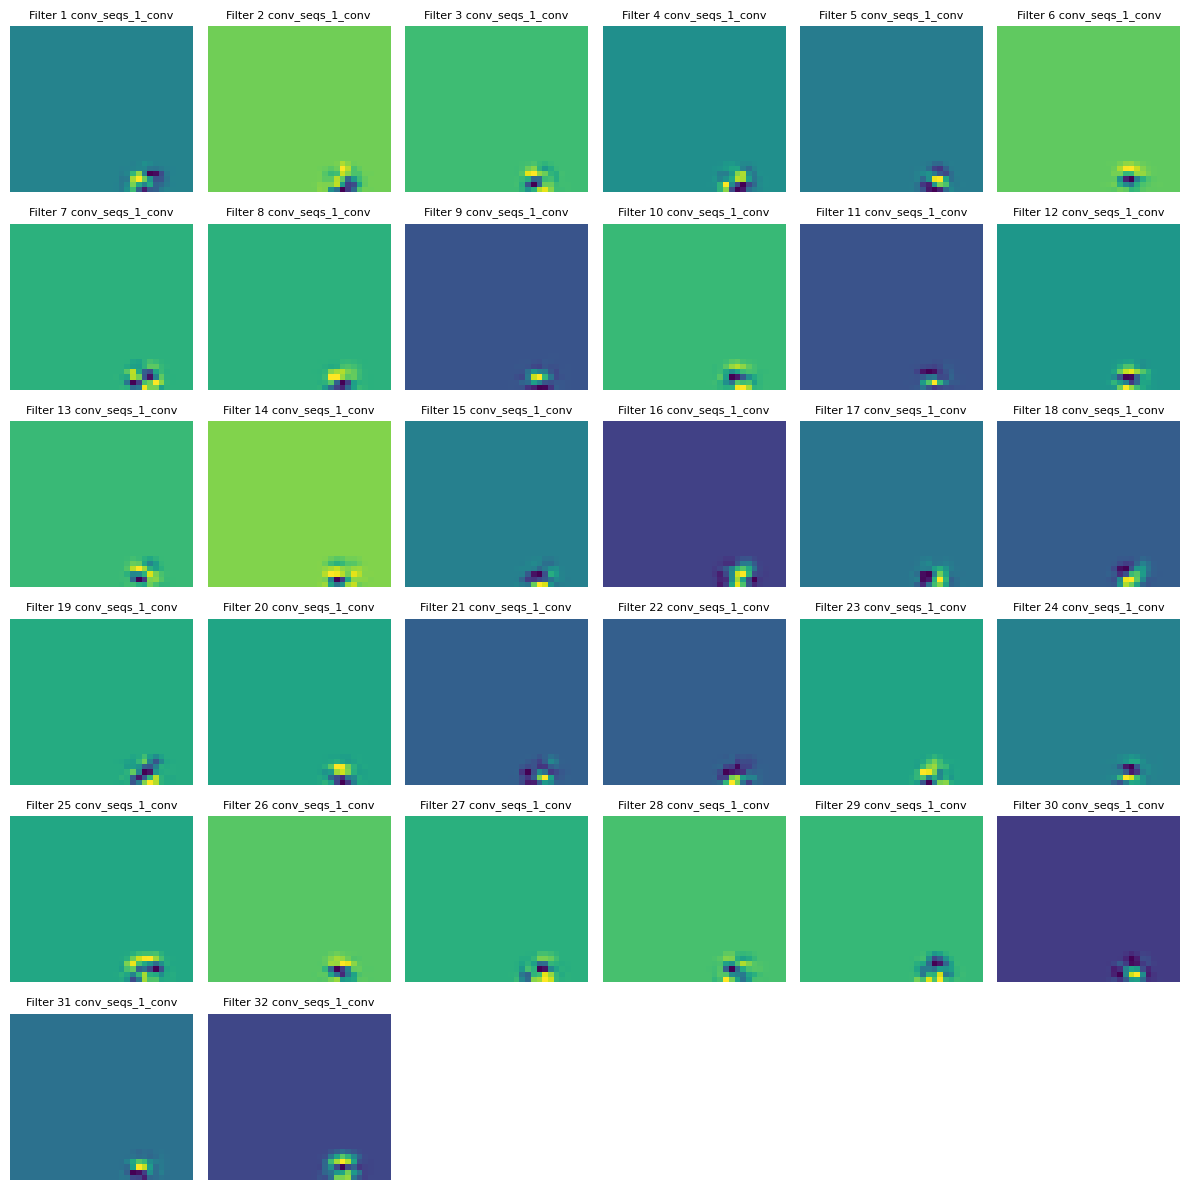

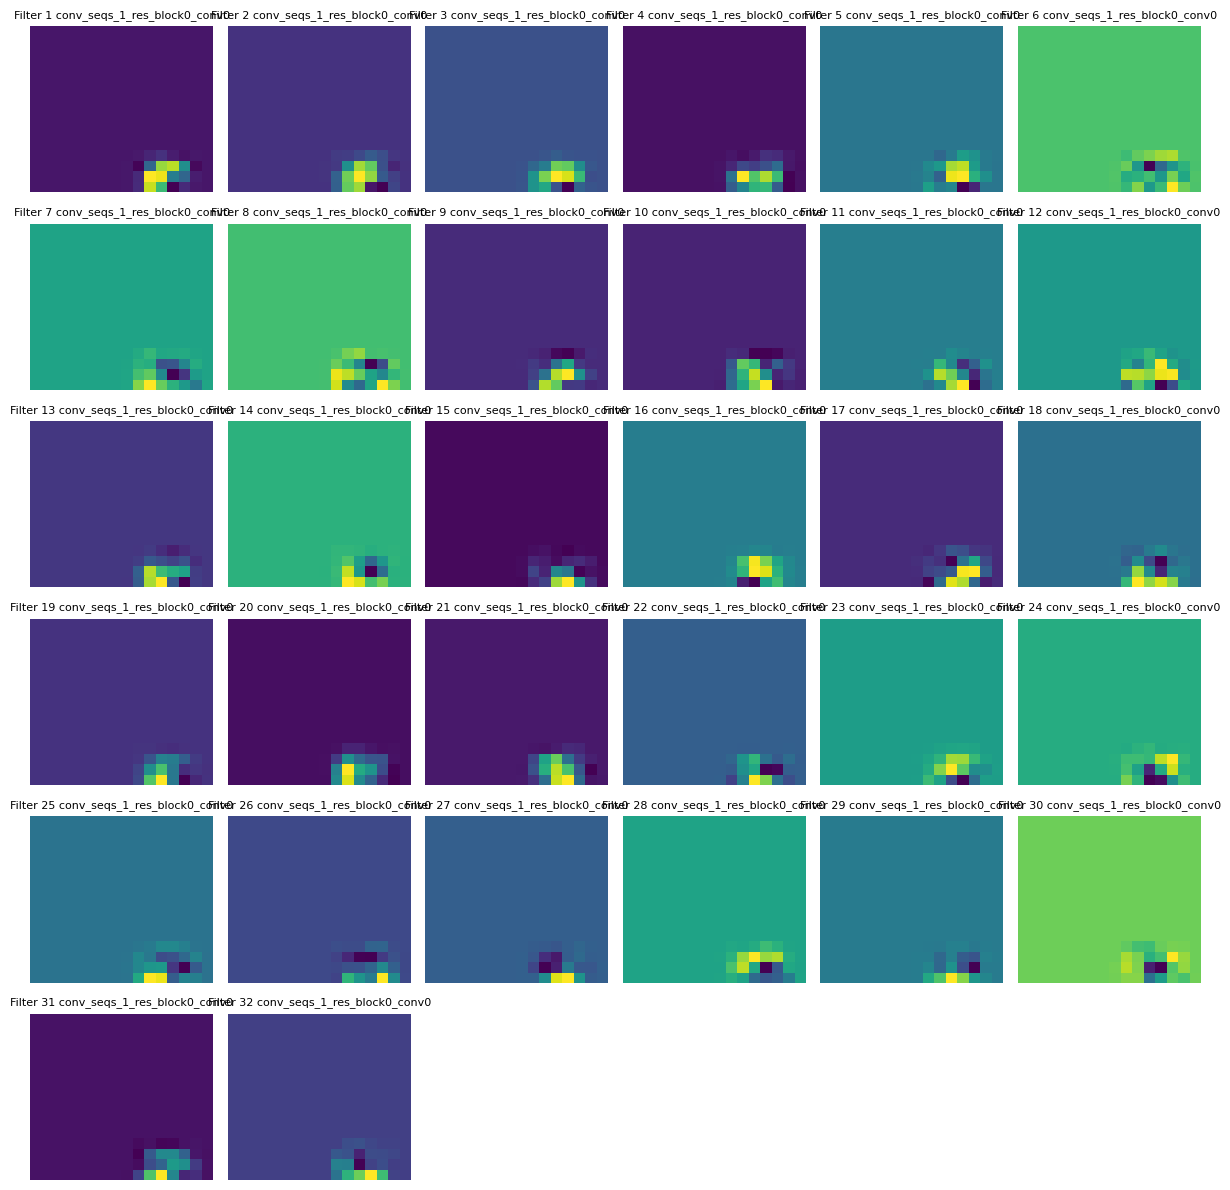

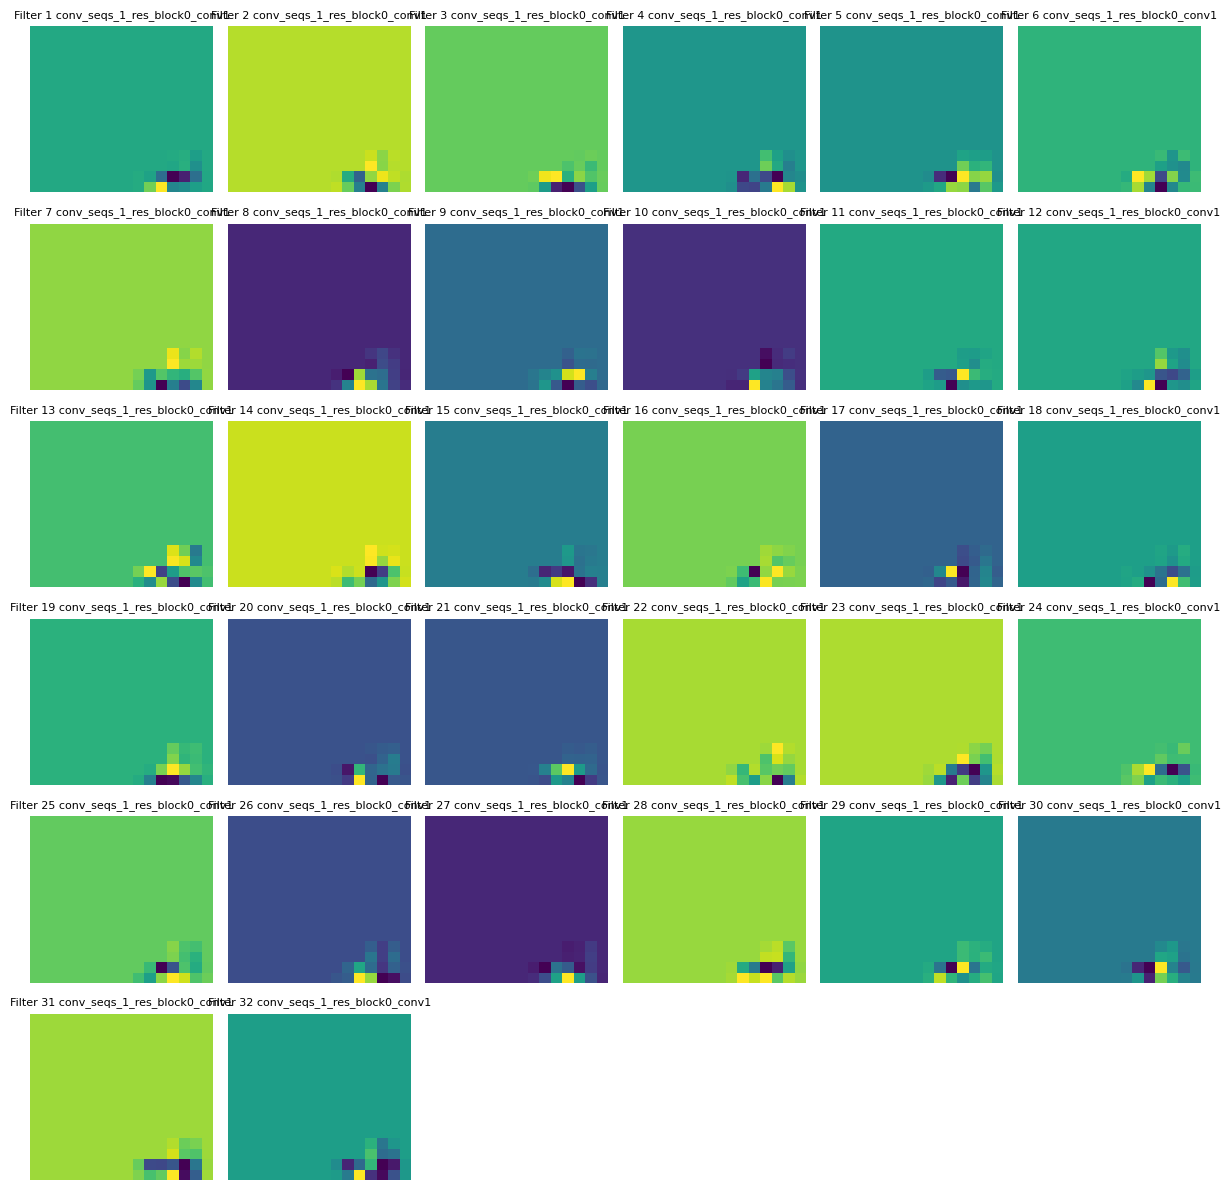

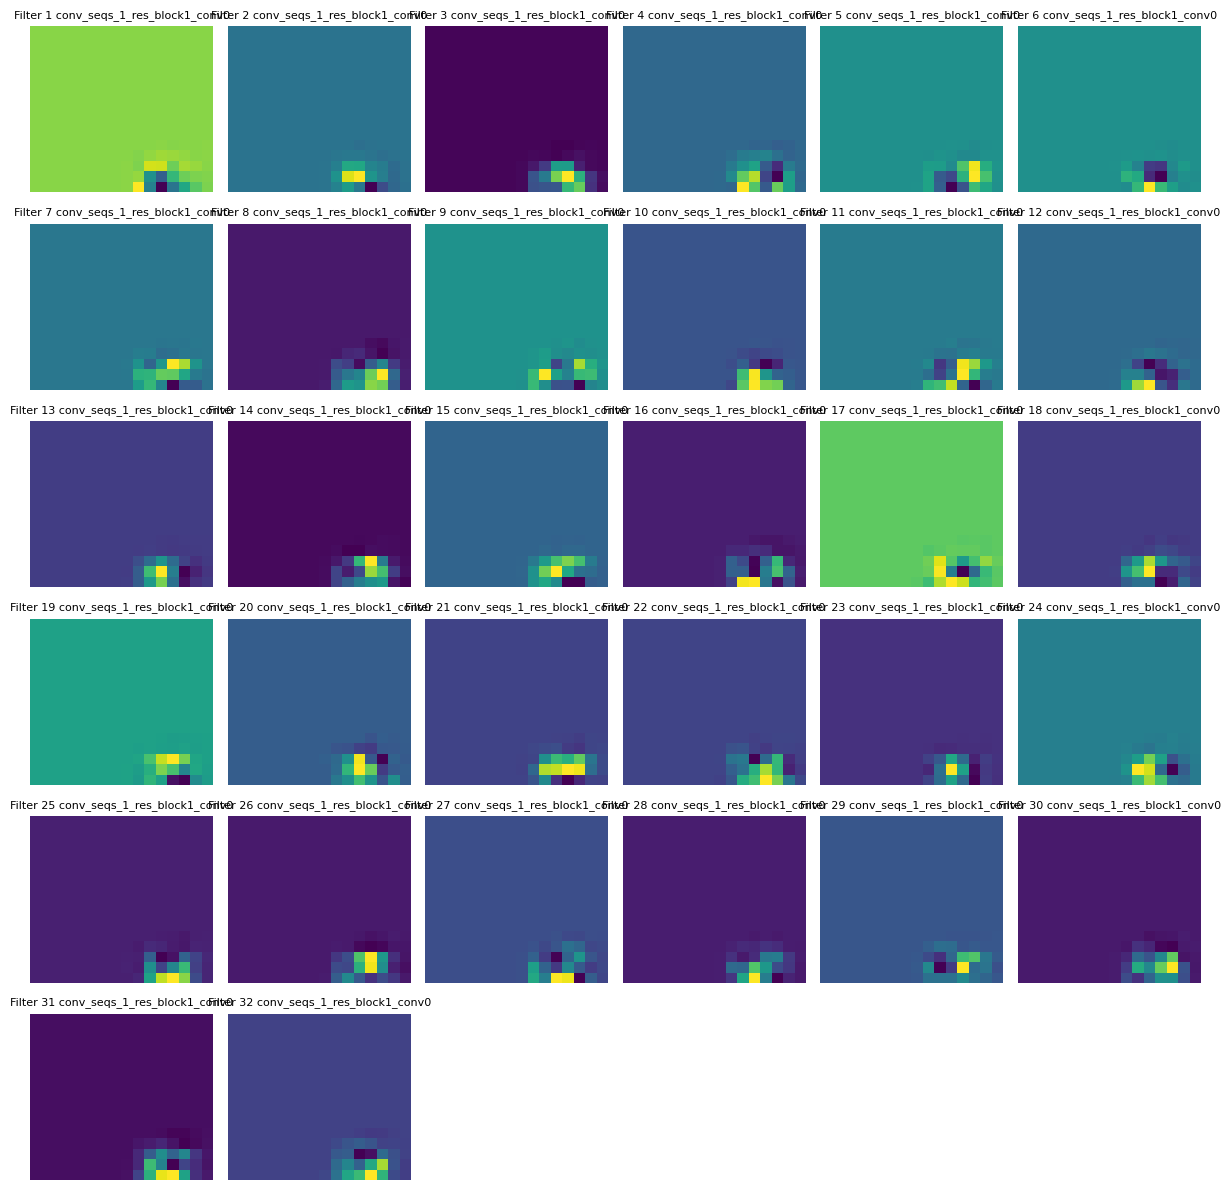

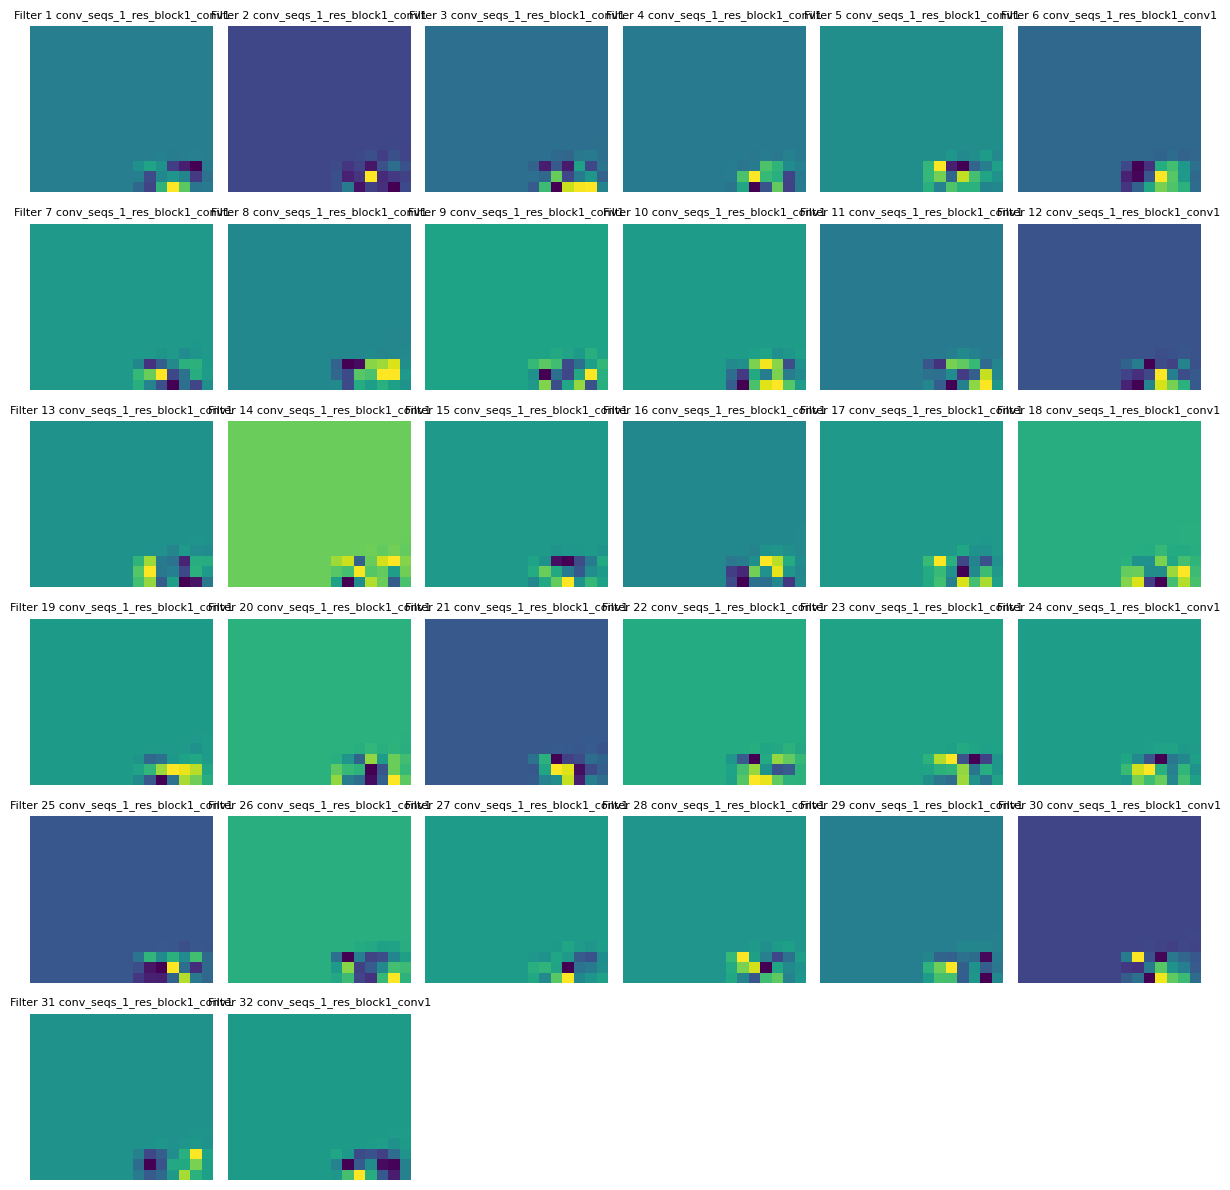

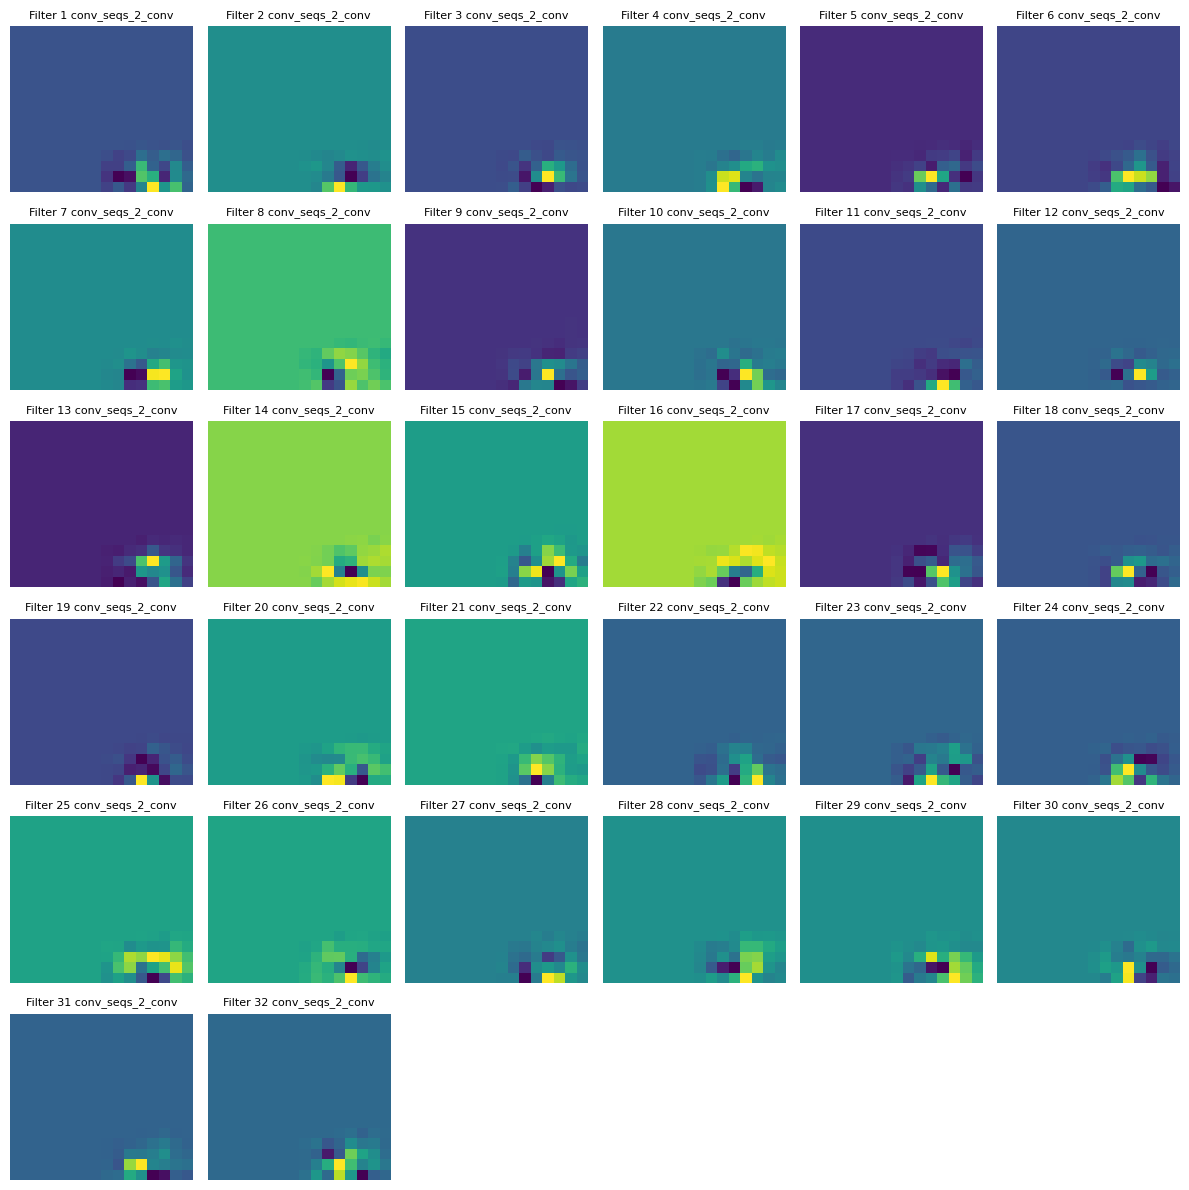

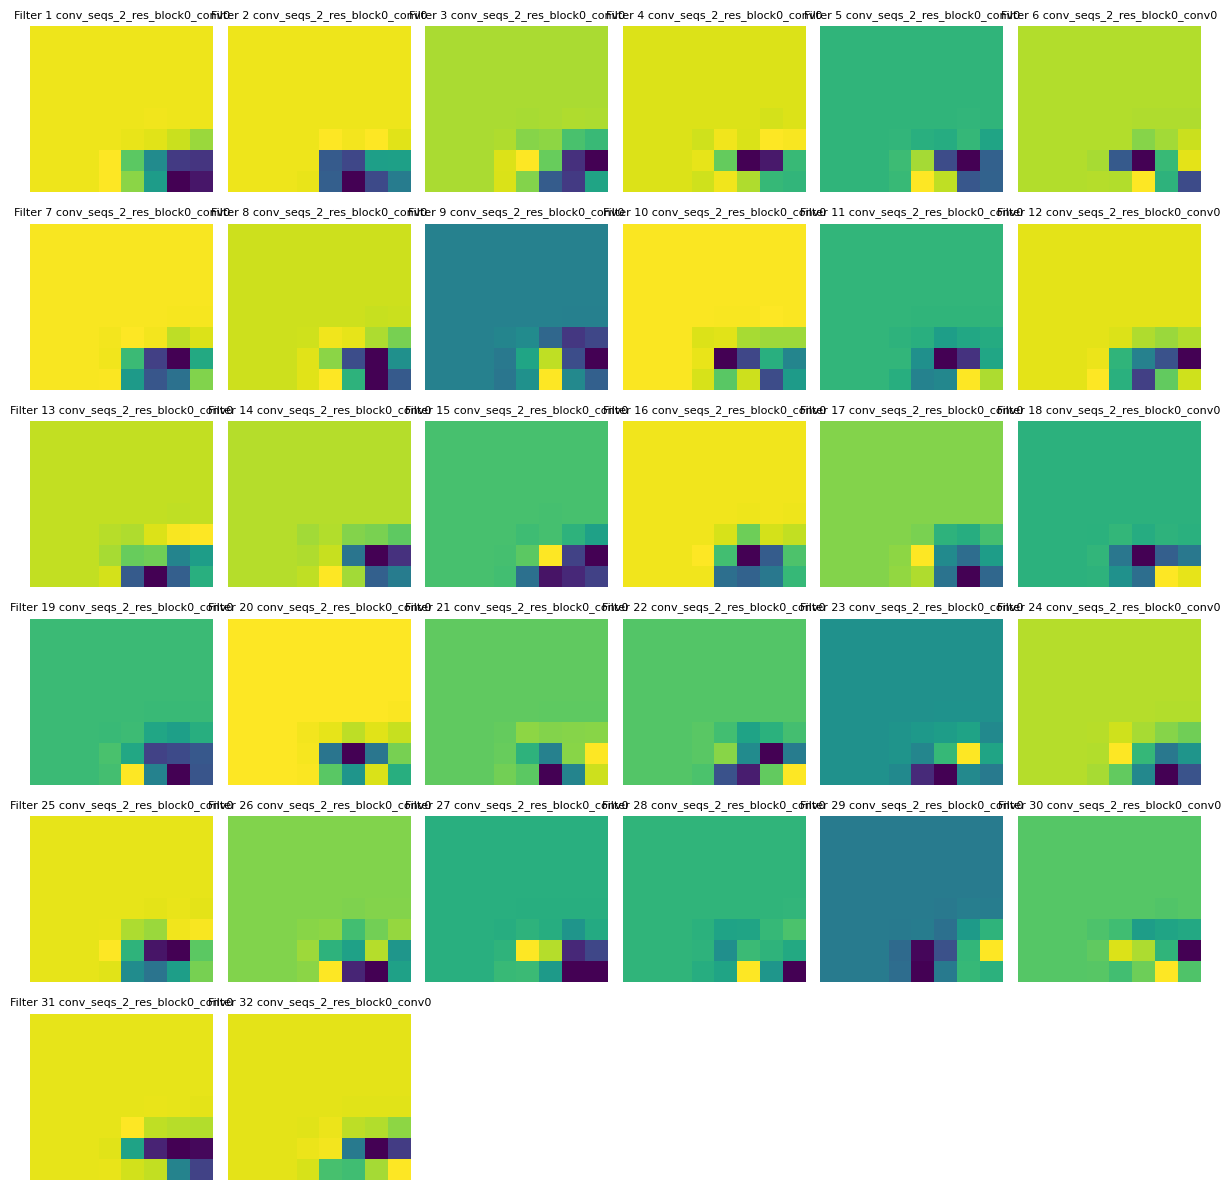

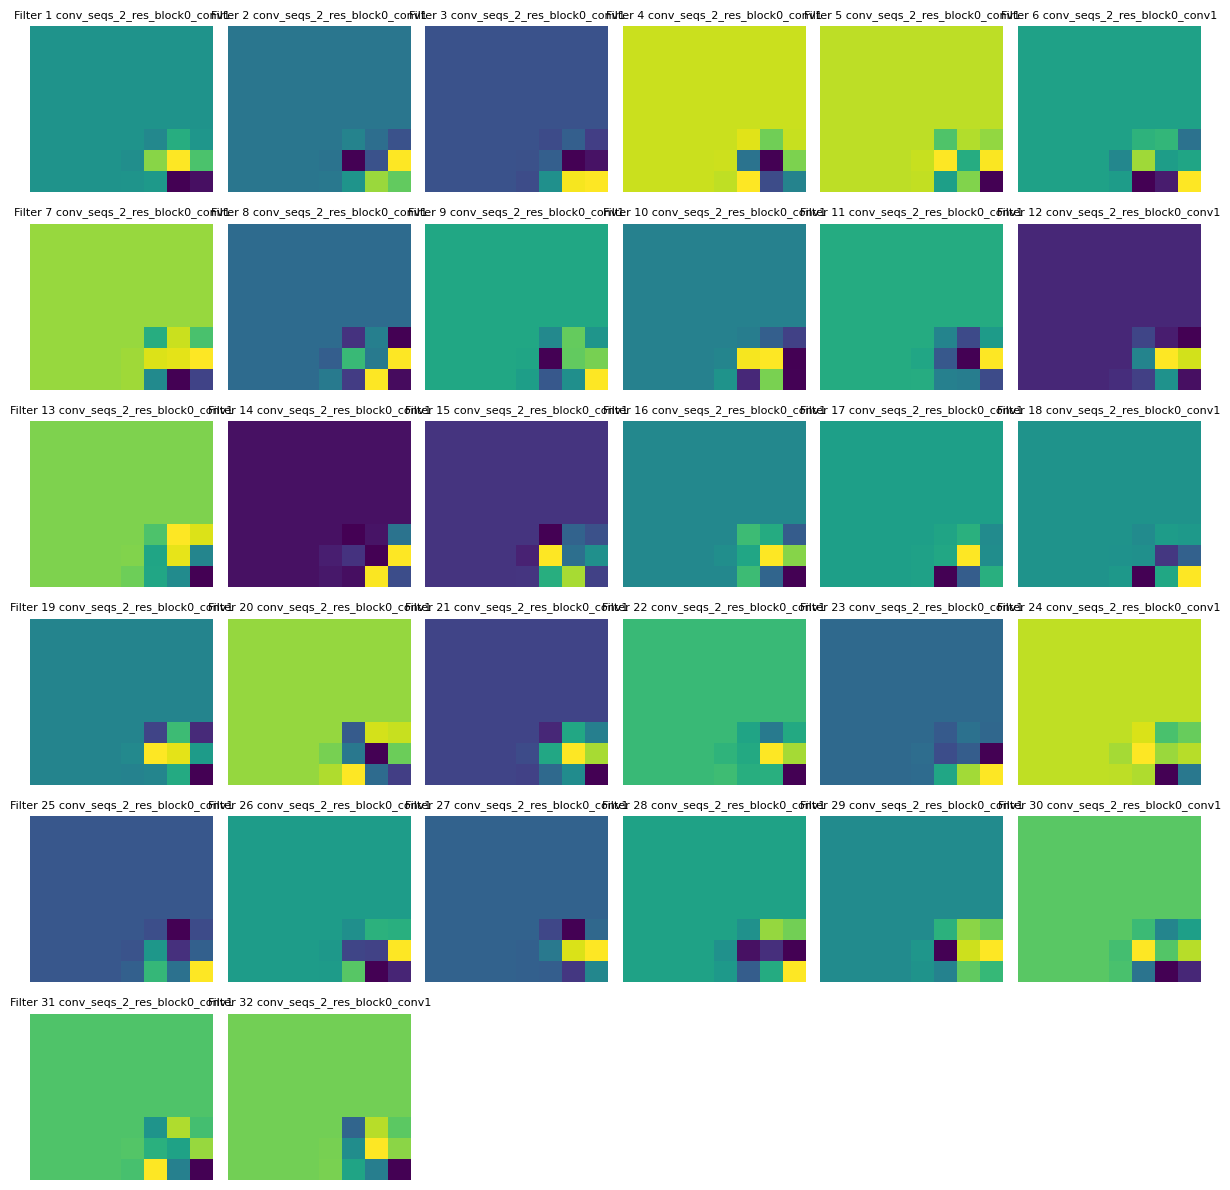

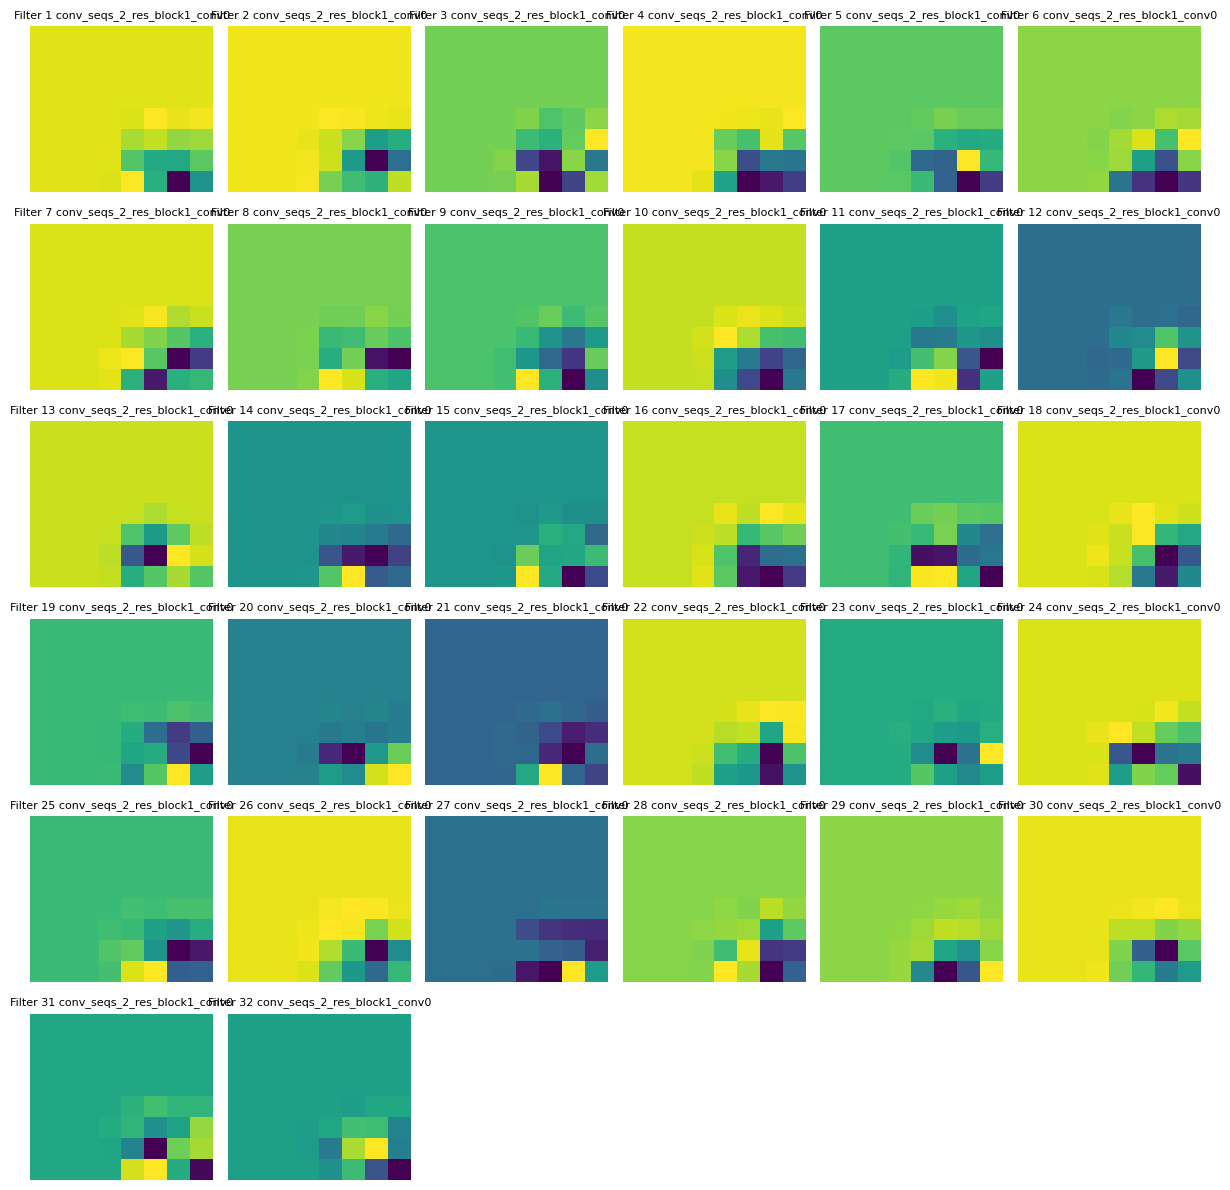

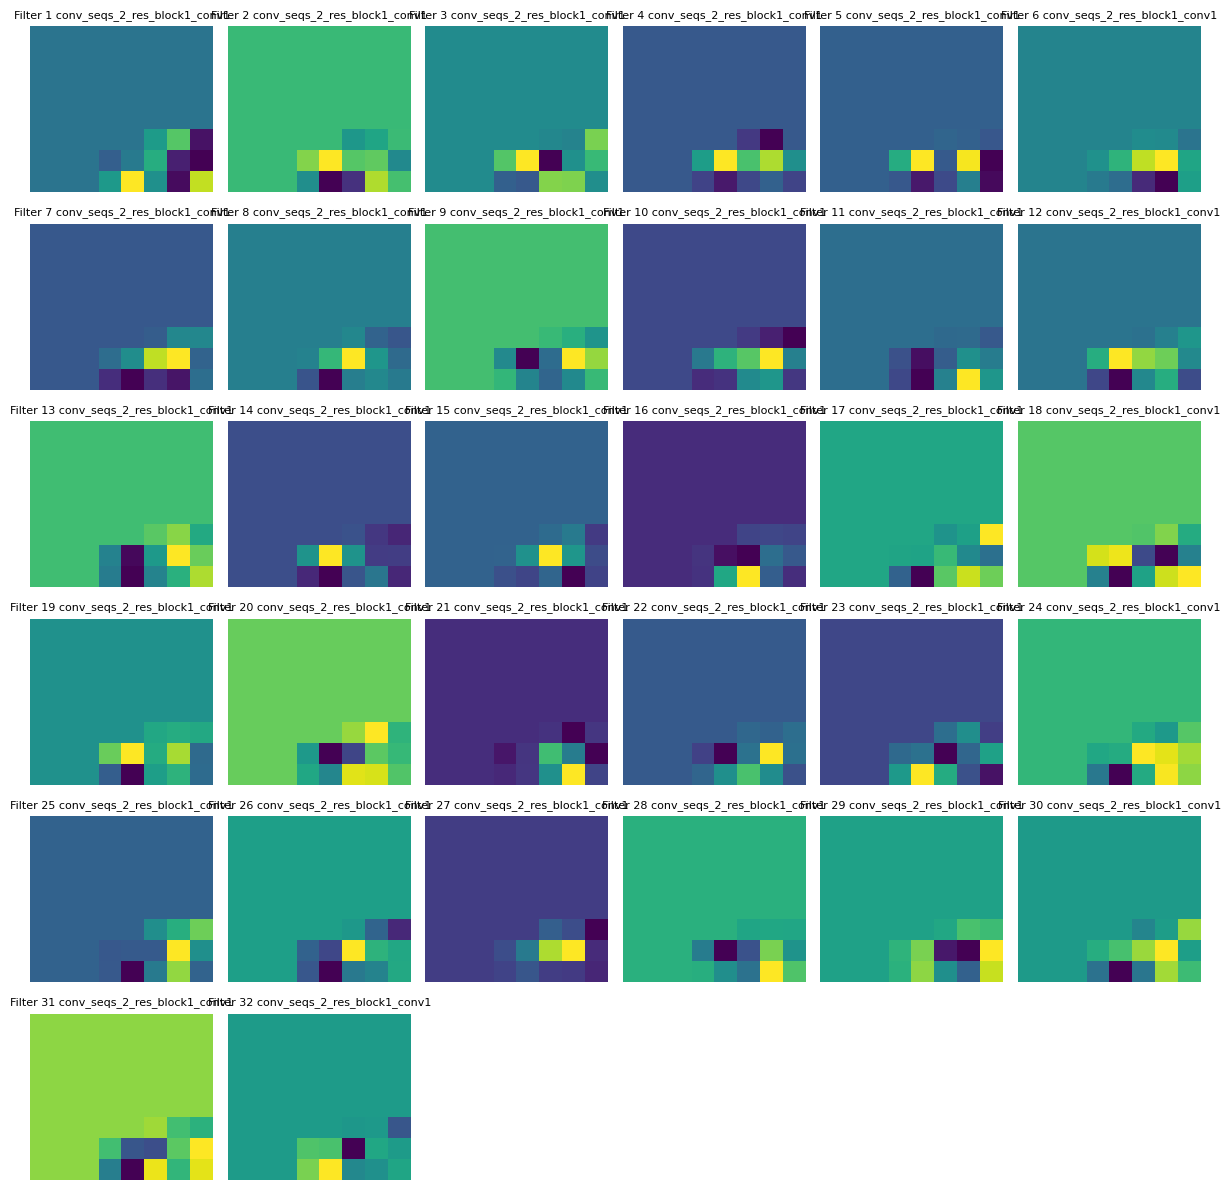

In [ ]:
key_gem_differences = helpers.compute_activation_differences(gem_activations,key_activations)
helpers.plot_activations_for_layers(key_gem_differences, all_layers)


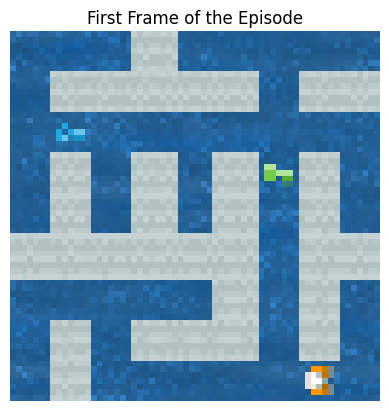

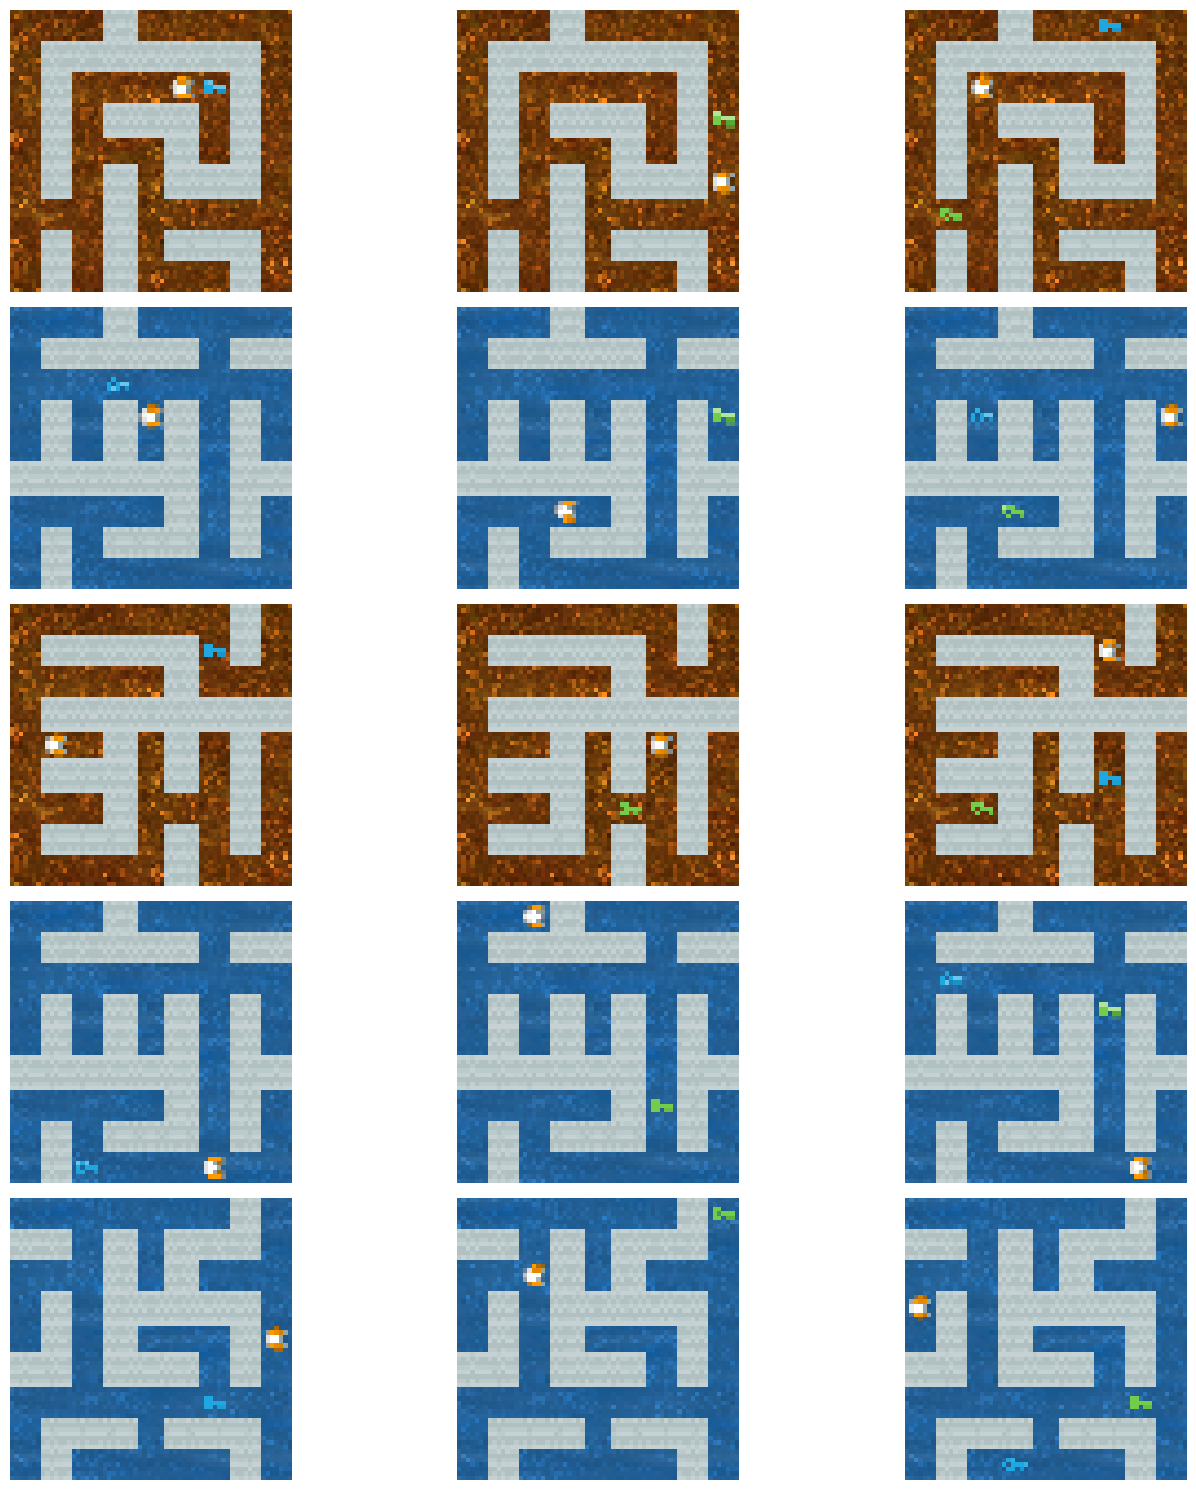

In [ ]:
num_samples = 5
num_levels = 100
key_color_combinations = [['blue'], ['green'], ['blue', 'green']]
observations_list = heist.create_key_states(key_color_combinations, num_samples, num_levels)


plt.imshow(observations_list[3][2].transpose(1, 2, 0))
plt.title("First Frame of the Episode")
plt.axis('off')
plt.show()



import itertools
fig, axs = plt.subplots(5, 3, figsize=(15, 15))  # Adjusted to create a 5x3 grid
for (i, j), obs in zip(itertools.product(range(5), range(3)), itertools.chain.from_iterable(observations_list)):
    axs[i, j].imshow(obs.transpose(1, 2, 0))
    # axs[i, j].set_title(f"Sample {j+1}, Obs {i+1}")
    axs[i, j].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
obs_list = heist.create_gem_states(5)

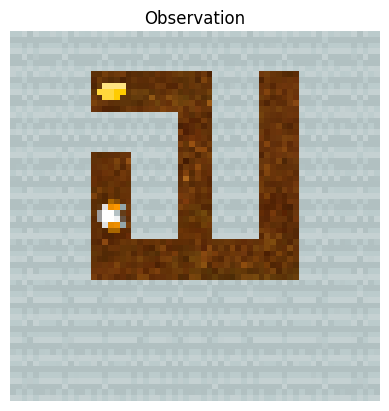

In [ ]:
helpers.plot_single_observation(obs_list[2].transpose(1, 2, 0))

# Train Linear probe

In [2]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import src.probing as probing


In [3]:
categories  = {
        "gem": [],
        "blue_key": [],
        "green_key": [],
        "red_key": [],
        "blue_lock": [],
        "green_lock": [],
        "red_lock": []
    }

# Create classified dataset
classified_dataset = heist.create_classified_dataset(num_samples_per_category=900, num_levels=0)

# Load the model
model = helpers.load_model(model_path="../model_9501.0.pt")

layer_names = helpers.get_model_layer_names(model)
# Create activation dataset
activation_dataset = helpers.create_activation_dataset(classified_dataset, model, layer_names, categories)



[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [4]:
category_results= probing.linear_probe_multiclass(activation_dataset, "hidden_fc")
print(category_results["test_accuracy"])
print(category_results["classification_report"])

0.7253968253968254
              precision    recall  f1-score   support

         gem       0.89      0.93      0.91       191
    blue_key       0.89      0.88      0.88       187
   green_key       0.68      0.61      0.64       190
     red_key       0.67      0.65      0.66       184
   blue_lock       0.71      0.65      0.68       166
  green_lock       0.56      0.58      0.57       173
    red_lock       0.66      0.77      0.71       169

    accuracy                           0.73      1260
   macro avg       0.72      0.72      0.72      1260
weighted avg       0.73      0.73      0.72      1260



/Users/bensturgeon/Library/Caches/pypoetry/virtualenvs/ai-safety-camp-Y8XZewIj-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


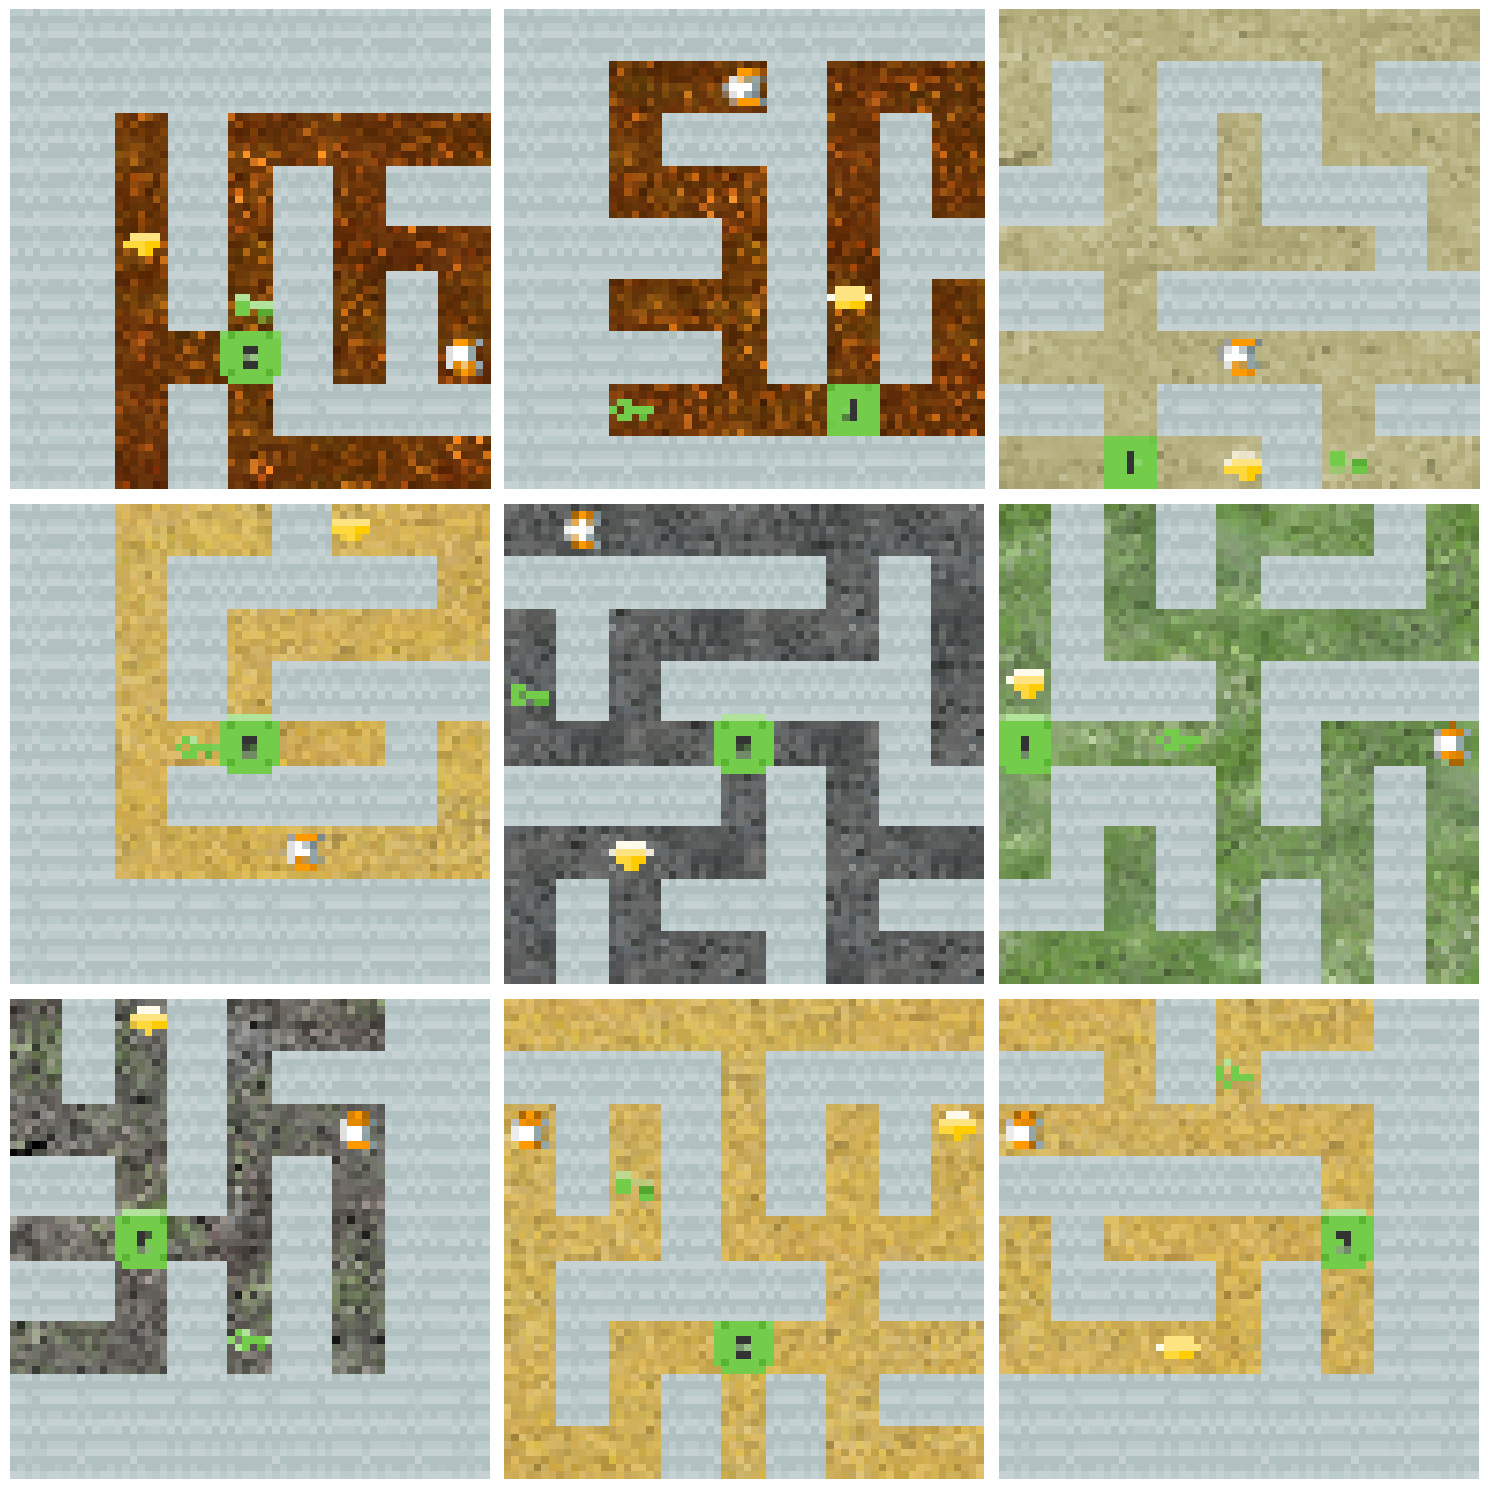

In [12]:
import matplotlib.pyplot as plt
import itertools

# Assuming 'dataset' is your data structure and it contains at least 15 images under the "blue_key" key
images = classified_dataset["green_key"]  # Access the list of images
n_samples = 9  # Number of samples to display

# Create a figure with subplots in a 5x3 grid
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Iterate over the first 15 images (ensuring there are at least 15)
for idx, img in enumerate(images[10:19]):
    i, j = divmod(idx, 3)  # Calculate subplot grid indices
    axs[i, j].imshow(img)  # Display the image on the corresponding subplot
    axs[i, j].axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot


In [299]:
results_dataframe = probing.linear_probe_per_category_using_probes(activation_dataset, 'hidden_fc', model_type='classifier', test_size=0.2, random_state=42)
results_dataframe["test_accuracy"]

/Users/bensturgeon/Library/Caches/pypoetry/virtualenvs/ai-safety-camp-Y8XZewIj-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bensturgeon/Library/Caches/pypoetry/virtualenvs/ai-safety-camp-Y8XZewIj-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer 

0    0.973016
1    0.977778
2    0.843651
3    0.870635
4    0.850794
5    0.851587
6    0.923810
Name: test_accuracy, dtype: float64

In [302]:

single_class_category_results, single_class_result= probing.linear_probe_per_category(activation_dataset, "hidden_fc")

/Users/bensturgeon/Library/Caches/pypoetry/virtualenvs/ai-safety-camp-Y8XZewIj-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bensturgeon/Library/Caches/pypoetry/virtualenvs/ai-safety-camp-Y8XZewIj-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer 

In [304]:
# Example usage
# activation_dataset and layer_path need to be defined as per your specific setup
results_dataframe = probing.linear_probe_per_category_using_probes(activation_dataset, 'hidden_fc', model_type='classifier', test_size=0.2, random_state=42)



/Users/bensturgeon/Library/Caches/pypoetry/virtualenvs/ai-safety-camp-Y8XZewIj-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bensturgeon/Library/Caches/pypoetry/virtualenvs/ai-safety-camp-Y8XZewIj-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer 

In [329]:
from sklearn.metrics import accuracy_score, classification_report



category_results= probing.linear_probe_multiclass(activation_dataset, "hidden_fc")
print(category_results["test_accuracy"])
print(category_results["classification_report"])
category_results["conf_matrix"]

/Users/bensturgeon/Library/Caches/pypoetry/virtualenvs/ai-safety-camp-Y8XZewIj-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7182539682539683
              precision    recall  f1-score   support

         gem       0.92      0.94      0.93       189
    blue_key       0.93      0.89      0.91       190
   green_key       0.64      0.63      0.64       181
     red_key       0.57      0.58      0.57       177
   blue_lock       0.68      0.67      0.67       156
  green_lock       0.52      0.52      0.52       172
    red_lock       0.73      0.76      0.74       195

    accuracy                           0.72      1260
   macro avg       0.71      0.71      0.71      1260
weighted avg       0.72      0.72      0.72      1260



array([[136,   0,   0,   0,  10,   0,   0],
       [  6, 141,   6,   0,   4,   0,   0],
       [  0,  11, 112,  22,  14,   7,   1],
       [  0,   0,  19,  91,   0,  16,  19],
       [ 10,   9,   8,   0,  98,  13,   1],
       [  0,   0,   5,  17,   5,  76,  24],
       [  0,   0,   0,  10,   0,  18,  99]])

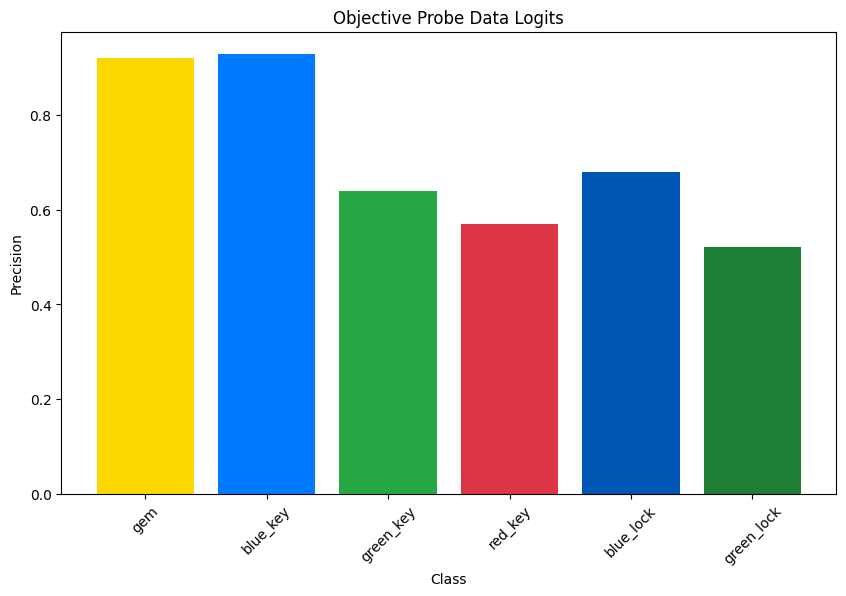

In [330]:


# Your data
new_classification_data = category_results["classification_report"]


# Parsing the new data
class_precision_dict = plotting.convert_report_to_dict(new_classification_data)



plotting.plot_objective_probe_data(class_precision_dict)

In [325]:
category_results["classification_report"]

'              precision    recall  f1-score   support\n\n         gem       0.90      0.91      0.91       174\n    blue_key       0.92      0.85      0.88       189\n   green_key       0.68      0.59      0.63       182\n     red_key       0.61      0.63      0.62       164\n   blue_lock       0.65      0.69      0.67       186\n  green_lock       0.62      0.66      0.64       179\n    red_lock       0.75      0.77      0.76       186\n\n    accuracy                           0.73      1260\n   macro avg       0.73      0.73      0.73      1260\nweighted avg       0.73      0.73      0.73      1260\n'

In [321]:
class_precision_dict

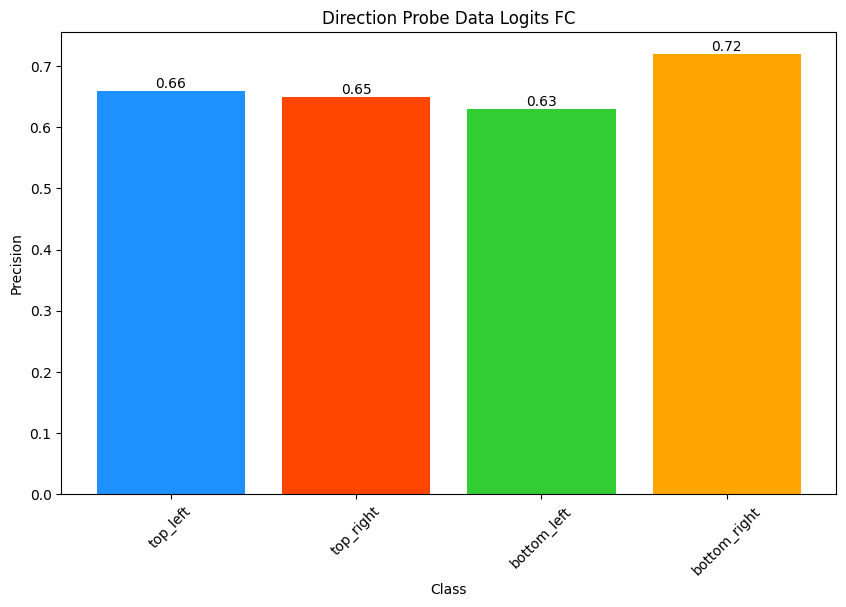

In [128]:

new_classification_data = """
          precision    recall  f1-score   support
    top_left       0.66      0.59      0.62       193
   top_right       0.65      0.77      0.70       179
 bottom_left       0.63      0.65      0.64       170
bottom_right       0.72      0.65      0.68       178
"""

# Parsing the new data
new_lines = new_classification_data.strip().split('\n')[1:]  # Include all classes
new_class_precision_dict = {}

for line in new_lines:
    parts = line.split(maxsplit=4)  # Ensure splitting is correctly done
    class_name = parts[0]
    precision_value = float(parts[1])
    new_class_precision_dict[class_name] = precision_value

# Update the function for new title and color scheme for direction-related classes
def plot_direction_probe_data(class_precision_dict):
    # Colors for direction-related classes
    direction_colors = {
        'top_left': '#1e90ff',  # Dodger blue
        'top_right': '#ff4500',  # Orange red
        'bottom_left': '#32cd32',  # Lime green
        'bottom_right': '#ffa500'  # Orange
    }

    # Plotting with specific colors
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(class_precision_dict.keys(), class_precision_dict.values(), color=[direction_colors.get(x, 'gray') for x in class_precision_dict.keys()])

    ax.set_xlabel('Class')
    ax.set_ylabel('Precision')
    ax.set_title('Direction Probe Data Logits FC')
    plt.xticks(rotation=45)  # Rotate class labels for better visibility

    # Adding the precision values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')  # Align center horizontally

    plt.show()

# Plotting the new data
plot_direction_probe_data(new_class_precision_dict)


In [ ]:
X = torch.cat([torch.stack([act["hidden_fc"][0] for act in activation_dataset[category]])
                   for category in activation_dataset.keys()])
y = torch.cat([torch.full((len(activation_dataset[category]),), i)
                   for i, category in enumerate(activation_dataset.keys())]).long()

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=None
    )
y_pred = category_results["model"].predict(X_test)

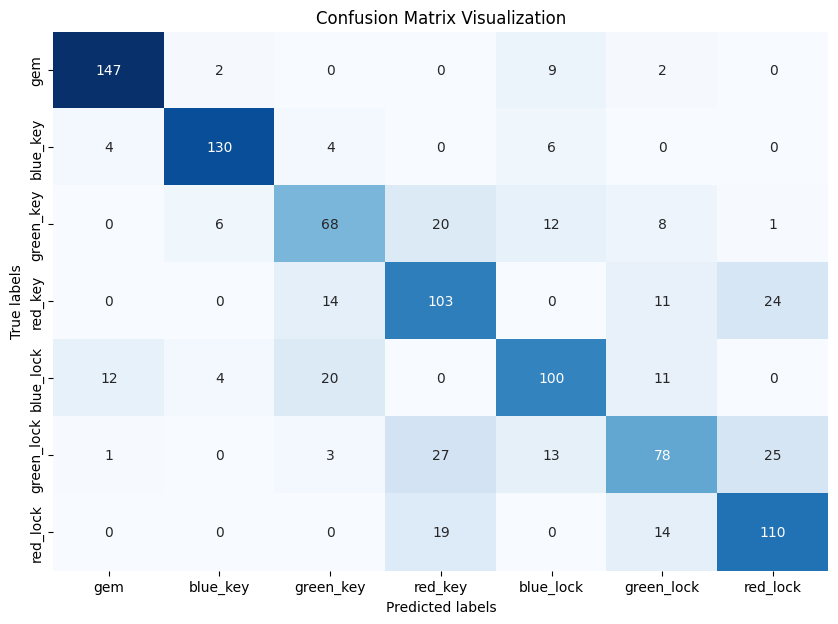

In [306]:
helpers.plot_confusion_matrix(category_results["conf_matrix"], activation_dataset)

Accuracy: 0.24285714285714285


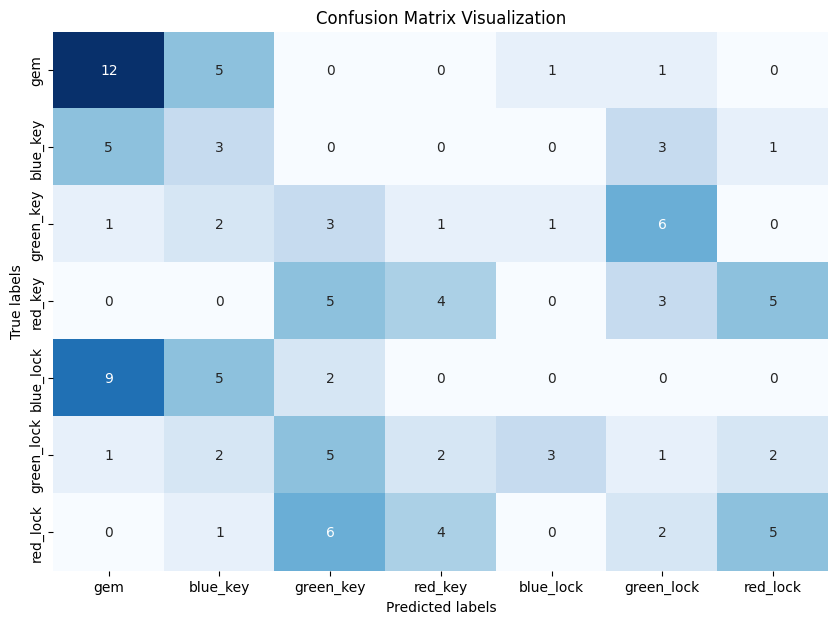

In [115]:
category_results= probing.linear_probe_multiclass(activation_dataset, "logits_fc")
print("Accuracy:", category_results["test_accuracy"])
helpers.plot_confusion_matrix(category_results["conf_matrix"], activation_dataset)

In [307]:
print(category_results["classification_report"])

              precision    recall  f1-score   support

         gem       0.90      0.91      0.91       174
    blue_key       0.92      0.85      0.88       189
   green_key       0.68      0.59      0.63       182
     red_key       0.61      0.63      0.62       164
   blue_lock       0.65      0.69      0.67       186
  green_lock       0.62      0.66      0.64       179
    red_lock       0.75      0.77      0.76       186

    accuracy                           0.73      1260
   macro avg       0.73      0.73      0.73      1260
weighted avg       0.73      0.73      0.73      1260



# Creating a directional dataset

We want to figure out if the logits_fc layer is involved with navigation, how much the hidden_fc layer plays a role in navigation, and if we can separate out the neurons involved with navigation in the hidden_fc layer. If we can determine this last thing then we can potentially control the movement of our player by manipulating the activations of the network.

To begin exploring this we need a dataset that can allow us to isolate these features in the network. Thus the goal is to create categories

In [ ]:
num_levels = 5
venv = heist.create_venv(num=1, start_level=random.randint(1000, 10000), num_levels=num_levels)
state = heist.state_from_venv(venv, 0)

full_grid = state.full_grid(with_mouse=False)
entities = state.state_vals["ents"]
legal_mouse_positions = heist.get_legal_mouse_positions(full_grid, entities)

unchanged_obs= venv.reset()


state.remove_all_entities()


state =  heist.set_mouse_to_center(state)

state_bytes = state.state_bytes
if state_bytes is not None:
    venv.env.callmethod("set_state", [state_bytes])
    obs = venv.reset()



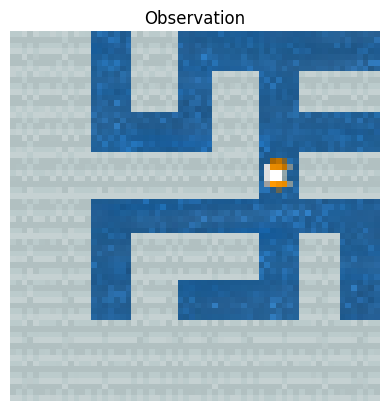

In [ ]:
helpers.plot_single_observation(helpers.observation_to_rgb(obs))

In [116]:
dataset = heist.create_direction_dataset()

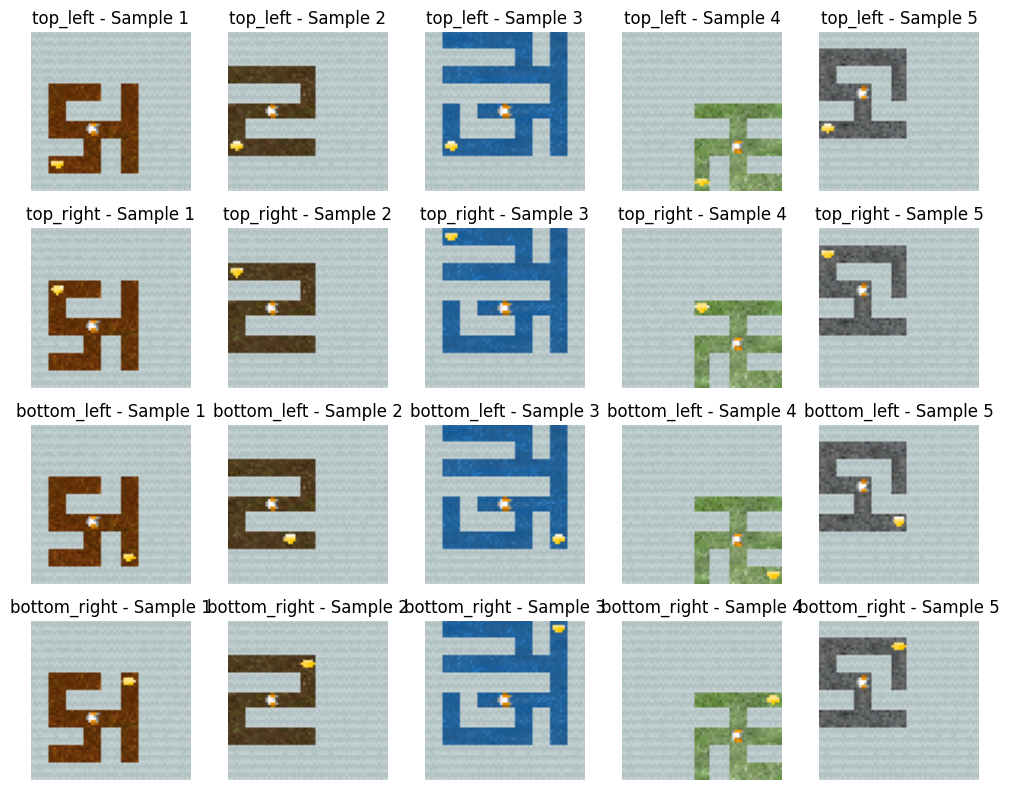

In [ ]:
import matplotlib.pyplot as plt

def visualize_dataset(dataset, num_samples_per_category=5):
    categories = list(dataset.keys())
    num_categories = len(categories)

    fig, axes = plt.subplots(num_categories, num_samples_per_category, figsize=(num_samples_per_category * 2, num_categories * 2))

    for i, category in enumerate(categories):
        samples = dataset[category]
        for j, sample in enumerate(samples):
            ax = axes[i, j] if num_categories > 1 else axes[j]
            ax.imshow(sample)
            ax.set_title(f"{category} - Sample {j+1}")
            ax.axis("off")

    plt.tight_layout()
    plt.show()

visualize_dataset(dataset)

In [119]:
dataset = heist.create_direction_dataset(900)


In [120]:
def create_direction_activation_dataset(dataset, model, layer_paths):
    activation_dataset = {
        "top_left": [],
        "top_right": [],
        "bottom_left": [],
        "bottom_right": []
    }

    for category in dataset:
        for obs in dataset[category]:
            obs_rgb = helpers.observation_to_rgb(obs)
            model_activations = helpers.ModelActivations(model)
            _, activations = model_activations.run_with_cache(obs_rgb, layer_paths)
            model_activations.clear_hooks()


            activation_dataset[category].append(activations)

    return activation_dataset


In [121]:
model = helpers.load_model()
layer_names = helpers.get_model_layer_names(model)

direction_activation_dataset = create_direction_activation_dataset(dataset, model, layer_names)

In [ ]:
direction_activation_dataset.keys()

dict_keys(['top_left', 'top_right', 'bottom_left', 'bottom_right'])

              precision    recall  f1-score   support

    top_left       0.66      0.59      0.62       193
   top_right       0.65      0.77      0.70       179
 bottom_left       0.63      0.65      0.64       170
bottom_right       0.72      0.65      0.68       178

    accuracy                           0.66       720
   macro avg       0.66      0.66      0.66       720
weighted avg       0.66      0.66      0.66       720



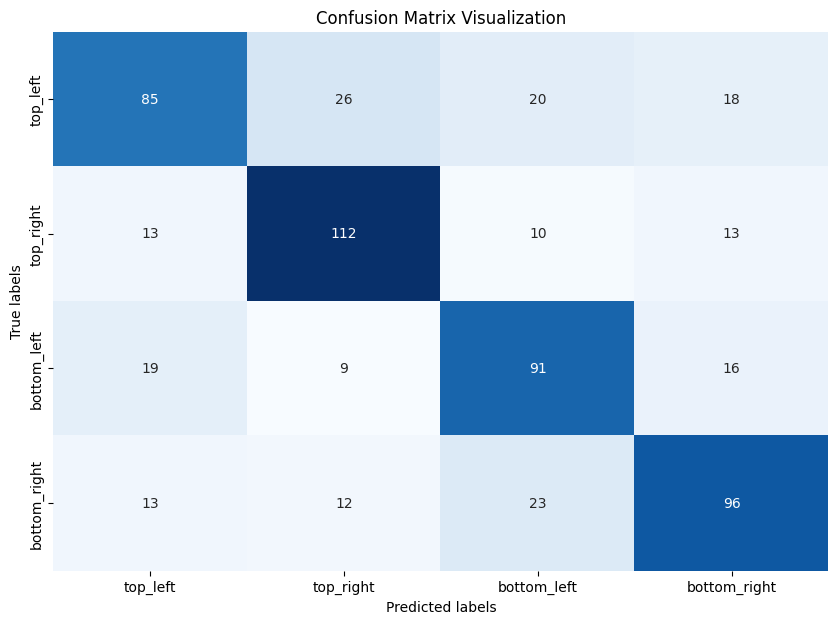

In [125]:
category_results= probing.linear_probe_multiclass(direction_activation_dataset, "logits_fc")
print(category_results["classification_report"])
helpers.plot_confusion_matrix(category_results["conf_matrix"], direction_activation_dataset)

In [ ]:
print(category_results["test_accuracy"])


0.9125


0.6375
              precision    recall  f1-score   support

    top_left       0.73      0.70      0.71        23
   top_right       0.70      0.70      0.70        20
 bottom_left       0.48      0.65      0.55        17
bottom_right       0.67      0.50      0.57        20

    accuracy                           0.64        80
   macro avg       0.64      0.64      0.63        80
weighted avg       0.65      0.64      0.64        80



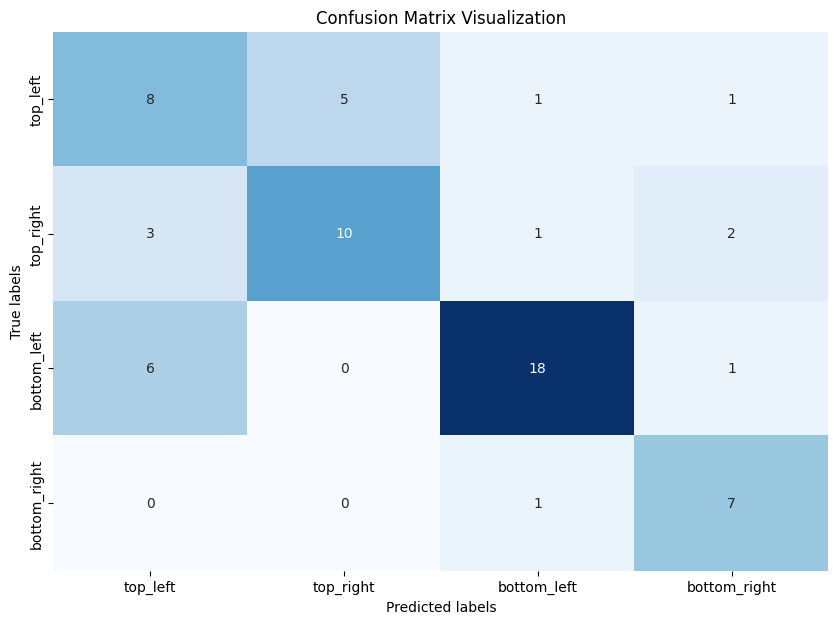

In [ ]:
category_results= linear_probe_multiclass(direction_activation_dataset, "logits_fc")
print(category_results["test_accuracy"])
print(category_results["classification_report"])
helpers.plot_confusion_matrix(category_results["conf_matrix"], direction_activation_dataset)

## Probing convolution layers for objectives

In [311]:
layer_names = helpers.get_model_layer_names(model)
layer_names

['conv_seqs',
 'conv_seqs.0',
 'conv_seqs.0.conv',
 'conv_seqs.0.max_pool2d',
 'conv_seqs.0.res_block0',
 'conv_seqs.0.res_block0.conv0',
 'conv_seqs.0.res_block0.conv1',
 'conv_seqs.0.res_block1',
 'conv_seqs.0.res_block1.conv0',
 'conv_seqs.0.res_block1.conv1',
 'conv_seqs.1',
 'conv_seqs.1.conv',
 'conv_seqs.1.max_pool2d',
 'conv_seqs.1.res_block0',
 'conv_seqs.1.res_block0.conv0',
 'conv_seqs.1.res_block0.conv1',
 'conv_seqs.1.res_block1',
 'conv_seqs.1.res_block1.conv0',
 'conv_seqs.1.res_block1.conv1',
 'conv_seqs.2',
 'conv_seqs.2.conv',
 'conv_seqs.2.max_pool2d',
 'conv_seqs.2.res_block0',
 'conv_seqs.2.res_block0.conv0',
 'conv_seqs.2.res_block0.conv1',
 'conv_seqs.2.res_block1',
 'conv_seqs.2.res_block1.conv0',
 'conv_seqs.2.res_block1.conv1',
 'hidden_fc',
 'logits_fc',
 'value_fc']

In [312]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

def linear_probe_per_filter_using_probes(
    activation_dataset,
    layer_path,
    model_type="classifier",
    test_size=0.2,
    random_state=None,
    **regression_kwargs,
):
    results = []  # List to store data pairs
    filter_names = []  # List to store filter names for labeling purposes

    def linear_probes(xys, model_type, test_size, random_state, **kwargs):
        local_results = []
        for (X, y) in xys:
            X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=test_size, random_state=random_state)
            if model_type == "classifier":
                model = LogisticRegression(**kwargs)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)
            local_results.append((accuracy, report))
        return local_results

    for category in activation_dataset.keys():
        for filter_index in range(activation_dataset[category][0][layer_path][0].size(0)):
            # Extracting activations for each filter
            X_category = torch.stack([act[layer_path][0][filter_index].flatten() for act in activation_dataset[category]])
            y_category = torch.ones(len(activation_dataset[category])).long()

            X_rest = torch.cat([torch.stack([act[layer_path][0][filter_index].flatten() for act in activation_dataset[cat]])
                                for cat in activation_dataset.keys() if cat != category])
            y_rest = torch.zeros(len(X_rest)).long()

            X = torch.cat([X_category, X_rest])
            y = torch.cat([y_category, y_rest])

            filter_names.append(f"{category}_filter_{filter_index}")
            results.append((X, y))

    probing_results = linear_probes(results, model_type=model_type, test_size=test_size, random_state=random_state, **regression_kwargs)

    results_df = pd.DataFrame({
        'filter': filter_names,
        'test_accuracy': [result[0] for result in probing_results],
        'classification_report': [result[1] for result in probing_results]
    })

    return results_df

results_dataframe = linear_probe_per_filter_using_probes(activation_dataset, 'conv_seqs.1', model_type='classifier', test_size=0.2, random_state=42)


KeyError: 'conv_seqs.1'

In [310]:
results_dataframe.head(30)

category  test_accuracy  \
0         gem       0.973016   
1    blue_key       0.977778   
2   green_key       0.843651   
3     red_key       0.870635   
4   blue_lock       0.850794   
5  green_lock       0.851587   
6    red_lock       0.923810   

                               classification_report  
0  {'0': {'precision': 0.9858490566037735, 'recal...  
1  {'0': {'precision': 0.9796296296296296, 'recal...  
2  {'0': {'precision': 0.8759757155247181, 'recal...  
3  {'0': {'precision': 0.8983200707338639, 'recal...  
4  {'0': {'precision': 0.875, 'recall': 0.9605263...  
5  {'0': {'precision': 0.8783433994823123, 'recal...  
6  {'0': {'precision': 0.960952380952381, 'recall...

In [1]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

def analyze_filter_performance(activation_dataset, layer_path, model_type="classifier", test_size=0.2, random_state=None):
    results = []
    for category in activation_dataset.keys():
        for filter_index in range(activation_dataset[category][0][layer_path][0].size(0)):
            # Prepare data for this filter across this category
            X_category = torch.stack([act[layer_path][0][filter_index].flatten() for act in activation_dataset[category]])
            y_category = torch.ones(len(activation_dataset[category])).long()

            X_rest = torch.cat([torch.stack([act[layer_path][0][filter_index].flatten() for act in activation_dataset[cat]])
                                for cat in activation_dataset.keys() if cat != category])
            y_rest = torch.zeros(len(X_rest)).long()

            X = torch.cat([X_category, X_rest])
            y = torch.cat([y_category, y_rest])

            # Train and test classifier
            X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=test_size, random_state=random_state)
            model = LogisticRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)

            # Store results
            results.append({
                'category': category,
                'filter_index': filter_index,
                'accuracy': accuracy,
                'precision': report['weighted avg']['precision'],
                'recall': report['weighted avg']['recall'],
                'f1_score': report['weighted avg']['f1-score']
            })

    return pd.DataFrame(results)

# Example usage
results_df = analyze_filter_performance(activation_dataset, 'conv_seqs_2_res_block1_conv0')


/var/folders/58/f16y6j7x0j5d0vv3pvq80c680000gn/T/ipykernel_24056/646121872.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


NameError: name 'activation_dataset' is not defined

In [2]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

def summarize_filter_performance(activation_dataset, layer_path, model_type="classifier", test_size=0.2, random_state=None):
    filter_summary = []
    models = {}
    for filter_index in range(activation_dataset[next(iter(activation_dataset))][0][layer_path][0].size(0)):
        filter_results = []
        filter_models = {}
        for category in activation_dataset.keys():
            # Prepare data for this filter across this category
            X_category = torch.stack([act[layer_path][0][filter_index].flatten() for act in activation_dataset[category]])
            y_category = torch.ones(len(activation_dataset[category])).long()

            X_rest = torch.cat([torch.stack([act[layer_path][0][filter_index].flatten() for act in activation_dataset[cat]])
                                for cat in activation_dataset.keys() if cat != category])
            y_rest = torch.zeros(len(X_rest)).long()

            X = torch.cat([X_category, X_rest])
            y = torch.cat([y_category, y_rest])

            # Train and test classifier
            X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=test_size, random_state=random_state)
            model = LogisticRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)

            # Collect results for this filter and category
            filter_results.append({
                'category': category,
                'accuracy': accuracy,
                'precision': report['weighted avg']['precision'],
                'recall': report['weighted avg']['recall'],
                'f1_score': report['weighted avg']['f1-score']
            })
            filter_models[category] = model
        
        # Analyze results for this filter
        df = pd.DataFrame(filter_results)
        best_performance = df.loc[df['accuracy'].idxmax()]
        worst_performance = df.loc[df['accuracy'].idxmin()]
        performance_range = best_performance['accuracy'] - worst_performance['accuracy']

        # Summarize this filter's results
        filter_summary.append({
            'filter_index': filter_index,
            'best_category': best_performance['category'],
            'best_accuracy': best_performance['accuracy'],
            'worst_category': worst_performance['category'],
            'worst_accuracy': worst_performance['accuracy'],
            'performance_range': performance_range
        })
        models[filter_index] = filter_models

    return models, pd.DataFrame(filter_summary)

# Example usage
models, results_summary = summarize_filter_performance(activation_dataset, 'conv_seqs_2_res_block1_conv0')


/var/folders/58/f16y6j7x0j5d0vv3pvq80c680000gn/T/ipykernel_9723/360120058.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


NameError: name 'activation_dataset' is not defined

In [ ]:
results_summary

filter_index best_category  best_accuracy worst_category  worst_accuracy  \
0              0      blue_key       0.914286     green_lock        0.771429   
1              1      red_lock       0.914286        red_key        0.792857   
2              2       red_key       0.900000     green_lock        0.828571   
3              3           gem       0.885714       red_lock        0.792857   
4              4      blue_key       0.878571        red_key        0.764286   
5              5     green_key       0.871429     green_lock        0.785714   
6              6           gem       0.907143     green_lock        0.807143   
7              7      blue_key       0.900000       red_lock        0.785714   
8              8    green_lock       0.864286       red_lock        0.757143   
9              9      blue_key       0.842857        red_key        0.750000   
10            10      blue_key       0.885714       red_lock        0.800000   
11            11           gem       0.892857        red_key        0.821429   
12            12           gem       0.900000       red_lock        0.792857   
13            13           gem       0.878571      green_key        0.821429   
14            14           gem       0.892857      blue_lock        0.814286   
15            15           gem       0.921429     green_lock        0.807143   
16            16       red_key       0.871429       red_lock        0.807143   
17            17      blue_key       0.885714      blue_lock        0.778571   
18            18     green_key       0.864286     green_lock        0.785714   
19            19           gem       0.857143        red_key        0.807143   
20            20           gem       0.942857     green_lock        0.814286   
21            21           gem       0.892857       red_lock        0.778571   
22            22           gem       0.907143        red_key        0.785714   
23            23           gem       0.900000       red_lock        0.800000   
24            24     blue_lock       0.864286        red_key        0.792857   
25            25    green_lock       0.864286        red_key        0.814286   
26            26      blue_key       0.907143        red_key        0.821429   
27            27           gem       0.900000       red_lock        0.835714   
28            28      blue_key       0.871429      blue_lock        0.800000   
29            29           gem       0.878571       blue_key        0.785714   
30            30           gem       0.864286     green_lock        0.785714   
31            31           gem       0.921429       blue_key        0.814286   

    performance_range  
0            0.142857  
1            0.121429  
2            0.071429  
3            0.092857  
4            0.114286  
5            0.085714  
6            0.100000  
7            0.114286  
8            0.107143  
9            0.092857  
10           0.085714  
11           0.071429  
12           0.107143  
13           0.057143  
14           0.078571  
15           0.114286  
16           0.064286  
17           0.107143  
18           0.078571  
19           0.050000  
20           0.128571  
21           0.114286  
22           0.121429  
23           0.100000  
24           0.071429  
25           0.050000  
26           0.085714  
27           0.064286  
28           0.071429  
29           0.092857  
30           0.078571  
31           0.107143

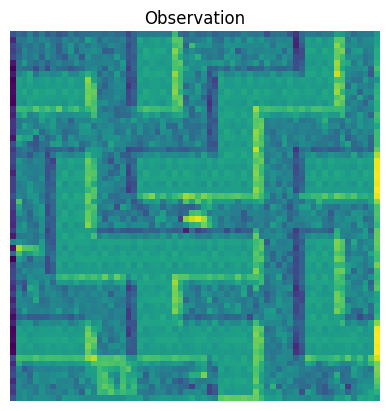

In [ ]:
helpers.plot_single_observation(activation_dataset["red_key"][45]["conv_seqs_2_res_block1_conv0"][0][14])



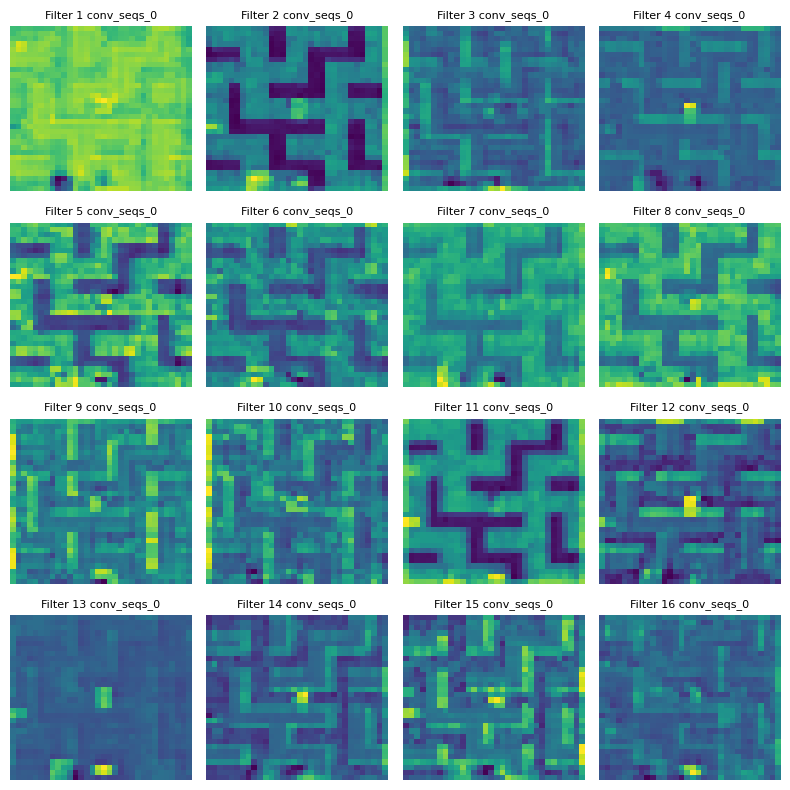

In [ ]:
helpers.plot_activations_for_layers(activations=activation_dataset["red_key"][45], layer_paths=["conv_seqs_0"])

In [ ]:
def predict_sample_category(models, sample_activation, layer_path):
    predictions = {}
    for filter_index, filter_models in models.items():
        filter_activation = sample_activation[layer_path][0][filter_index].flatten()
        for category, model in filter_models.items():
            prediction = model.predict([filter_activation.numpy()])
            predictions[(filter_index, category)] = prediction[0]
    return predictions

# Example usage:
sample_activation = activation_dataset["red_key"][45]
sample_predictions = predict_sample_category(models, sample_activation, 'conv_seqs_2_res_block1_conv0')


In [ ]:
sample_predictions



{(0, 'gem'): 0,
 (0, 'blue_key'): 0,
 (0, 'green_key'): 0,
 (0, 'red_key'): 1,
 (0, 'blue_lock'): 0,
 (0, 'green_lock'): 0,
 (0, 'red_lock'): 1,
 (1, 'gem'): 0,
 (1, 'blue_key'): 0,
 (1, 'green_key'): 0,
 (1, 'red_key'): 0,
 (1, 'blue_lock'): 0,
 (1, 'green_lock'): 0,
 (1, 'red_lock'): 0,
 (2, 'gem'): 0,
 (2, 'blue_key'): 0,
 (2, 'green_key'): 0,
 (2, 'red_key'): 1,
 (2, 'blue_lock'): 0,
 (2, 'green_lock'): 0,
 (2, 'red_lock'): 0,
 (3, 'gem'): 0,
 (3, 'blue_key'): 0,
 (3, 'green_key'): 0,
 (3, 'red_key'): 0,
 (3, 'blue_lock'): 0,
 (3, 'green_lock'): 0,
 (3, 'red_lock'): 0,
 (4, 'gem'): 0,
 (4, 'blue_key'): 0,
 (4, 'green_key'): 0,
 (4, 'red_key'): 0,
 (4, 'blue_lock'): 0,
 (4, 'green_lock'): 0,
 (4, 'red_lock'): 0,
 (5, 'gem'): 0,
 (5, 'blue_key'): 0,
 (5, 'green_key'): 0,
 (5, 'red_key'): 0,
 (5, 'blue_lock'): 0,
 (5, 'green_lock'): 0,
 (5, 'red_lock'): 0,
 (6, 'gem'): 0,
 (6, 'blue_key'): 0,
 (6, 'green_key'): 0,
 (6, 'red_key'): 1,
 (6, 'blue_lock'): 0,
 (6, 'green_lock'): 0,
 (6, '

In [ ]:
def calculate_accuracy(predictions, target_class):
    correct_predictions = 0
    total_predictions = len(predictions)
    
    for (_, category), prediction in predictions.items():
        if category == target_class and prediction == 1:
            correct_predictions += 1
        elif category != target_class and prediction == 0:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

target_class = 'blue_key'
accuracy = calculate_accuracy(sample_predictions, target_class)
print("Accuracy: {:.2f}%".format(accuracy))


Accuracy: 89.73%


# Activation steering with single samples



plan: test if the model continues to try and solve the maze if the gem vector is removed.

In [2]:
from src.utils import heist
import random

ordered_layer_names = {
 0: 'conv_seqs',
 1: 'conv_seqs.0',
 2: 'conv_seqs.0.conv',
 3: 'conv_seqs.0.max_pool2d',
 4: 'conv_seqs.0.res_block0',
 5: 'conv_seqs.0.res_block0.conv0',
 6: 'conv_seqs.0.res_block0.conv1',
 7: 'conv_seqs.0.res_block1',
 8: 'conv_seqs.0.res_block1.conv0',
 9: 'conv_seqs.0.res_block1.conv1',
 10: 'conv_seqs.1',
 11: 'conv_seqs.1.conv',
 12: 'conv_seqs.1.max_pool2d',
 13: 'conv_seqs.1.res_block0',
 14: 'conv_seqs.1.res_block0.conv0',
 15: 'conv_seqs.1.res_block0.conv1',
 16: 'conv_seqs.1.res_block1',
 17: 'conv_seqs.1.res_block1.conv0',
 18: 'conv_seqs.1.res_block1.conv1',
 19: 'conv_seqs.2',
 20: 'conv_seqs.2.conv',
 21: 'conv_seqs.2.max_pool2d',
 22: 'conv_seqs.2.res_block0',
 23: 'conv_seqs.2.res_block0.conv0',
 24: 'conv_seqs.2.res_block0.conv1',
 25: 'conv_seqs.2.res_block1',
 26: 'conv_seqs.2.res_block1.conv0',
 27: 'conv_seqs.2.res_block1.conv1',
 28: 'hidden_fc',
 29: 'logits_fc',
 30: 'value_fc'
}


In [275]:
num_levels = 1
venv = heist.create_venv(num=1,  num_levels=num_levels,start_level=5,)


state = heist.state_from_venv(venv, 0)

full_grid = state.full_grid(with_mouse=False)
entities = state.state_vals["ents"]
legal_mouse_positions = heist.get_legal_mouse_positions(full_grid, entities)

unchanged_obs= venv.reset()


entities = state.state_vals["ents"]
state_values = state.state_vals

for ents in state_values["ents"]:
    if ents["image_type"].val== 9:
        gem_x = ents["x"].val 
        gem_y = ents["y"].val 

state.remove_gem()


state_bytes = state.state_bytes
if state_bytes is not None:
    venv.env.callmethod("set_state", [state_bytes])
    modified_obs = venv.reset()

state = heist.state_from_venv(venv, 0)

state.set_gem_position(gem_y-.5,gem_x-.5)

state_bytes = state.state_bytes

if state_bytes is not None:
    venv.env.callmethod("set_state", [state_bytes])
    # modified_obs = venv.reset()

model = helpers.load_model(model_path="../model_9501.0.pt")
layer_names = helpers.get_model_layer_names(model)

layer_number = 16
steering_layer_unchanged = ordered_layer_names[layer_number]
steering_layer = helpers.rename_path(steering_layer_unchanged)

model_activations = helpers.ModelActivations(model)
model_activations.clear_hooks()

output1, unmodified_activations = model_activations.run_with_cache(helpers.observation_to_rgb(unchanged_obs), layer_names)
model_activations.clear_hooks()
output2, modified_obs_activations = model_activations.run_with_cache(helpers.observation_to_rgb(modified_obs), layer_names)

steering_vector = unmodified_activations[steering_layer][0] - modified_obs_activations[steering_layer][0]

modification_value = -1

total_reward, frames, observations2 = helpers.run_episode_with_steering_and_save_as_gif(venv, model, steering_vector, steering_layer=ordered_layer_names[layer_number], modification_value=modification_value , filepath=f'episode_steering.gif', save_gif=True,  episode_timeout=200)
print(f"Episode finished with total reward: {total_reward}")



total_reward, frames2, observations = helpers.run_episode_and_save_as_gif(venv, model, filepath=f'episode.gif', save_gif=True,  episode_timeout=200, is_procgen_env=True)
print(f"Episode finished with total reward: {total_reward}")

Saved gif!
Episode finished with total reward: [0.]
Episode finished with total reward: [10.]


In [285]:



model_path = "../model_9501.0.pt"
modification_value = -2
total_episodes = 20
best_layer = None
best_score = 0

for layer_number in range(1, 30):  # Adjusted range to be between 1 and 29 inclusive
    count_rewards_0 = 0
    for episode in range(total_episodes):
        total_reward_steering, total_reward = helpers.run_gem_steering_experiment(model_path, layer_number, modification_value, save_gif=False)
        if total_reward_steering == 0:
            count_rewards_0 += 1
    print(f"Layer {ordered_layer_names[layer_number]}, {layer_number}: Number of times total reward steering was 0: {count_rewards_0}/{total_episodes}")
    if count_rewards_0 > best_score:
        best_score = count_rewards_0
        best_layer = layer_number

print(f"Best layer: {best_layer} with score: {best_score}")
    

Layer conv_seqs.0: Number of times total reward steering was 0: 3/20
Layer conv_seqs.0.conv: Number of times total reward steering was 0: 8/20
Layer conv_seqs.0.max_pool2d: Number of times total reward steering was 0: 15/20
Layer conv_seqs.0.res_block0: Number of times total reward steering was 0: 13/20
Layer conv_seqs.0.res_block0.conv0: Number of times total reward steering was 0: 3/20
Layer conv_seqs.0.res_block0.conv1: Number of times total reward steering was 0: 4/20
Layer conv_seqs.0.res_block1: Number of times total reward steering was 0: 8/20
Layer conv_seqs.0.res_block1.conv0: Number of times total reward steering was 0: 0/20
Layer conv_seqs.0.res_block1.conv1: Number of times total reward steering was 0: 10/20
Layer conv_seqs.1: Number of times total reward steering was 0: 12/20
Layer conv_seqs.1.conv: Number of times total reward steering was 0: 9/20
Layer conv_seqs.1.max_pool2d: Number of times total reward steering was 0: 16/20
Layer conv_seqs.1.res_block0: Number of times

# Get vector field visualisation to work

In [14]:
import circrl.hooks as cmh
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
from bidict import bidict
import torch
import numpy as np

In [15]:
def orthogonal_init(module, gain=nn.init.calculate_gain('relu')):
    if isinstance(module, nn.Linear) or isinstance(module, nn.Conv2d):
        nn.init.orthogonal_(module.weight.data, gain) # type: ignore
        nn.init.constant_(module.bias.data, 0) # type: ignore
    return module

In [16]:
class CategoricalPolicy(nn.Module):
    """
    Copied from train-procgen-pytorch, removed recurrent option as we're not using it.
    """
    def __init__(self, embedder, action_size):
        """
        embedder: (torch.Tensor) model to extract the embedding for observation
        action_size: number of the categorical actions
        """
        super(CategoricalPolicy, self).__init__()
        self.embedder = embedder
        # small scale weight-initialization in policy enhances the stability        
        self.fc_policy = orthogonal_init(nn.Linear(self.embedder.output_dim, action_size), gain=0.01)
        self.fc_value = orthogonal_init(nn.Linear(self.embedder.output_dim, 1), gain=1.0)

    def forward(self, x):
        hidden = self.embedder(x)
        logits = self.fc_policy(hidden)
        log_probs = F.log_softmax(logits, dim=1)
        p = Categorical(logits=log_probs)
        v = self.fc_value(hidden).reshape(-1)
        return p, v

In [18]:
layer_names

['conv_seqs',
 'conv_seqs.0',
 'conv_seqs.0.conv',
 'conv_seqs.0.max_pool2d',
 'conv_seqs.0.res_block0',
 'conv_seqs.0.res_block0.conv0',
 'conv_seqs.0.res_block0.conv1',
 'conv_seqs.0.res_block1',
 'conv_seqs.0.res_block1.conv0',
 'conv_seqs.0.res_block1.conv1',
 'conv_seqs.1',
 'conv_seqs.1.conv',
 'conv_seqs.1.max_pool2d',
 'conv_seqs.1.res_block0',
 'conv_seqs.1.res_block0.conv0',
 'conv_seqs.1.res_block0.conv1',
 'conv_seqs.1.res_block1',
 'conv_seqs.1.res_block1.conv0',
 'conv_seqs.1.res_block1.conv1',
 'conv_seqs.2',
 'conv_seqs.2.conv',
 'conv_seqs.2.max_pool2d',
 'conv_seqs.2.res_block0',
 'conv_seqs.2.res_block0.conv0',
 'conv_seqs.2.res_block0.conv1',
 'conv_seqs.2.res_block1',
 'conv_seqs.2.res_block1.conv0',
 'conv_seqs.2.res_block1.conv1',
 'hidden_fc',
 'logits_fc',
 'value_fc']

In [19]:
def load_policy(model_file: str, action_size: int, device = None) -> CategoricalPolicy:
    assert type(action_size) == int

    checkpoint = torch.load(model_file, map_location=device)

    # CURSED. scale varies between models trained on the lauro vs. master branch. 
    global scale
    scale = checkpoint['model_state_dict']['conv_seqs.1.res_block1.conv1'].shape[0]//16

    model = ImpalaCNN(in_channels=3)
    policy = CategoricalPolicy(model, action_size=action_size)
    policy.load_state_dict(checkpoint['model_state_dict'])
    return policy

In [20]:
def load_model(rand_region: int = 5, num_actions: int = 15, use_small: bool = False):
    """Load a model from the trained_models folder. Returns the policy and the hook."""
    # model_name = "maze_i" if use_small else f"maze_I/model_rand_region_{rand_region}"
    model_name = f"../../../../../../../../../werk/ai-safety-camp-2024-model-agents/model_9501.0.pt"

    model_stub = f"trained_models/{model_name}.pth"
    model_stub = f"../../../../../../../../../werk/ai-safety-camp-2024-model-agents/model_9501.0.pt"



    
    model_stub = "/Users/bensturgeon/werk/ai-safety-camp-2024-model-agents/model_9501.0.pt"
    policy = load_policy(model_stub, num_actions, torch.device("cpu"))
    hook = cmh.ModuleHook(policy)
    return policy, hook



In [23]:
def _device(policy: nn.Module):
    return next(policy.parameters()).device

def _tmul(tup: tuple, scalar: float):
    """Multiply a tuple by a scalar."""
    return tuple(np.array(tup) * scalar)

def get_arrows_and_probs(
    legal_mouse_positions: List[Tuple[int, int]], c_probs: torch.Tensor
) -> List[dict]:
    """Get the arrows and probabilities for each mouse position.

    Args:
        legal_mouse_positions: A list of (x, y) tuples, each assumed to be an outer grid coordinate.
        c_probs: A tensor of shape (len(legal_mouse_positions), 15) of post-softmax probabilities, one for each mouse position.

    Returns:
        action_arrows: A list of lists of probability-weighted basis vectors -- an (x, y) tuple, one for each mouse position
        probs: A list of dicts of action -> probability, one for each mouse position
    """
    # FIXME: Vectorize this loop. It isn't as critical as the model though
    action_arrows, probs = [], []
    for i in range(len(legal_mouse_positions)):
        # Dict of action -> probability for this mouse position
        probs_dict = models.human_readable_actions(c_probs[i])
        # Convert to floats
        probs_dict = {k: v.item() for k, v in probs_dict.items()}

        # Multiply each basis vector by the probability of that action, and append this list of action component arrows
        action_arrows.append(
            [
                _tmul(models.MAZE_ACTION_DELTAS[act], p)
                for act, p in probs_dict.items()
            ]
        )
        # Append the {(action : str): (probability : float)} dict
        probs.append(tuple(probs_dict.values()))

    return action_arrows, probs


def vector_field_tup(
    venv_all: ProcgenGym3Env,
    legal_mouse_positions: List[Tuple[int, int]],
    grid: np.ndarray,
    policy: nn.Module,
):
    """
    Plot the vector field induced by the policy on the maze in venv env number 1.

    Args:
        venv_all: The venv to use to get the grid and legal mouse positions. Deleted after use.
        legal_mouse_positions: a list of (x, y) tuples, each assumed to be an outer grid coordinate.
        grid: The outer grid to use to compute the vector field.
        policy: The policy to use to compute the vector field.
    """
    # TODO: Hypothetically, this step could run in parallel to the others (cpu vs. gpu)
    batched_obs = torch.tensor(
        venv_all.reset(), dtype=torch.float32, device=_device(policy)
    )
    del venv_all

    # use stacked obs list as a tensor
    with torch.no_grad():
        categorical, _ = policy(batched_obs)

    action_arrows, probs = get_arrows_and_probs(
        legal_mouse_positions, categorical.probs
    )

    # make vfield object for returning
    return {
        "arrows": action_arrows,
        "legal_mouse_positions": legal_mouse_positions,
        "grid": grid,
        "probs": probs,
    }

In [26]:
def render_arrows(
    vf: dict,
    ax=None,
    human_render: bool = True,
    render_padding: bool = False,
    color: str = "white",
    show_components: bool = False,
):
    """Render the arrows in the vector field.

    args:
        vf: The vector field dict
        ax: The matplotlib axis to render on
        human_render: Whether to render the grid in a human-readable way (high-res pixel view) or a machine-readable way (grid view)
        render_padding: Whether to render the padding around the grid
        color: The color of the arrows
        show_components: Whether to show one arrow for each cardinal action. If False, show one arrow for each action.
    """
    ax = ax or plt.gca()

    arrows, legal_mouse_positions, grid = (
        vf["arrows"],
        vf["legal_mouse_positions"],
        vf["grid"],
    )

    inner_size = grid.shape[0]  # The size of the inner grid
    arrow_rescale = maze.WORLD_DIM / (
        inner_size * 1.8
    )  # Rescale arrow width and other properties to be relative to the size of the maze
    width = 0.005 * arrow_rescale
    if show_components:
        # A list of length-four lists of (x, y) tuples, one for each mouse position
        for idx, tile_arrows in enumerate(arrows):
            ax.quiver(
                [legal_mouse_positions[idx][1]] * len(tile_arrows),
                [legal_mouse_positions[idx][0]] * len(tile_arrows),
                [arr[1] for arr in tile_arrows],
                [arr[0] for arr in tile_arrows],
                color=color,
                scale=1,
                scale_units="xy",
                width=width,
            )

    else:
        arrows = [
            _tadd(*arr_list) for arr_list in arrows
        ]  # Add the arrows together to get a total vector for each mouse position
        ax.quiver(
            [pos[1] for pos in legal_mouse_positions],
            [pos[0] for pos in legal_mouse_positions],
            [arr[1] for arr in arrows],
            [arr[0] for arr in arrows],
            color=color,
            scale=1,
            scale_units="xy",
            width=width,
        )

    venv = maze.venv_from_grid(grid)
    visualize_venv(
        venv,
        ax=ax,
        mode="human" if human_render else "numpy",
        render_padding=render_padding,
        render_mouse=False,
        show_plot=False,
    )

    ax.set_xticks([])
    ax.set_yticks([])

def vector_field(venv: ProcgenGym3Env, policy: nn.Module, idx: int = 0):
    """
    Get the vector field induced by the policy on the maze in the idx-th environment.
    """
    venv_idx = heist.copy_venv(venv, idx)
    venv_all, (
        legal_mouse_positions,
        grid,
    ) = heist.venv_with_all_mouse_positions(venv_idx)
    return vector_field_tup(venv_all, legal_mouse_positions, grid, policy)

def plot_vf(
    vf: dict,
    ax=None,
    human_render: bool = True,
    render_padding: bool = False,
    show_components: bool = False,
):
    "Plot the vector field given by vf. If human_render is true, plot the human view instead of the raw grid np.ndarray."
    render_arrows(
        (
            map_vf_to_human(vf, account_for_padding=render_padding)
            if human_render
            else vf
        ),
        ax=ax,
        human_render=human_render,
        render_padding=render_padding,
        color="white" if human_render else "red",
        show_components=show_components,
    )


In [29]:
model = helpers.load_model(model_path="../model_9501.0.pt")


FileNotFoundError: [Errno 2] No such file or directory: '../model_9501.0.pt'

In [46]:
# from procgen_tools import visualization


model = helpers.load_model(model_path="../model_9501.0.pt")

venv = heist.create_venv(num=1, start_level=0, num_levels=1)
vf = vector_field(venv, model)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_vf(vf, ax=ax, human_render=True, render_padding=False, show_components=False)
plt.show()

AttributeError: module 'heist' has no attribute 'copy_venv'

In [ ]:
checkpoint = torch.load(model_file, map_location=device)

# CURSED. scale varies between models trained on the lauro vs. master branch. 
global scale
scale = checkpoint['model_state_dict']['embedder.block1.conv.weight'].shape[0]//16

model = InterpretableImpalaModel(in_channels=3)
policy = CategoricalPolicy(model, action_size=action_size)
policy.load_state_dict(checkpoint['model_state_dict'])
return policy

## Test aggregate steering vectors
Here we want to develop an aggregated gem vector to see if we can influence the model to pursue the gem.

Ultimately we want to develop methods that allow us to control which objective in the environment the model should currently be targeting.

Currently one way of trying to do this may be to amplify a specific target objective in a given layer. 

It may be the case that this is not sufficient however, as the presence of other objectives will cause it to take preference.


In [35]:
categories  = {
        "gem": [],
        "blue_key": [],
        "green_key": [],
        "red_key": [],
        "blue_lock": [],
        "green_lock": [],
        "red_lock": []
    }

# Create classified dataset
classified_dataset = heist.create_classified_dataset(num_samples_per_category=900, num_levels=0)

# Load the model
model = helpers.load_model(model_path="../model_9501.0.pt")

layer_names = helpers.get_model_layer_names(model)

# Create activation dataset
activation_dataset = helpers.create_activation_dataset(classified_dataset, model, layer_names, categories)



FileNotFoundError: [Errno 2] No such file or directory: '../model_9501.0.pt'

In [6]:
gem_dataset = activation_dataset["gem"]

In [7]:
def create_steering_vector_dataset(model, layer_number, num_samples=900, num_levels=1, start_level=5):
    dataset = []
    layer_names = helpers.get_model_layer_names(model)
    steering_layer_unchanged = ordered_layer_names[layer_number]
    steering_layer = helpers.rename_path(steering_layer_unchanged)
    model_activations = helpers.ModelActivations(model)

    while len(dataset) < num_samples:
        start_level = random.randint(1, 10000)
        venv = heist.create_venv(num=1, num_levels=num_levels, start_level=start_level)
        state = heist.state_from_venv(venv, 0)
        unchanged_obs = venv.reset()
        state_values = state.state_vals

        for ents in state_values["ents"]:
            if ents["image_type"].val == 9:
                gem_x = ents["x"].val
                gem_y = ents["y"].val
                break

        state.remove_gem()

        state_bytes = state.state_bytes
        if state_bytes is not None:
            venv.env.callmethod("set_state", [state_bytes])
            modified_obs = venv.reset()

        state = heist.state_from_venv(venv, 0)

        state.set_gem_position(gem_y-.5,gem_x-.5)

        state_bytes = state.state_bytes

        if state_bytes is not None:
            venv.env.callmethod("set_state", [state_bytes])
            unchanged_obs = venv.reset()


        model_activations.clear_hooks()
        output1, unmodified_activations = model_activations.run_with_cache(helpers.observation_to_rgb(unchanged_obs), layer_names)
        model_activations.clear_hooks()
        output2, modified_obs_activations = model_activations.run_with_cache(helpers.observation_to_rgb(modified_obs), layer_names)

        steering_vector = unmodified_activations[steering_layer][0] - modified_obs_activations[steering_layer][0]
        dataset.append(steering_vector)

        venv.close()

    return dataset

activations = create_steering_vector_dataset(model, 14)